# Inspect cross-validation results

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

%matplotlib inline

sns.set_style("ticks")

# Configure matplotlib theme.
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 10,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 300,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

#plt.style.use("huddlej")

In [2]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def get_matthews_correlation_coefficient_for_data_frame(freq_df, return_confusion_matrix=False):
        """Calculate Matthew's correlation coefficient from a given pandas data frame
        with columns for initial, observed, and predicted frequencies.
        """
        observed_growth = (freq_df["observed_freq"] > freq_df["initial_freq"])
        predicted_growth = (freq_df["predicted_freq"] > freq_df["initial_freq"])
        true_positives = ((observed_growth) & (predicted_growth)).sum()
        false_positives= ((~observed_growth) & (predicted_growth)).sum()

        observed_decline = (freq_df["observed_freq"] <= freq_df["initial_freq"])
        predicted_decline = (freq_df["predicted_freq"] <= freq_df["initial_freq"])
        true_negatives = ((observed_decline) & (predicted_decline)).sum()
        false_negatives = ((~observed_decline) & (predicted_decline)).sum()

        mcc = matthews_correlation_coefficient(
            true_positives,
            true_negatives,
            false_positives,
            false_negatives
        )

        if return_confusion_matrix:
            confusion_matrix = {
                "tp": true_positives,
                "tn": true_negatives,
                "fp": false_positives,
                "fn": false_negatives
            }

            return mcc, confusion_matrix
        else:
            return mcc

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

def calculate_correlation_for_df(df):    
    return pearsonr(df["observed_growth_rate"], df["predicted_growth_rate"])[0]

def mse_for_df(df):    
    return np.square(df["observed_freq"] - df["predicted_freq"]).sum() / df["observed_freq"].shape[0]

def facet_time_plot(data, value, value_label, timepoint_column="timepoint", predictors_column="predictors"):
    g = sns.FacetGrid(data, col=predictors_column, col_wrap=3, height=4)
    g.map_dataframe(sns.lineplot, x=timepoint_column, y=value, estimator="mean", ci="sd", markers=True, dashes=False,
                   style=predictors_column)
    g.set_axis_labels("Date", value_label)

    for ax in g.axes.flatten():
        ax.axhline(y=0, color="#cccccc")

        start, end = [int(value) for value in ax.get_xlim()]
        end = end + 1
        stepsize = 2.0
        ax.xaxis.set_ticks(np.arange(start, end, stepsize))

        labels = ax.get_xticklabels()
        output = plt.setp(labels, rotation=30)
        
    return g

In [8]:
pwd

u'/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses/model-data-frames'

In [9]:
df = pd.read_table("model_validation.tab", keep_default_na=False, na_values="N/A")

/Users/jlhudd/miniconda3/envs/janus_python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [10]:
df.shape

(132, 28)

In [11]:
df.head()

fn  fp  global_sd-cTiterSub  global_sd-ep_x  global_sd-lbi  \
0  53   0                  NaN             NaN            NaN   
1  36   0                  NaN             NaN            NaN   
2   0  14                  NaN             NaN            NaN   
3   0  18                  NaN             NaN            NaN   
4   0  23                  NaN             NaN            NaN   

   global_sd-ne_star  global_sd-null  last_training_timepoint  n_samples  \
0                NaN             0.0                  2011.25        101   
1                NaN             0.0                  2011.75         59   
2                NaN             0.0                  2012.25         51   
3                NaN             0.0                  2012.75         51   
4                NaN             0.0                  2013.25         34   

   parameter-cTiterSub  ...  test_timepoint  testing_accuracy  \
0                  NaN  ...         2012.25               0.0   
1                  NaN  ...         2012.75               0.0   
2                  NaN  ...         2013.25               0.0   
3                  NaN  ...         2013.75               0.0   
4                  NaN  ...         2014.25               0.0   

   testing_correlation  tn  tp  training_accuracy  training_correlation  \
0            -0.032544  48   0           0.066827              0.007788   
1             0.014051  23   0           0.071165             -0.002537   
2            -0.151211   0  37          -0.016591             -0.136689   
3            -0.004386   0  33          -0.054463             -0.139167   
4             0.139972   0  11           0.029775             -0.138286   

   training_windows  viruses  year_range  
0                 9       92   2006-2018  
1                10       92   2006-2018  
2                11       92   2006-2018  
3                12       92   2006-2018  
4                13       92   2006-2018  

[5 rows x 28 columns]

In [12]:
df.tail()

fn  fp  global_sd-cTiterSub  global_sd-ep_x  global_sd-lbi  \
127   0   0             0.435965         0.81641         0.1758   
128   2   9             0.435965         0.81641         0.1758   
129   3   0             0.435965         0.81641         0.1758   
130   3   6             0.435965         0.81641         0.1758   
131  24   3             0.435965         0.81641         0.1758   

     global_sd-ne_star  global_sd-null  last_training_timepoint  n_samples  \
127           0.761671             NaN                  2014.25         35   
128           0.761671             NaN                  2014.75         36   
129           0.761671             NaN                  2015.25         42   
130           0.761671             NaN                  2015.75         63   
131           0.761671             NaN                  2016.25         55   

     parameter-cTiterSub  ...  test_timepoint  testing_accuracy  \
127             0.830443  ...         2015.25          1.000000   
128             0.737047  ...         2015.75          0.422116   
129             0.713899  ...         2016.25          0.842424   
130             0.742050  ...         2016.75          0.670820   
131             0.720425  ...         2017.25         -0.046065   

     testing_correlation  tn  tp  training_accuracy  training_correlation  \
127             0.915995  21  14           0.613461              0.728316   
128            -0.014329  16   9           0.649048              0.660216   
129             0.773867  11  28           0.644953              0.667389   
130             0.615432  39  15           0.629213              0.650007   
131             0.762587  26   2           0.634989              0.649410   

     training_windows  viruses  year_range  
127                15       92   2006-2018  
128                16       92   2006-2018  
129                17       92   2006-2018  
130                18       92   2006-2018  
131                19       92   2006-2018  

[5 rows x 28 columns]

In [13]:
df["predictors"].unique()

array(['null', 'ep_x', 'ne_star', 'lbi', 'cTiterSub',
       'ne_star-lbi-cTiterSub', 'lbi-cTiterSub', 'lbi-ne_star', 'lbi-ep_x',
       'lbi-ep_x-cTiterSub', 'ne_star-cTiterSub',
       'ne_star-ep_x-lbi-cTiterSub'], dtype=object)

In [14]:
df.columns

Index([u'fn', u'fp', u'global_sd-cTiterSub', u'global_sd-ep_x',
       u'global_sd-lbi', u'global_sd-ne_star', u'global_sd-null',
       u'last_training_timepoint', u'n_samples', u'parameter-cTiterSub',
       u'parameter-ep_x', u'parameter-lbi', u'parameter-ne_star',
       u'parameter-null', u'predictors', u'sae', u'sample', u'sse',
       u'test_timepoint', u'testing_accuracy', u'testing_correlation', u'tn',
       u'tp', u'training_accuracy', u'training_correlation',
       u'training_windows', u'viruses', u'year_range'],
      dtype='object')

In [15]:
predictor_order = ["null", "ep_x", "cTiterSub", "ne_star", "lbi", "ne_star-lbi-cTiterSub"]

In [16]:
predictor_names = {
    "null": "null",
    "ep_x": "epitope muts",
    "cTiterSub": "HI phenotypes",
    "ne_star": "nonepitope muts",
    "dms": "DMS phenotypes",
    "lbi": "LBI",
    "ne_star-lbi-cTiterSub": "composite"
}

In [17]:
predictor_names_order = [predictor_names.get(predictor, predictor) for predictor in predictor_order]
predictor_names_order += [predictor for predictor in df["predictors"].unique()
                          if predictor not in predictor_order]

In [18]:
#df = df[df.predictors.isin(predictor_order)].copy()

In [19]:
predictor_names_order

['null',
 'epitope muts',
 'HI phenotypes',
 'nonepitope muts',
 'LBI',
 'composite',
 'lbi-cTiterSub',
 'lbi-ne_star',
 'lbi-ep_x',
 'lbi-ep_x-cTiterSub',
 'ne_star-cTiterSub',
 'ne_star-ep_x-lbi-cTiterSub']

In [20]:
df["predictor_name"] = df["predictors"].apply(lambda predictor: predictor_names.get(predictor, predictor))

In [21]:
df["mse"] = df["sse"] / df["n_samples"]

In [22]:
df.head()

fn  fp  global_sd-cTiterSub  global_sd-ep_x  global_sd-lbi  \
0  53   0                  NaN             NaN            NaN   
1  36   0                  NaN             NaN            NaN   
2   0  14                  NaN             NaN            NaN   
3   0  18                  NaN             NaN            NaN   
4   0  23                  NaN             NaN            NaN   

   global_sd-ne_star  global_sd-null  last_training_timepoint  n_samples  \
0                NaN             0.0                  2011.25        101   
1                NaN             0.0                  2011.75         59   
2                NaN             0.0                  2012.25         51   
3                NaN             0.0                  2012.75         51   
4                NaN             0.0                  2013.25         34   

   parameter-cTiterSub  ...  testing_correlation  tn  tp  training_accuracy  \
0                  NaN  ...            -0.032544  48   0           0.066827   
1                  NaN  ...             0.014051  23   0           0.071165   
2                  NaN  ...            -0.151211   0  37          -0.016591   
3                  NaN  ...            -0.004386   0  33          -0.054463   
4                  NaN  ...             0.139972   0  11           0.029775   

  training_correlation  training_windows  viruses  year_range  predictor_name  \
0             0.007788                 9       92   2006-2018            null   
1            -0.002537                10       92   2006-2018            null   
2            -0.136689                11       92   2006-2018            null   
3            -0.139167                12       92   2006-2018            null   
4            -0.138286                13       92   2006-2018            null   

        mse  
0  0.162928  
1  0.211803  
2  0.045557  
3  0.010750  
4  0.115989  

[5 rows x 30 columns]

In [23]:
df.loc[:, ["test_timepoint", "n_samples"]].drop_duplicates()

test_timepoint  n_samples
0          2012.25        101
1          2012.75         59
2          2013.25         51
3          2013.75         51
4          2014.25         34
5          2014.75         41
6          2015.25         35
7          2015.75         36
8          2016.25         42
9          2016.75         63
10         2017.25         55

In [24]:
agg_functions = ["mean", "std"]
np.around(df.groupby("predictor_name").aggregate({
    "testing_accuracy": agg_functions,
    "mse": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("mse", "mean")]), 3)

testing_accuracy           mse         \
                                       mean    std   mean    std   
predictor_name                                                     
ne_star-ep_x-lbi-cTiterSub            0.648  0.339  0.050  0.071   
composite                             0.555  0.427  0.060  0.080   
lbi-cTiterSub                         0.471  0.507  0.069  0.084   
ne_star-cTiterSub                     0.348  0.500  0.075  0.077   
lbi-ne_star                           0.330  0.628  0.076  0.086   
HI phenotypes                         0.330  0.590  0.076  0.078   
LBI                                   0.153  0.615  0.081  0.088   
lbi-ep_x-cTiterSub                    0.078  0.598  0.089  0.099   
lbi-ep_x                             -0.048  0.614  0.090  0.099   
null                                  0.000  0.000  0.090  0.084   
nonepitope muts                      -0.066  0.557  0.093  0.084   
epitope muts                         -0.266  0.371  0.105  0.101   

                           testing_correlation         
                                          mean    std  
predictor_name                                         
ne_star-ep_x-lbi-cTiterSub               0.580  0.409  
composite                                0.565  0.387  
lbi-cTiterSub                            0.457  0.485  
ne_star-cTiterSub                        0.246  0.459  
lbi-ne_star                              0.394  0.495  
HI phenotypes                            0.275  0.541  
LBI                                      0.222  0.578  
lbi-ep_x-cTiterSub                       0.075  0.626  
lbi-ep_x                                 0.038  0.573  
null                                     0.004  0.075  
nonepitope muts                         -0.152  0.398  
epitope muts                            -0.096  0.578

In [25]:
error_df = df.groupby("predictor_name").aggregate({"sse": "sum", "sae": "sum", "n_samples": "sum"})

In [26]:
# Calculate mean squared error.
mse = (error_df["sse"] / error_df["n_samples"]).sort_values()
mse

predictor_name
ne_star-ep_x-lbi-cTiterSub    0.043364
composite                     0.064353
lbi-cTiterSub                 0.078135
lbi-ne_star                   0.079046
ne_star-cTiterSub             0.085045
HI phenotypes                 0.085731
LBI                           0.086120
null                          0.095495
lbi-ep_x-cTiterSub            0.095539
lbi-ep_x                      0.096892
nonepitope muts               0.097186
epitope muts                  0.109379
dtype: float64

In [27]:
mse_df = mse.reset_index().rename({0: "mse"}, axis=1)
mse_df

predictor_name       mse
0   ne_star-ep_x-lbi-cTiterSub  0.043364
1                    composite  0.064353
2                lbi-cTiterSub  0.078135
3                  lbi-ne_star  0.079046
4            ne_star-cTiterSub  0.085045
5                HI phenotypes  0.085731
6                          LBI  0.086120
7                         null  0.095495
8           lbi-ep_x-cTiterSub  0.095539
9                     lbi-ep_x  0.096892
10             nonepitope muts  0.097186
11                epitope muts  0.109379

In [28]:
predictor_names_order

['null',
 'epitope muts',
 'HI phenotypes',
 'nonepitope muts',
 'LBI',
 'composite',
 'lbi-cTiterSub',
 'lbi-ne_star',
 'lbi-ep_x',
 'lbi-ep_x-cTiterSub',
 'ne_star-cTiterSub',
 'ne_star-ep_x-lbi-cTiterSub']

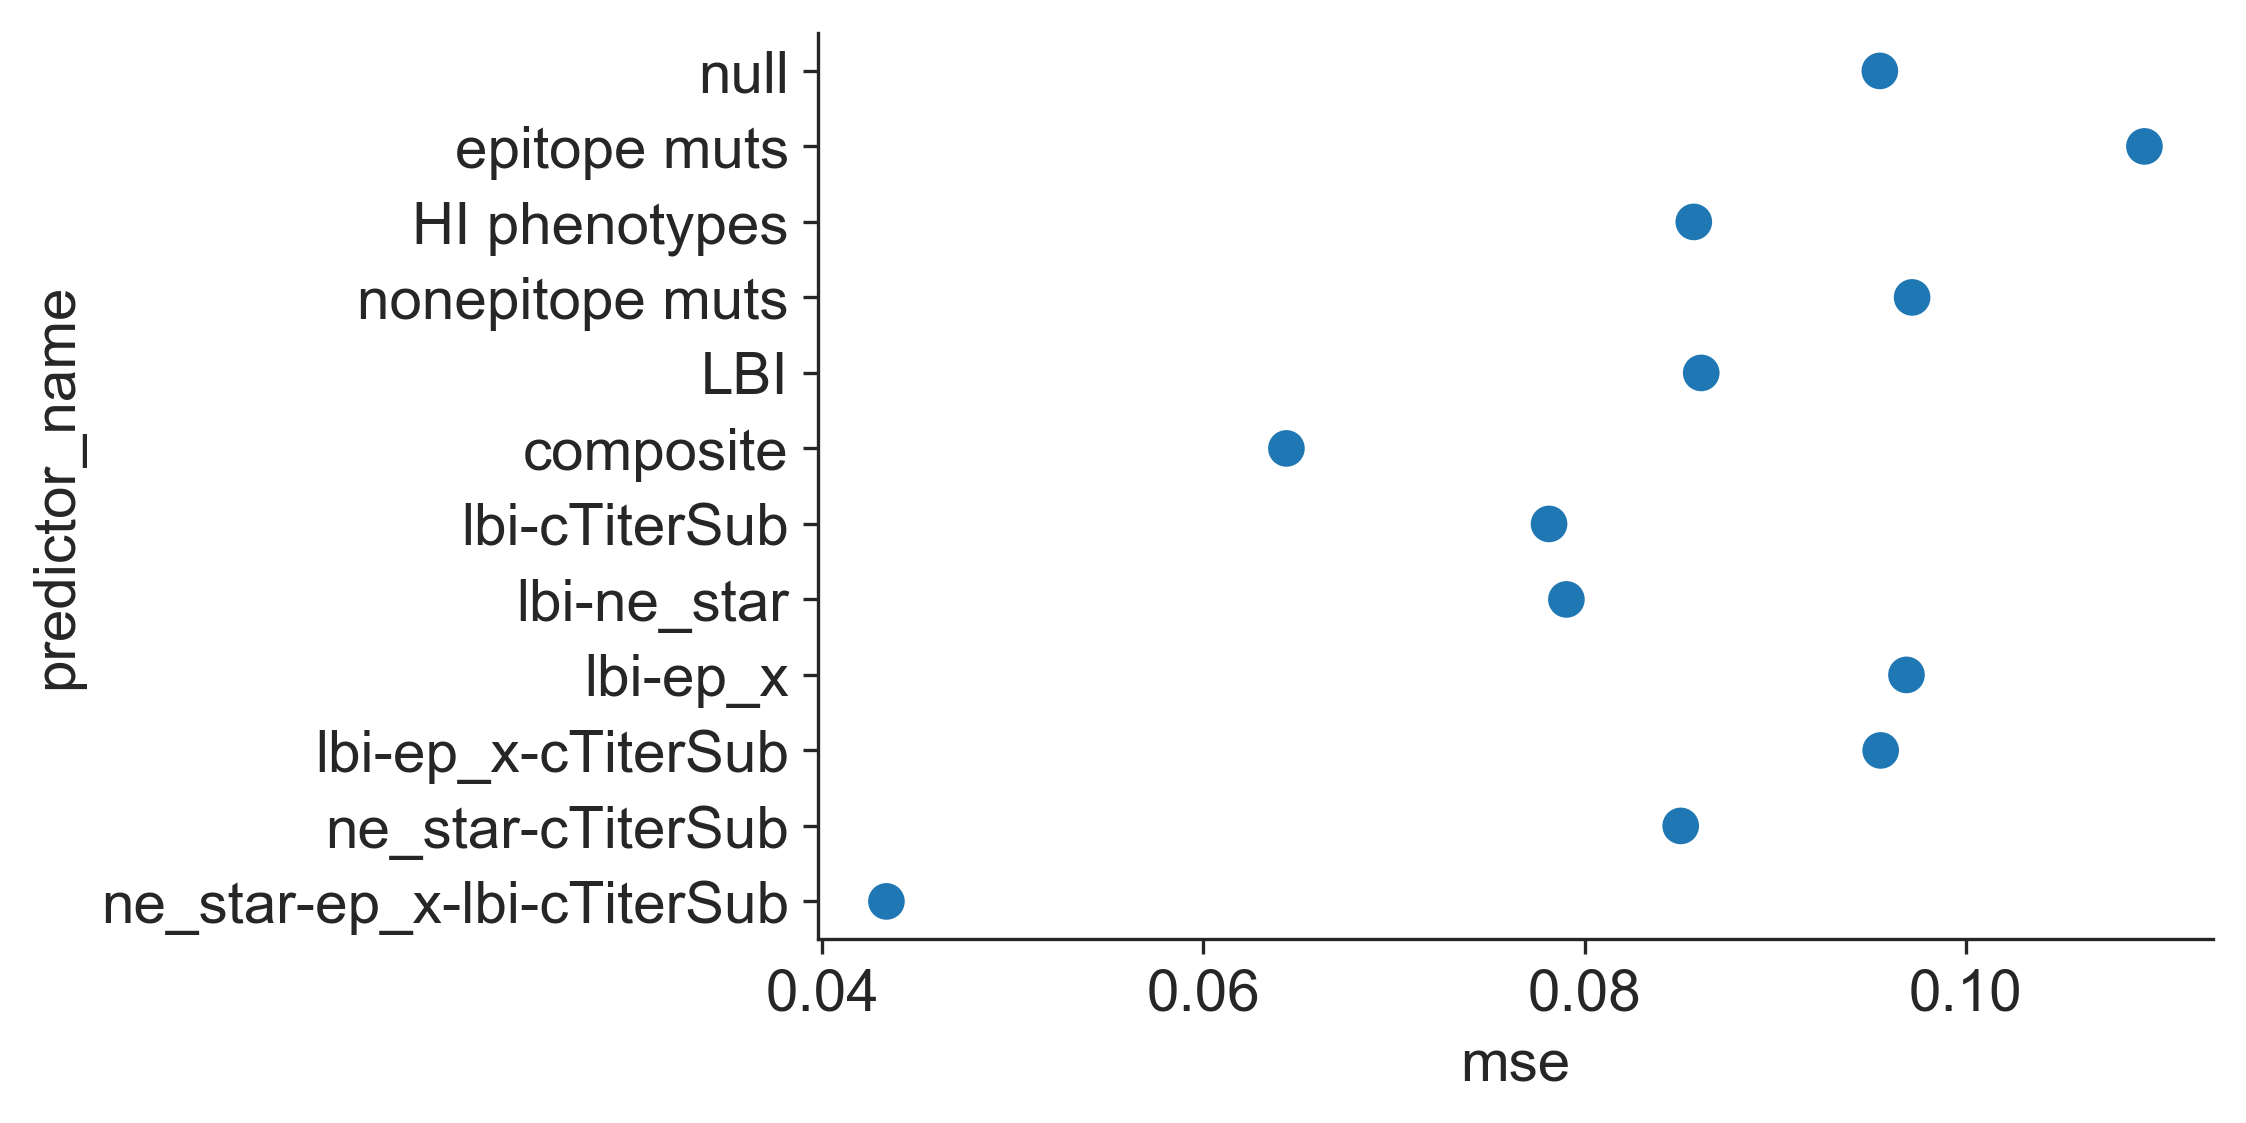

In [29]:
sns.pointplot(
    x="mse",
    y="predictor_name",
    data=mse_df,
    join=False,
    order=predictor_names_order
)

In [30]:
# Calculate mean absolute error
mae = (error_df["sae"] / error_df["n_samples"]).sort_values()
mae

predictor_name
ne_star-ep_x-lbi-cTiterSub    0.120766
composite                     0.173210
lbi-cTiterSub                 0.196450
lbi-ne_star                   0.203097
HI phenotypes                 0.211781
ne_star-cTiterSub             0.212241
LBI                           0.213479
lbi-ep_x-cTiterSub            0.216920
lbi-ep_x                      0.221613
null                          0.228155
nonepitope muts               0.231297
epitope muts                  0.239855
dtype: float64

In [31]:
mae_df = mae.reset_index().rename({0: "mae"}, axis=1)
mae_df

predictor_name       mae
0   ne_star-ep_x-lbi-cTiterSub  0.120766
1                    composite  0.173210
2                lbi-cTiterSub  0.196450
3                  lbi-ne_star  0.203097
4                HI phenotypes  0.211781
5            ne_star-cTiterSub  0.212241
6                          LBI  0.213479
7           lbi-ep_x-cTiterSub  0.216920
8                     lbi-ep_x  0.221613
9                         null  0.228155
10             nonepitope muts  0.231297
11                epitope muts  0.239855

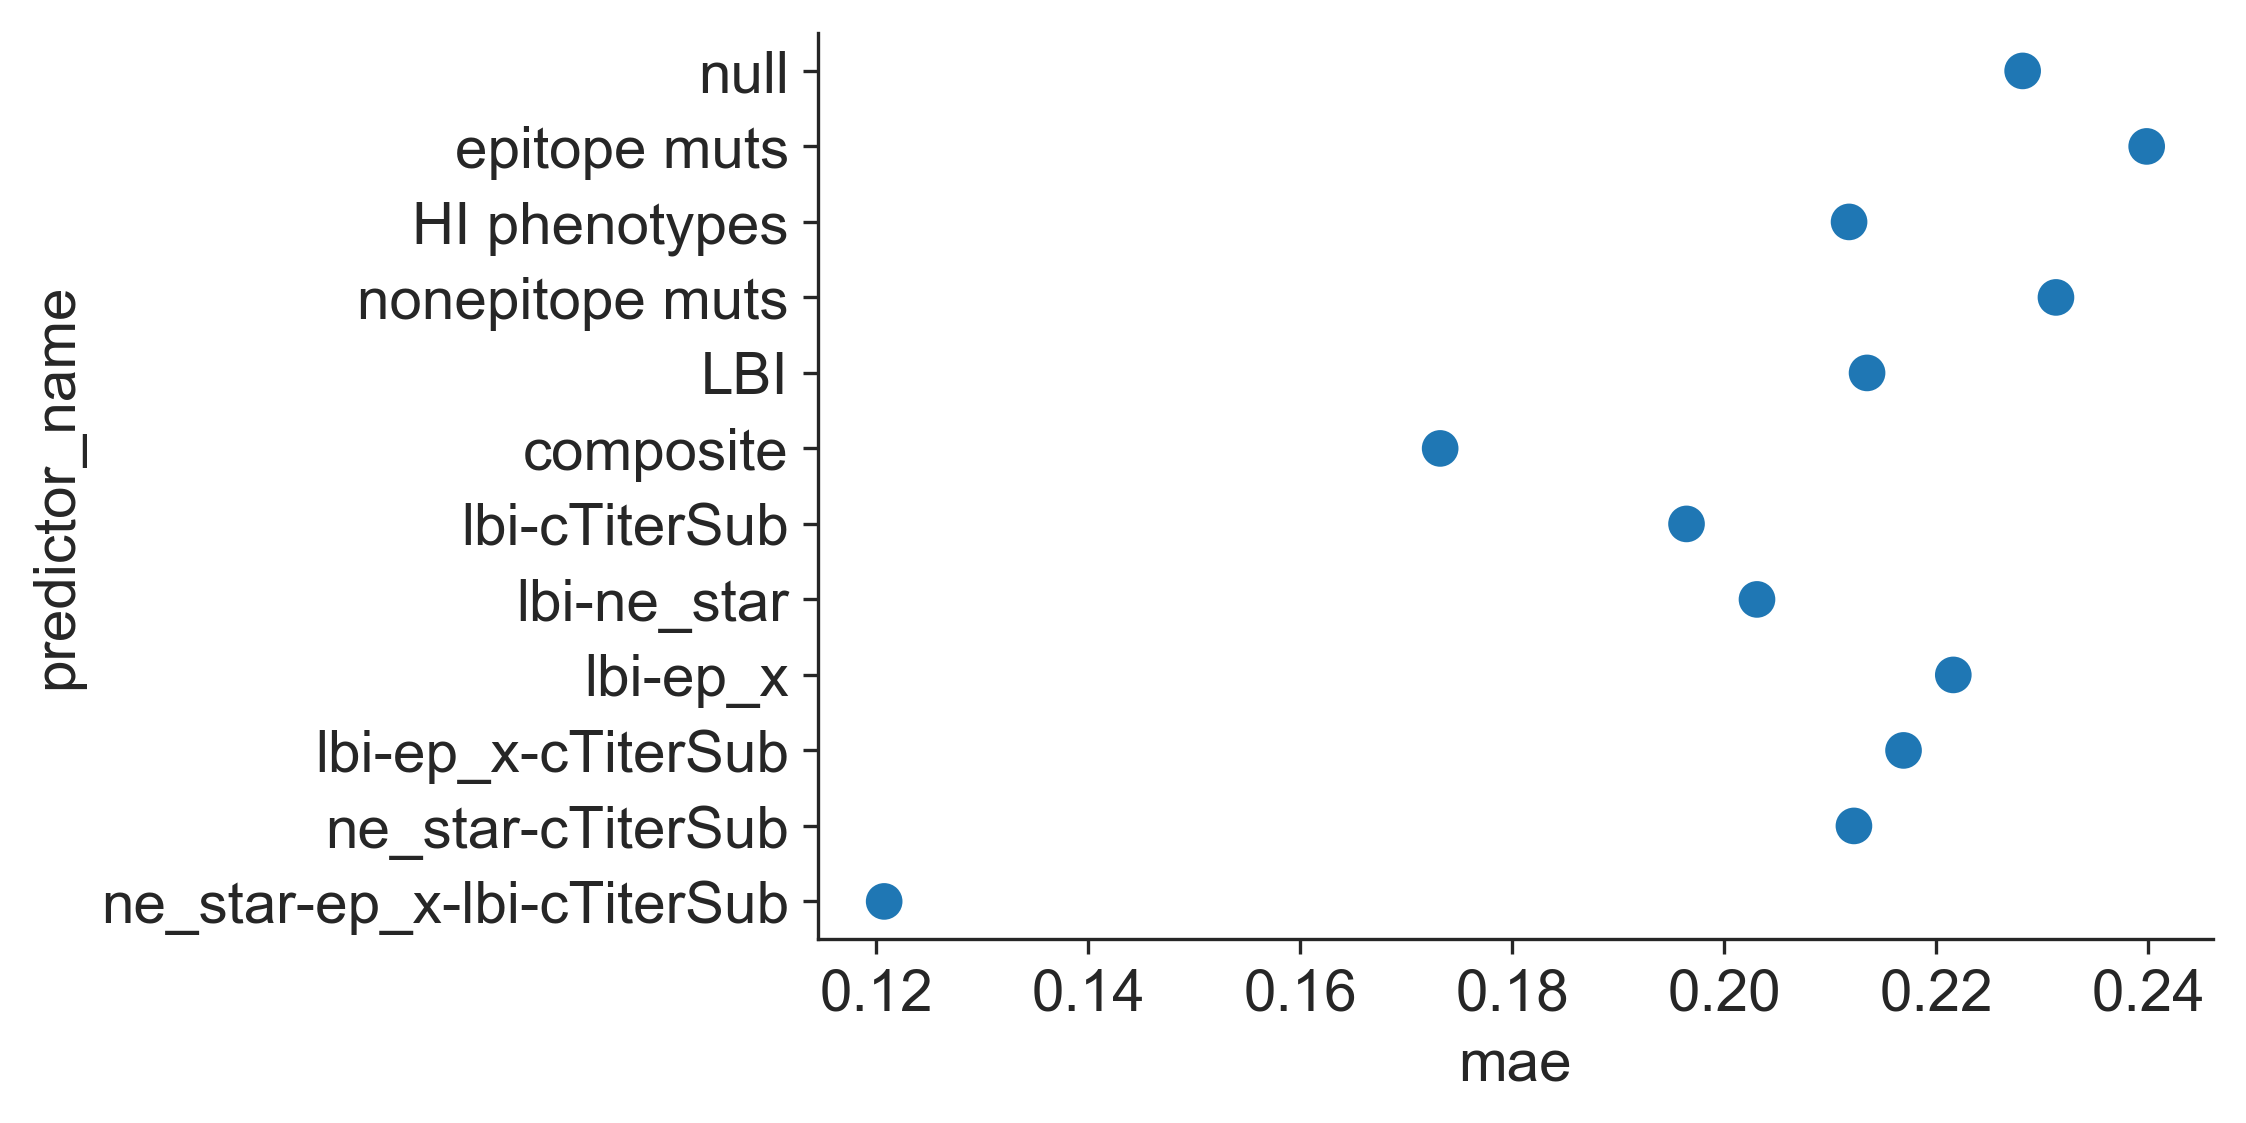

In [32]:
sns.pointplot(
    x="mae",
    y="predictor_name",
    data=mae_df,
    join=False,
    order=predictor_names_order
)

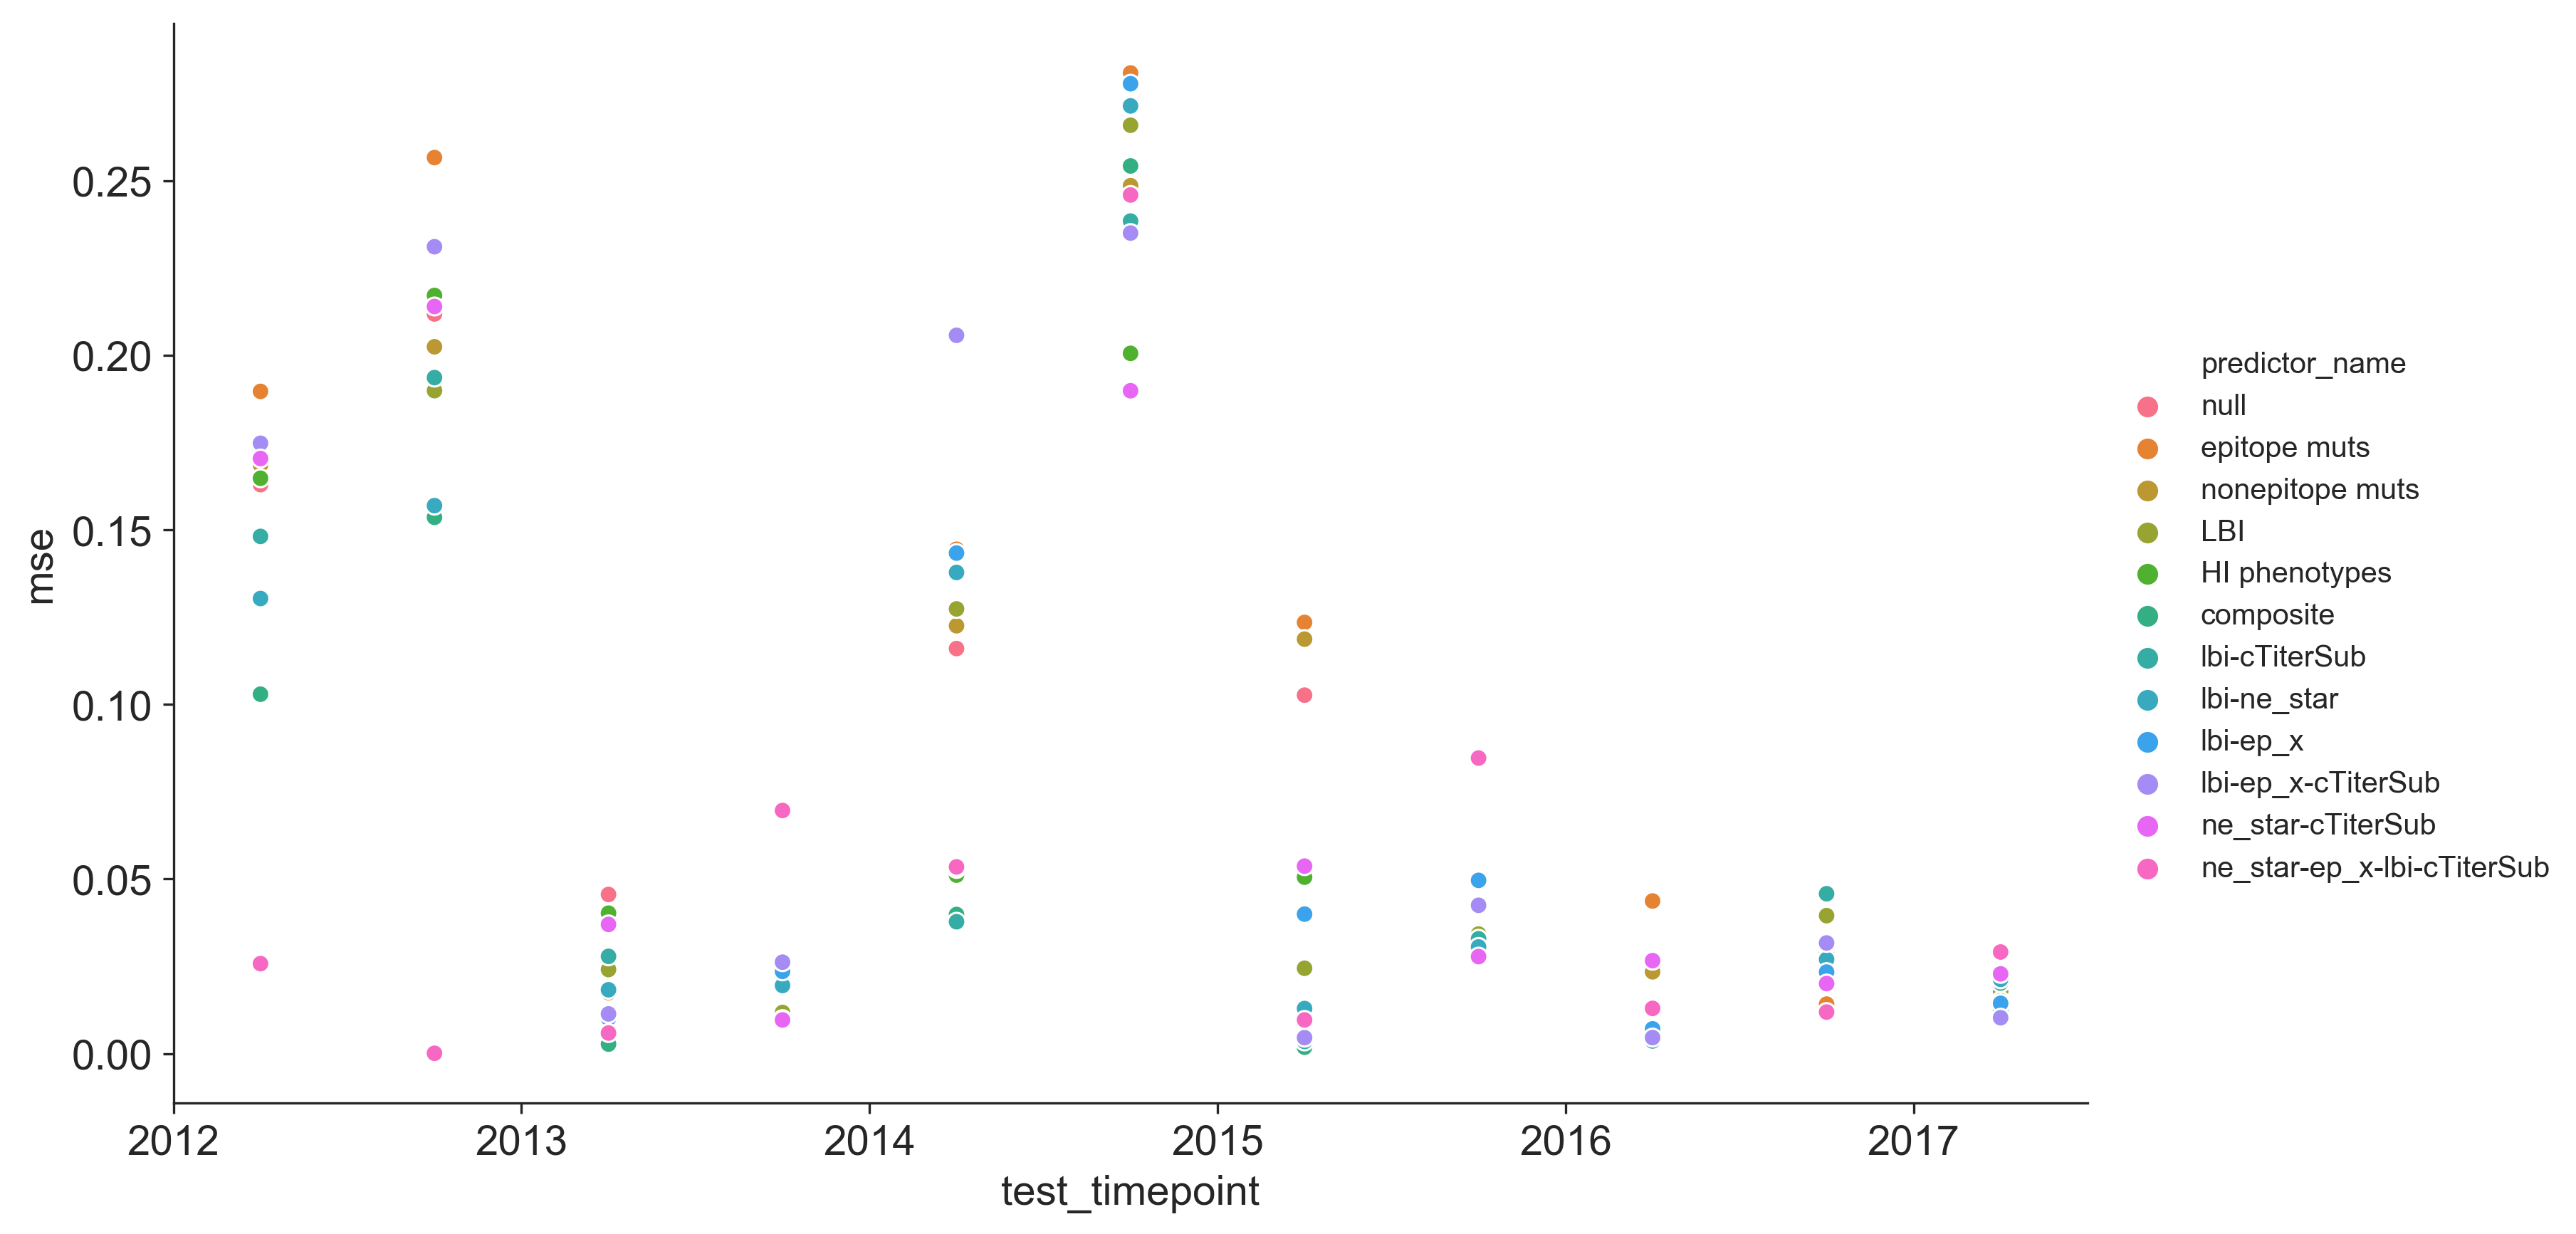

In [33]:
g = sns.relplot(
    "test_timepoint",
    "mse",
    hue="predictor_name",
    data=df,
    height=6,
    aspect=1.7,
    kind="scatter"
)
#for ax in g.axes.flatten():
#    ax.set_xlim(df["test_timepoint"].min() - 1, df["test_timepoint"].max() + 1)

In [34]:
df["test_timepoint"].drop_duplicates()

0     2012.25
1     2012.75
2     2013.25
3     2013.75
4     2014.25
5     2014.75
6     2015.25
7     2015.75
8     2016.25
9     2016.75
10    2017.25
Name: test_timepoint, dtype: float64

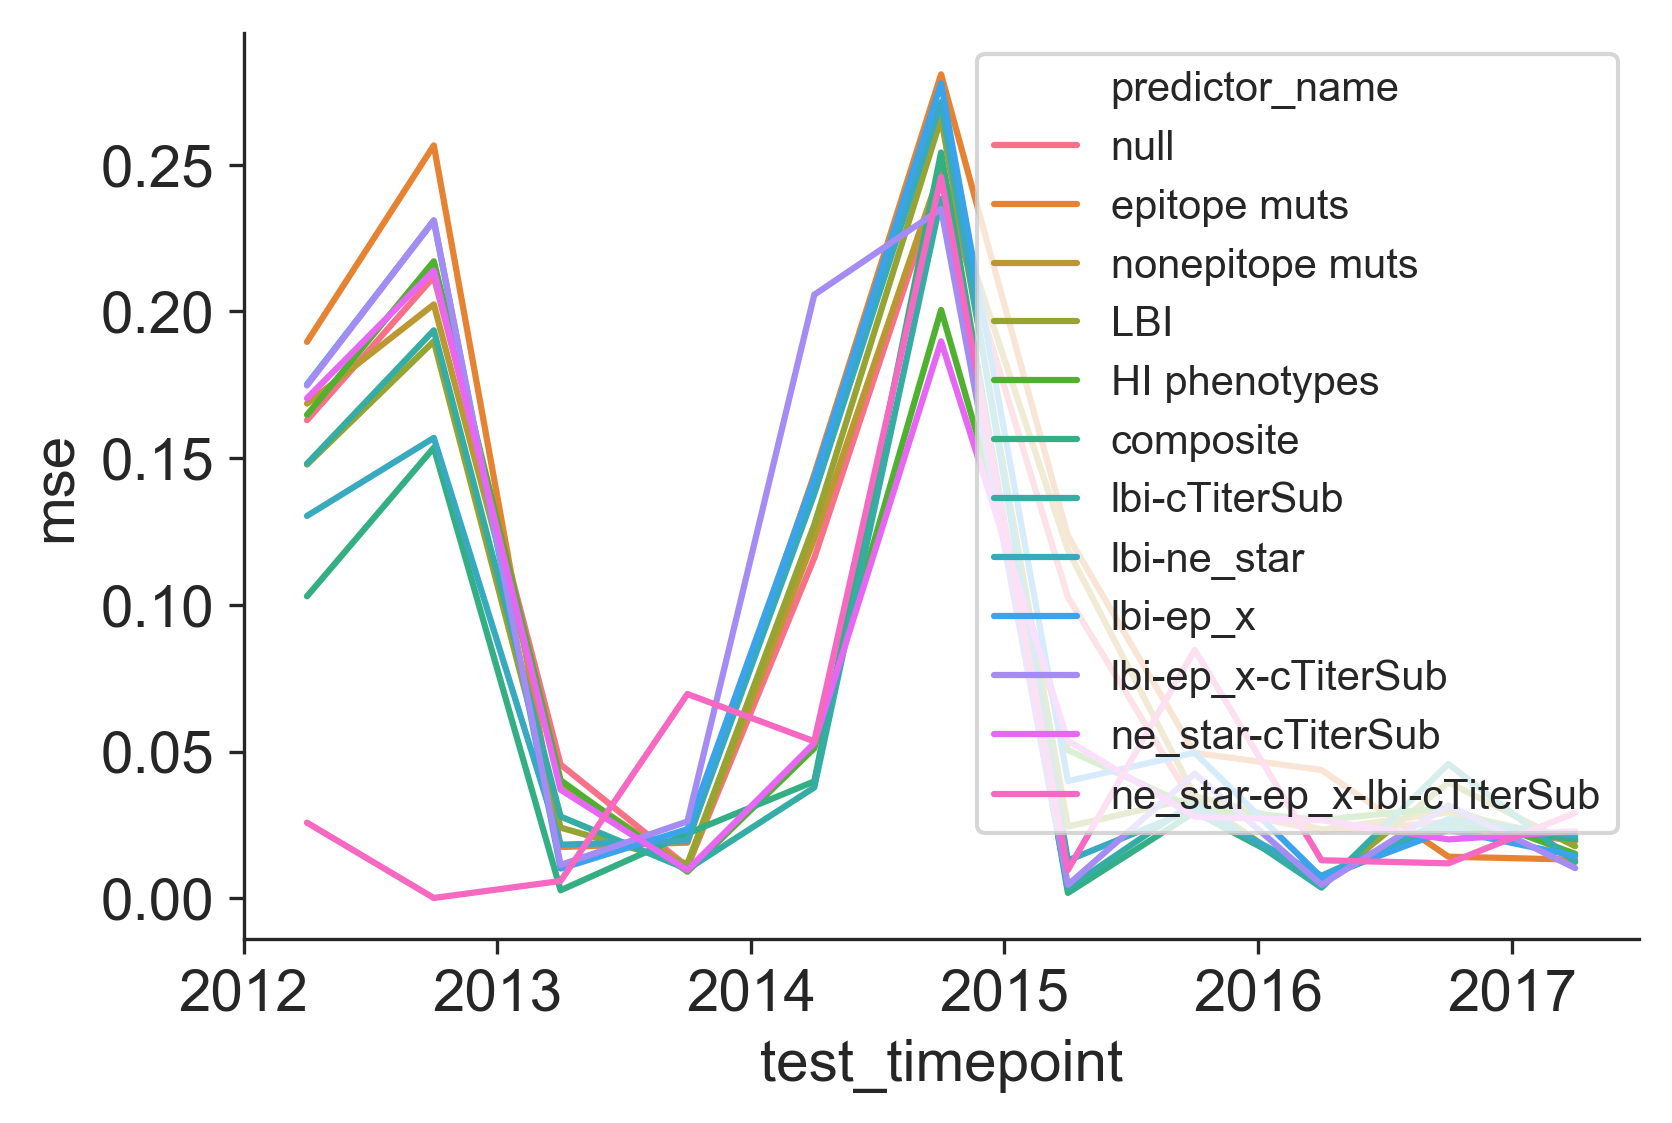

In [35]:
sns.lineplot(
    "test_timepoint",
    "mse",
    data=df,
    ci="sd",
    markers=True,
    dashes=False,
    hue="predictor_name"
)

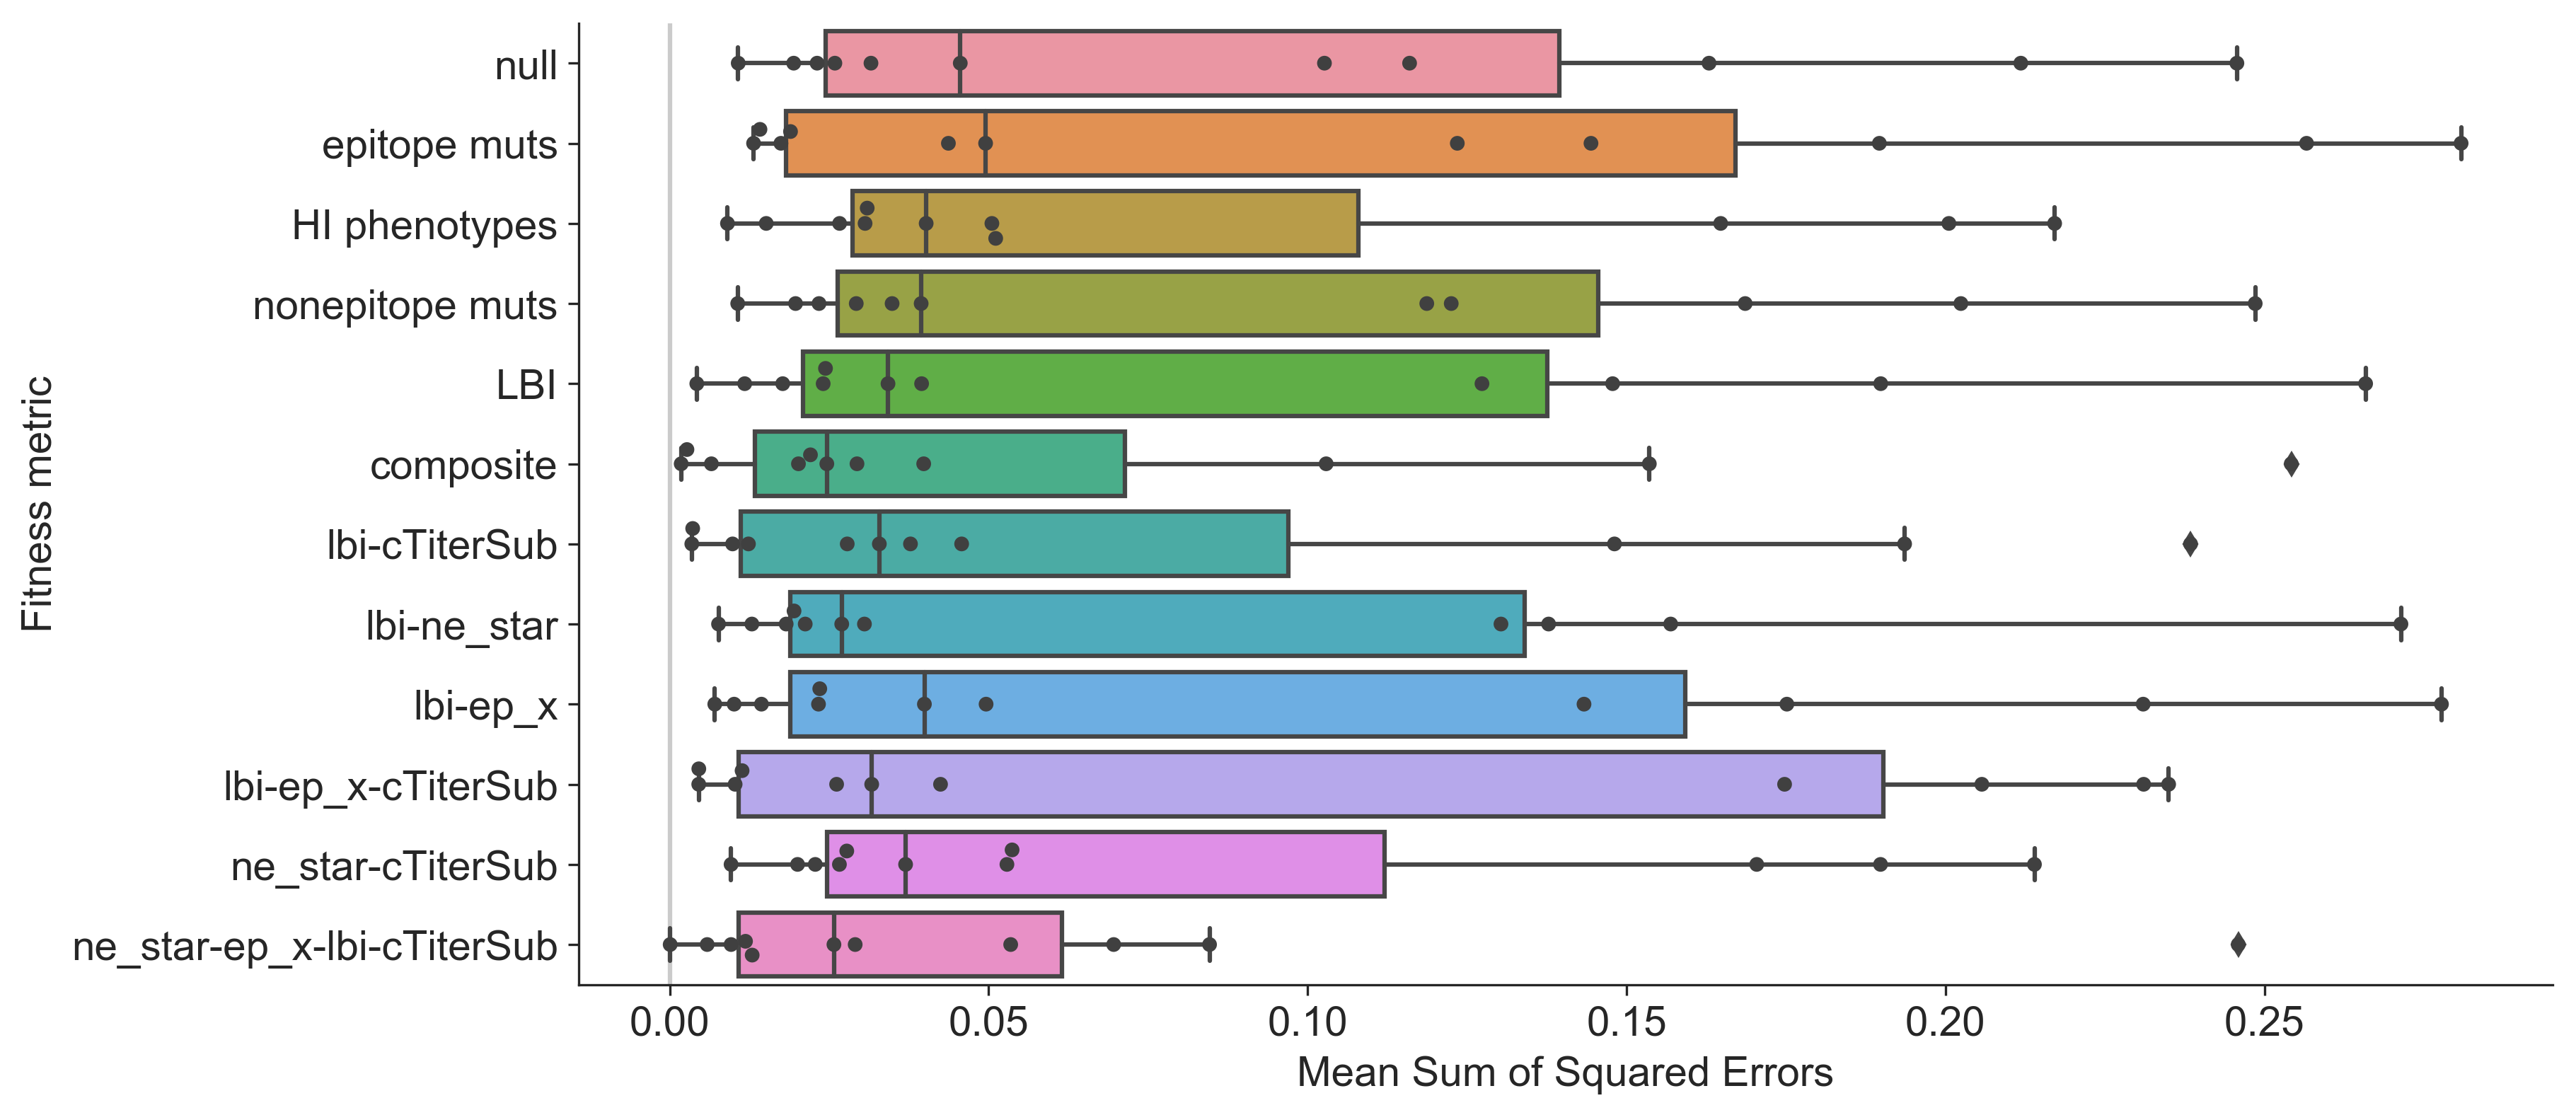

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictor_name",
    x="mse",
    data=df,
    ax=ax,
    order=predictor_names_order
)
sns.swarmplot(
    y="predictor_name",
    x="mse",
    data=df,
    ax=ax,
    color="0.25",
    order=predictor_names_order
)

ax.set_xlabel("Mean Sum of Squared Errors")
ax.set_ylabel("Fitness metric")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

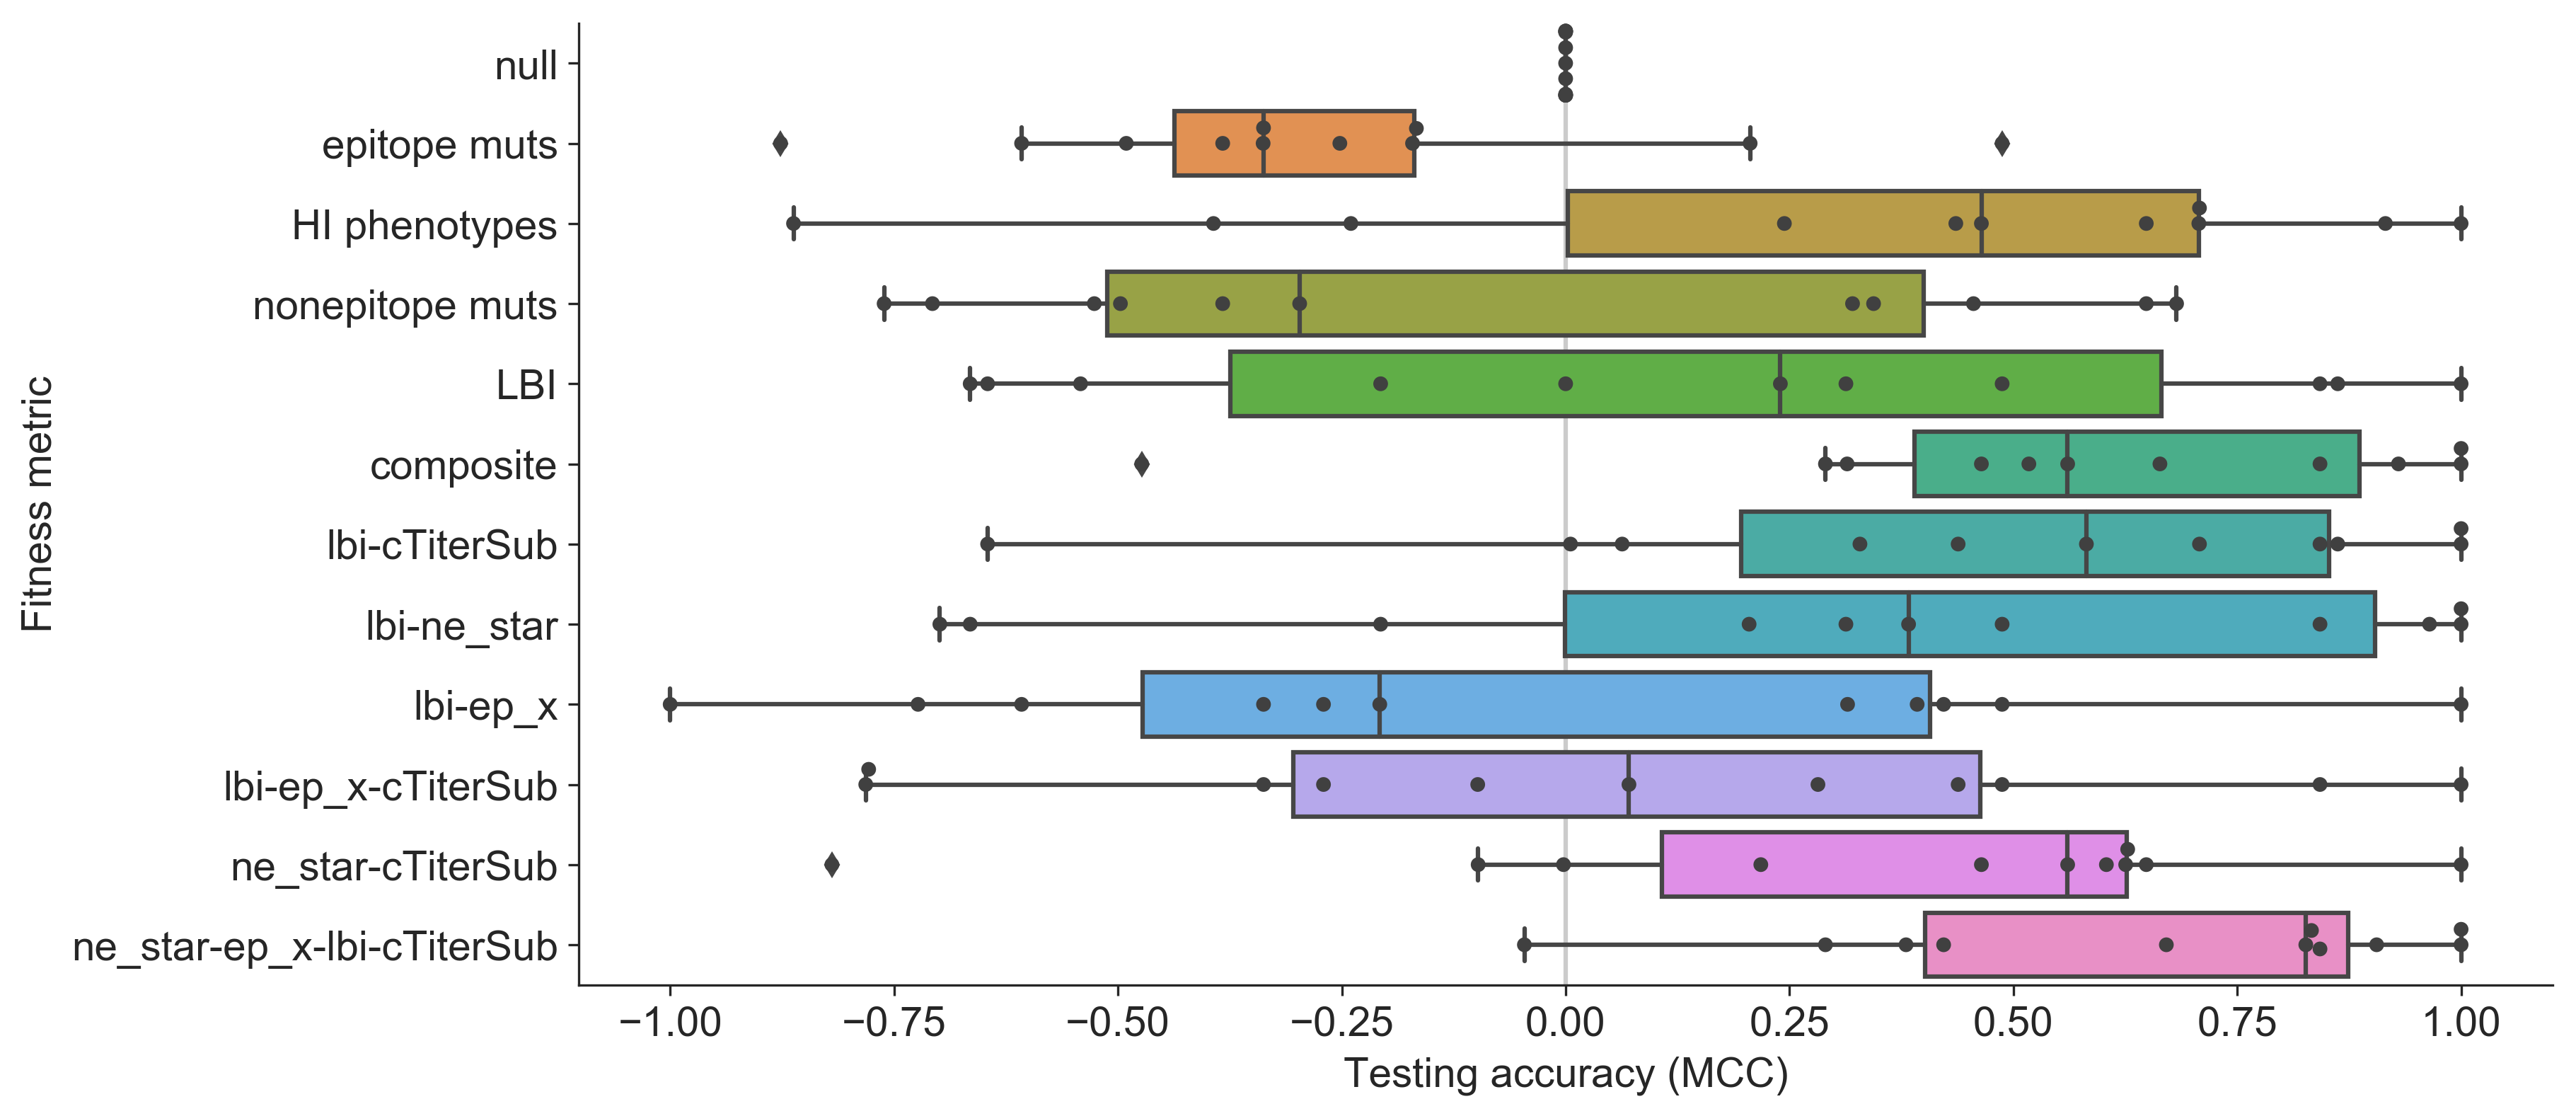

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictor_name",
    x="testing_accuracy",
    data=df,
    ax=ax,
    order=predictor_names_order
)
sns.swarmplot(
    y="predictor_name",
    x="testing_accuracy",
    data=df,
    ax=ax,
    color="0.25",
    order=predictor_names_order
)

ax.set_xlabel("Testing accuracy (MCC)")
ax.set_ylabel("Fitness metric")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

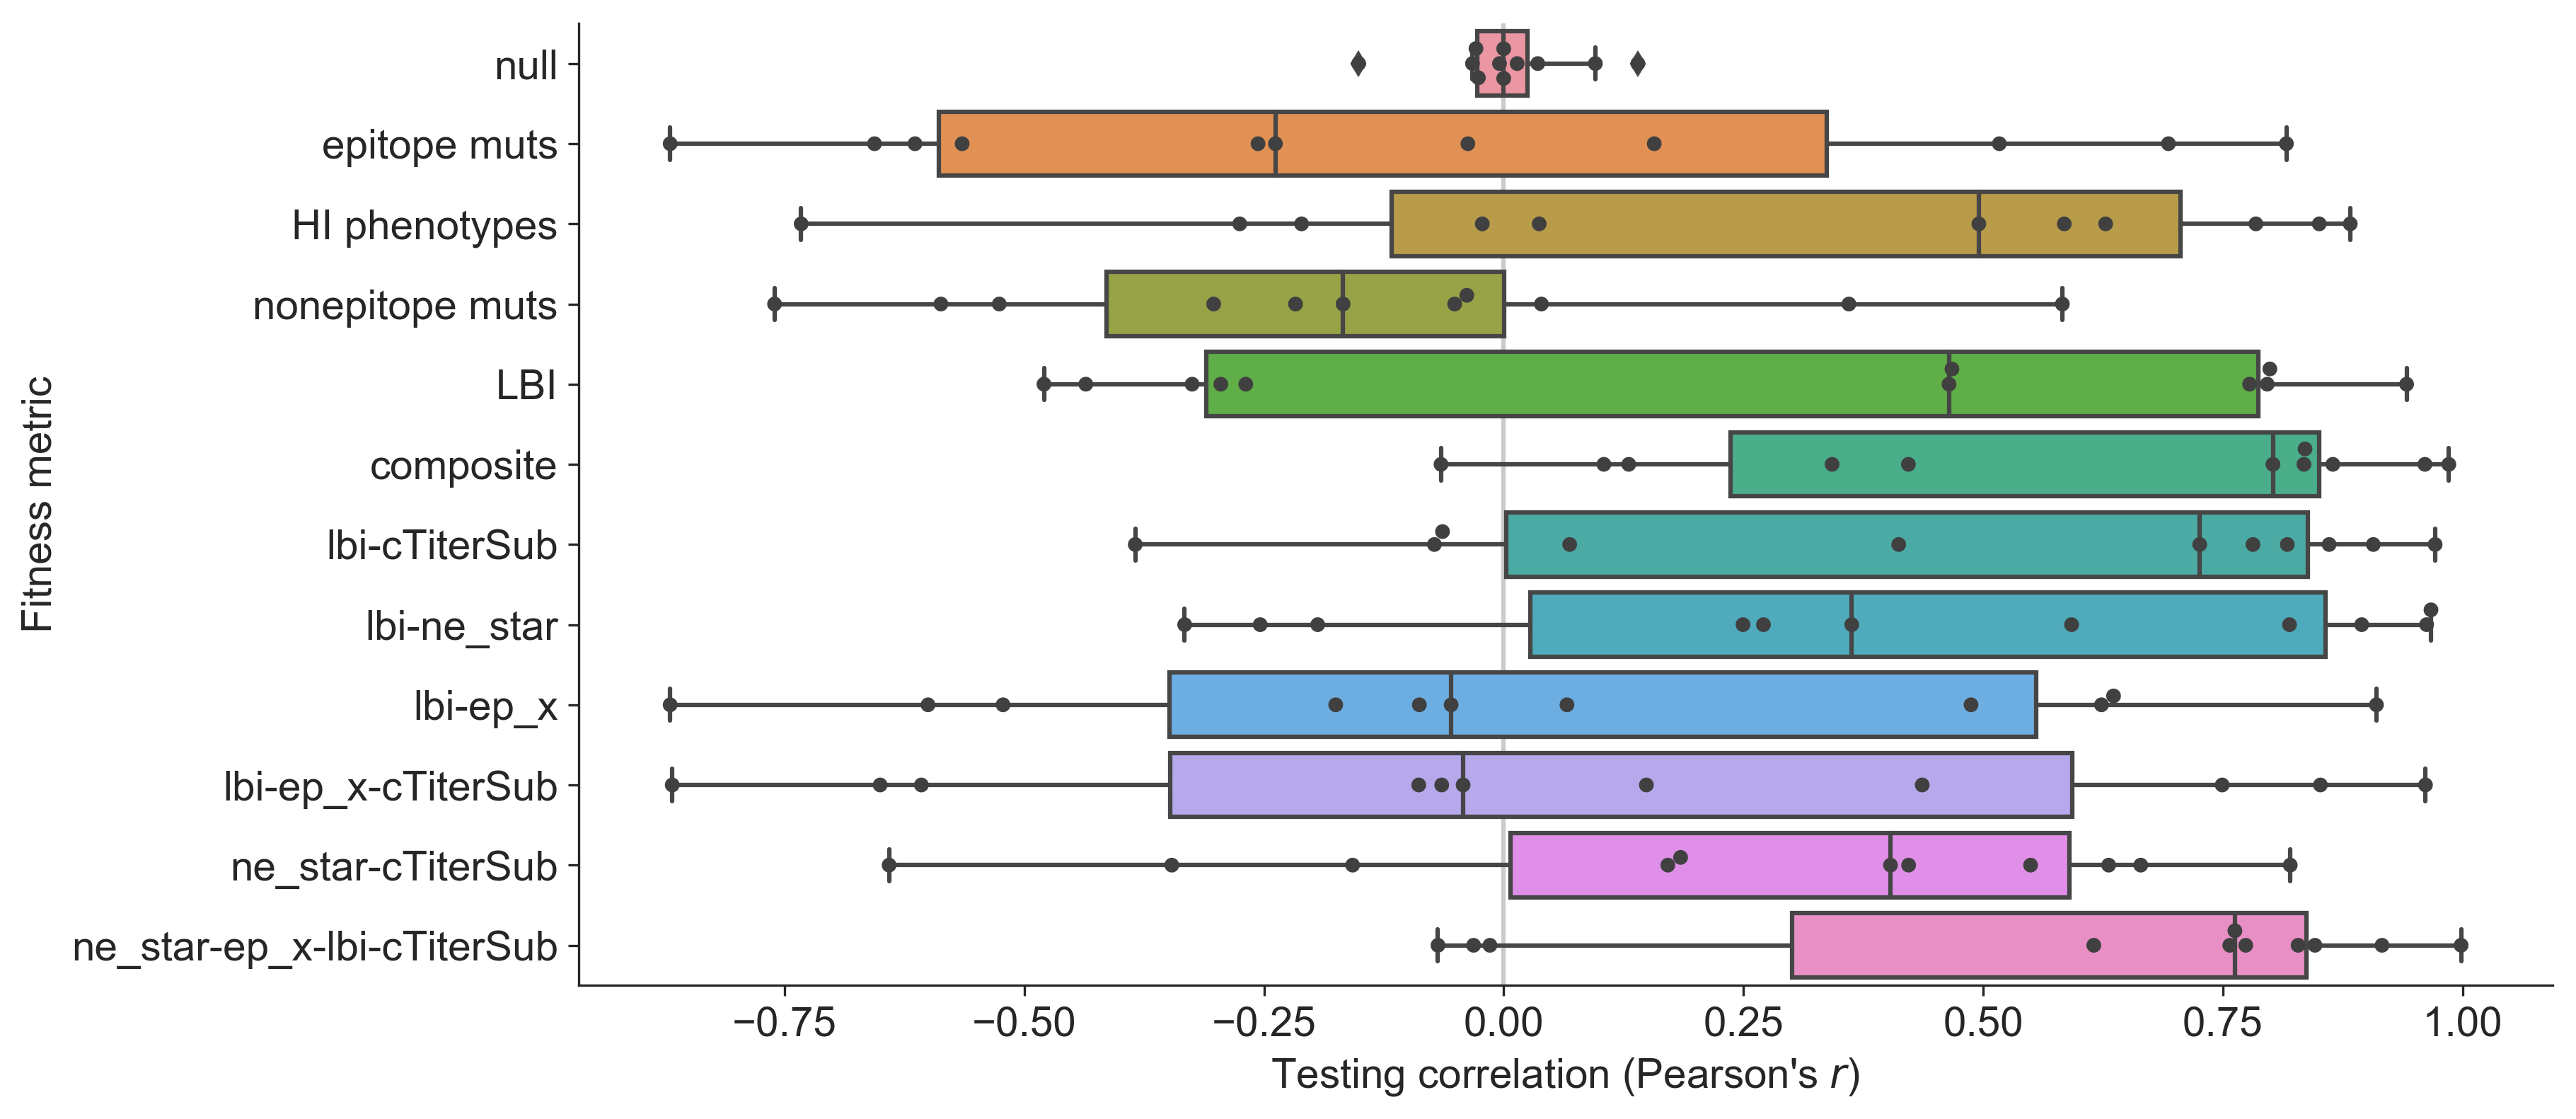

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictor_name",
    x="testing_correlation",
    data=df,
    ax=ax,
    order=predictor_names_order
)
sns.swarmplot(
    y="predictor_name",
    x="testing_correlation",
    data=df,
    ax=ax,
    color="0.25",
    order=predictor_names_order
)

ax.set_xlabel("Testing correlation (Pearson's $r$)")
ax.set_ylabel("Fitness metric")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

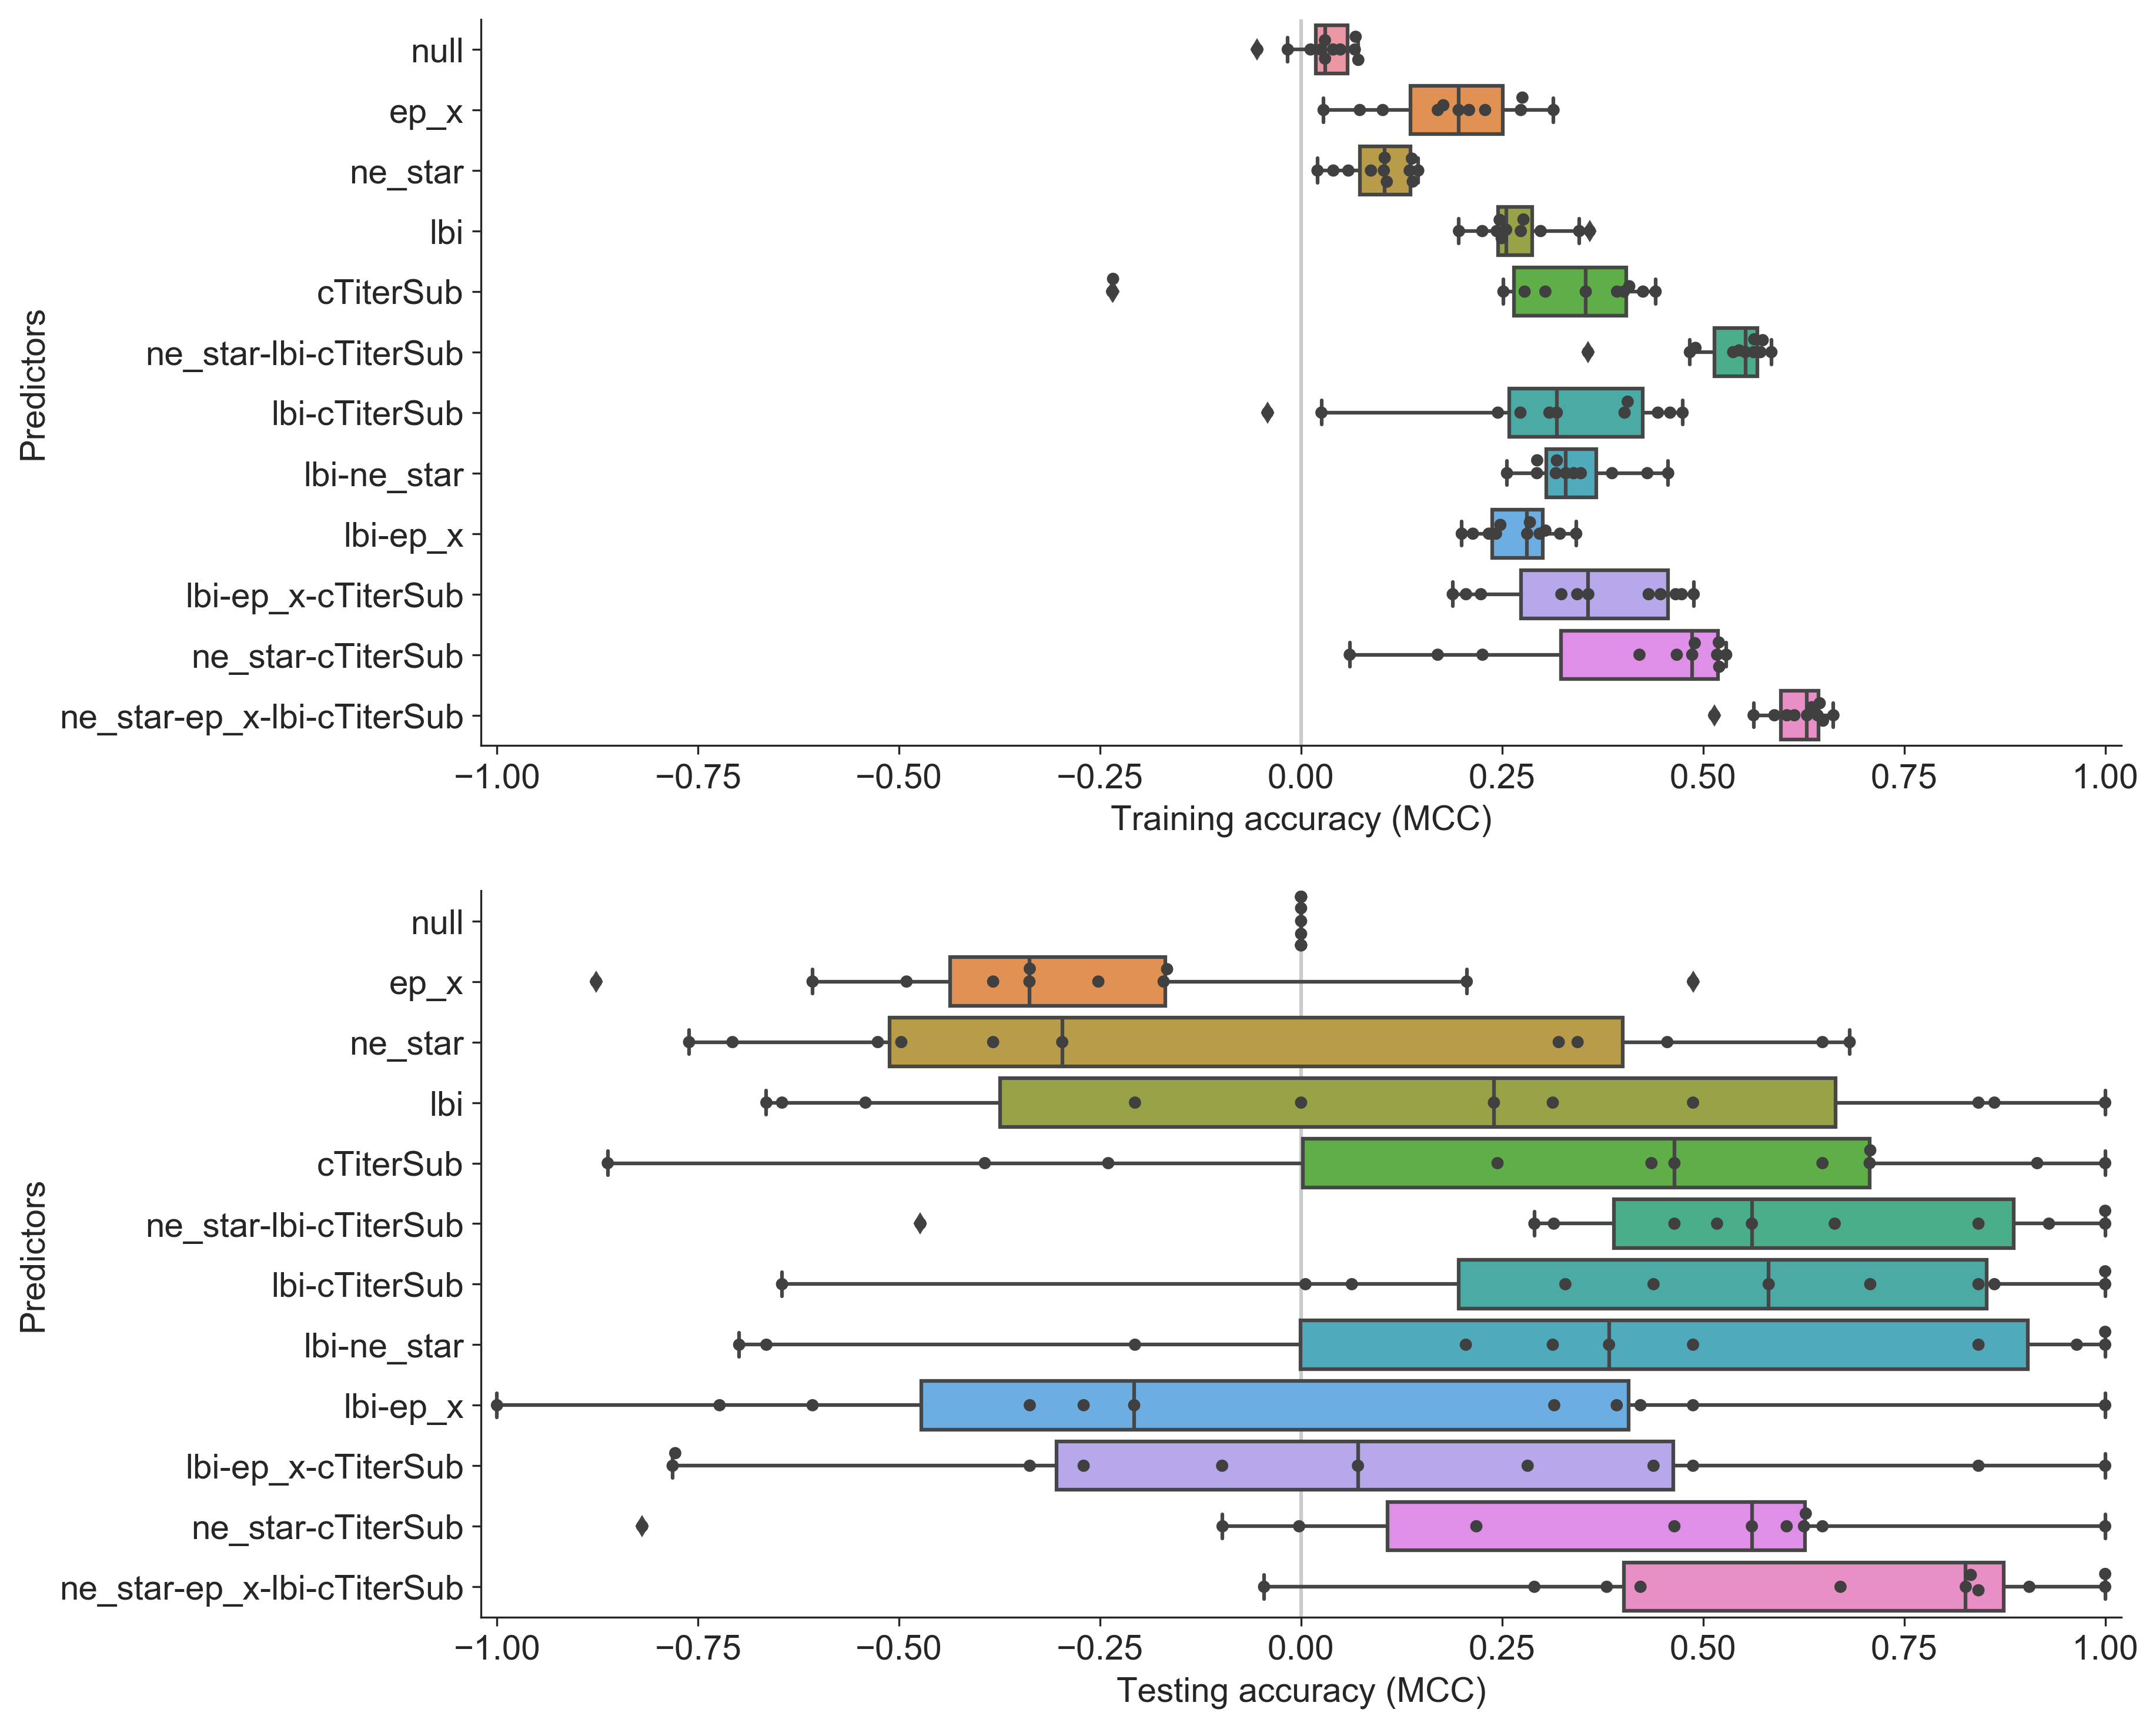

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training accuracy (MCC)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing accuracy on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing accuracy (MCC)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

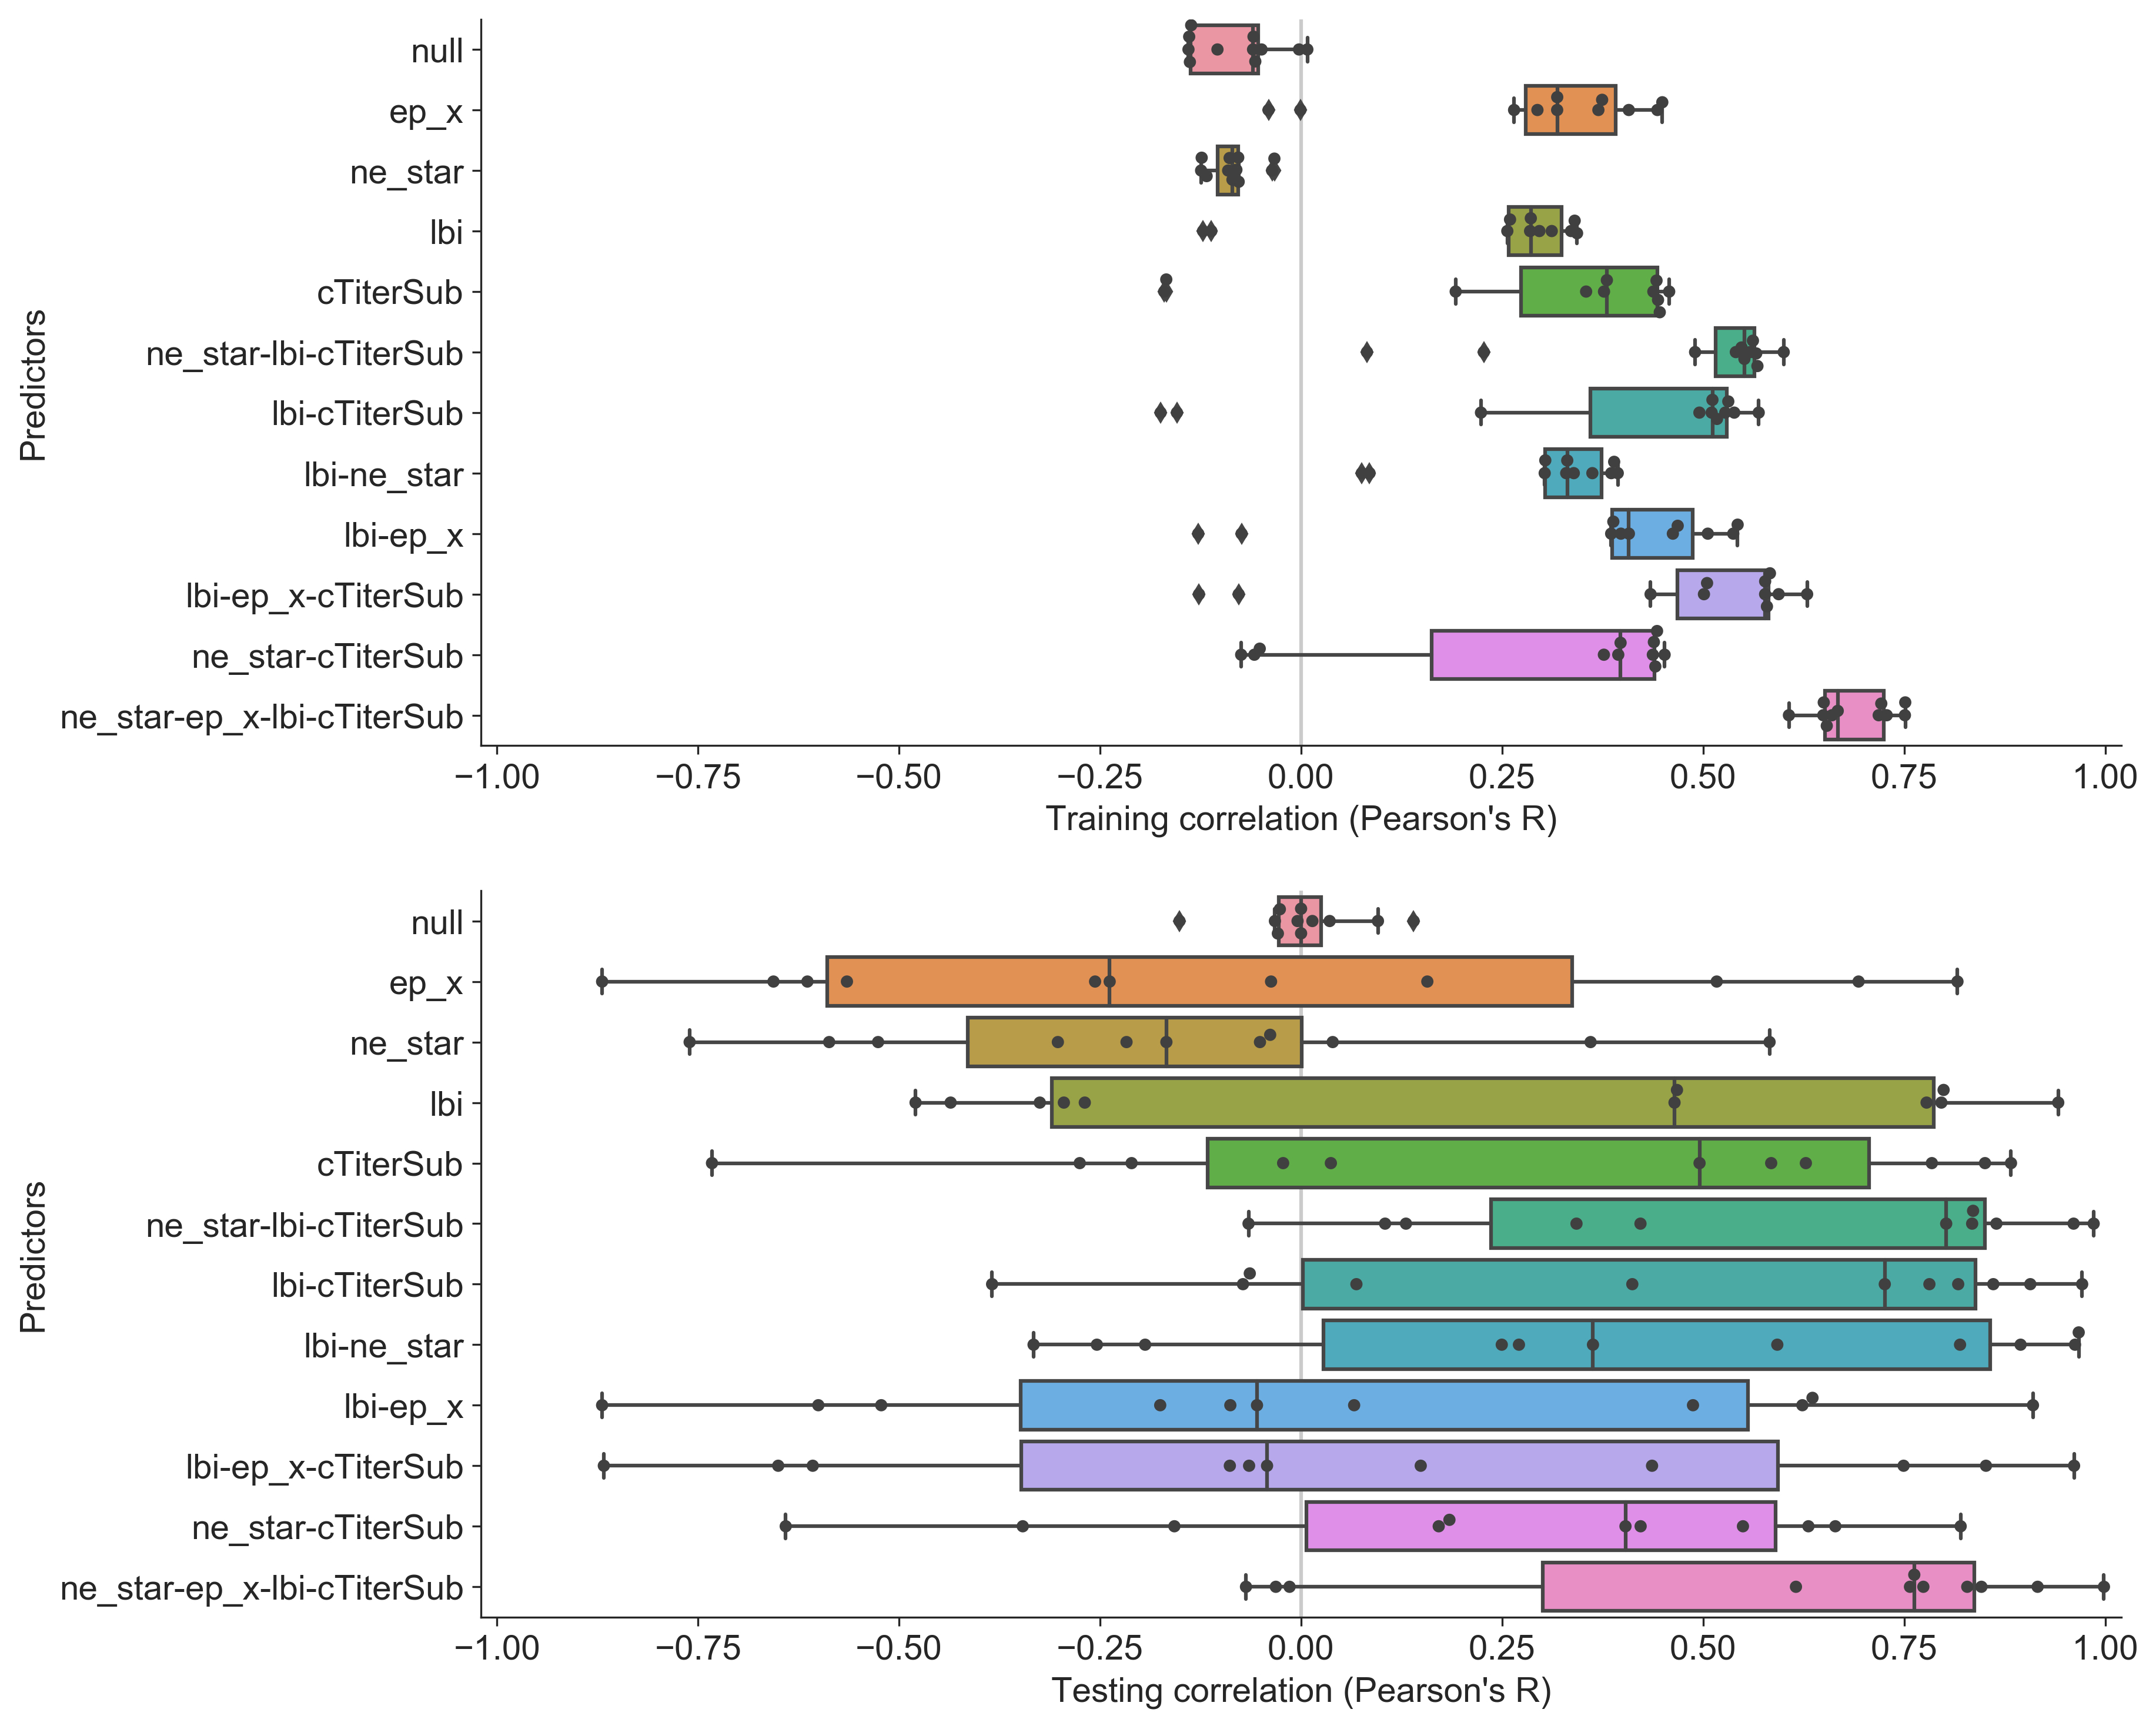

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training correlation on the top panel.
sns.boxplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training correlation (Pearson's R)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing correlation on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing correlation (Pearson's R)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

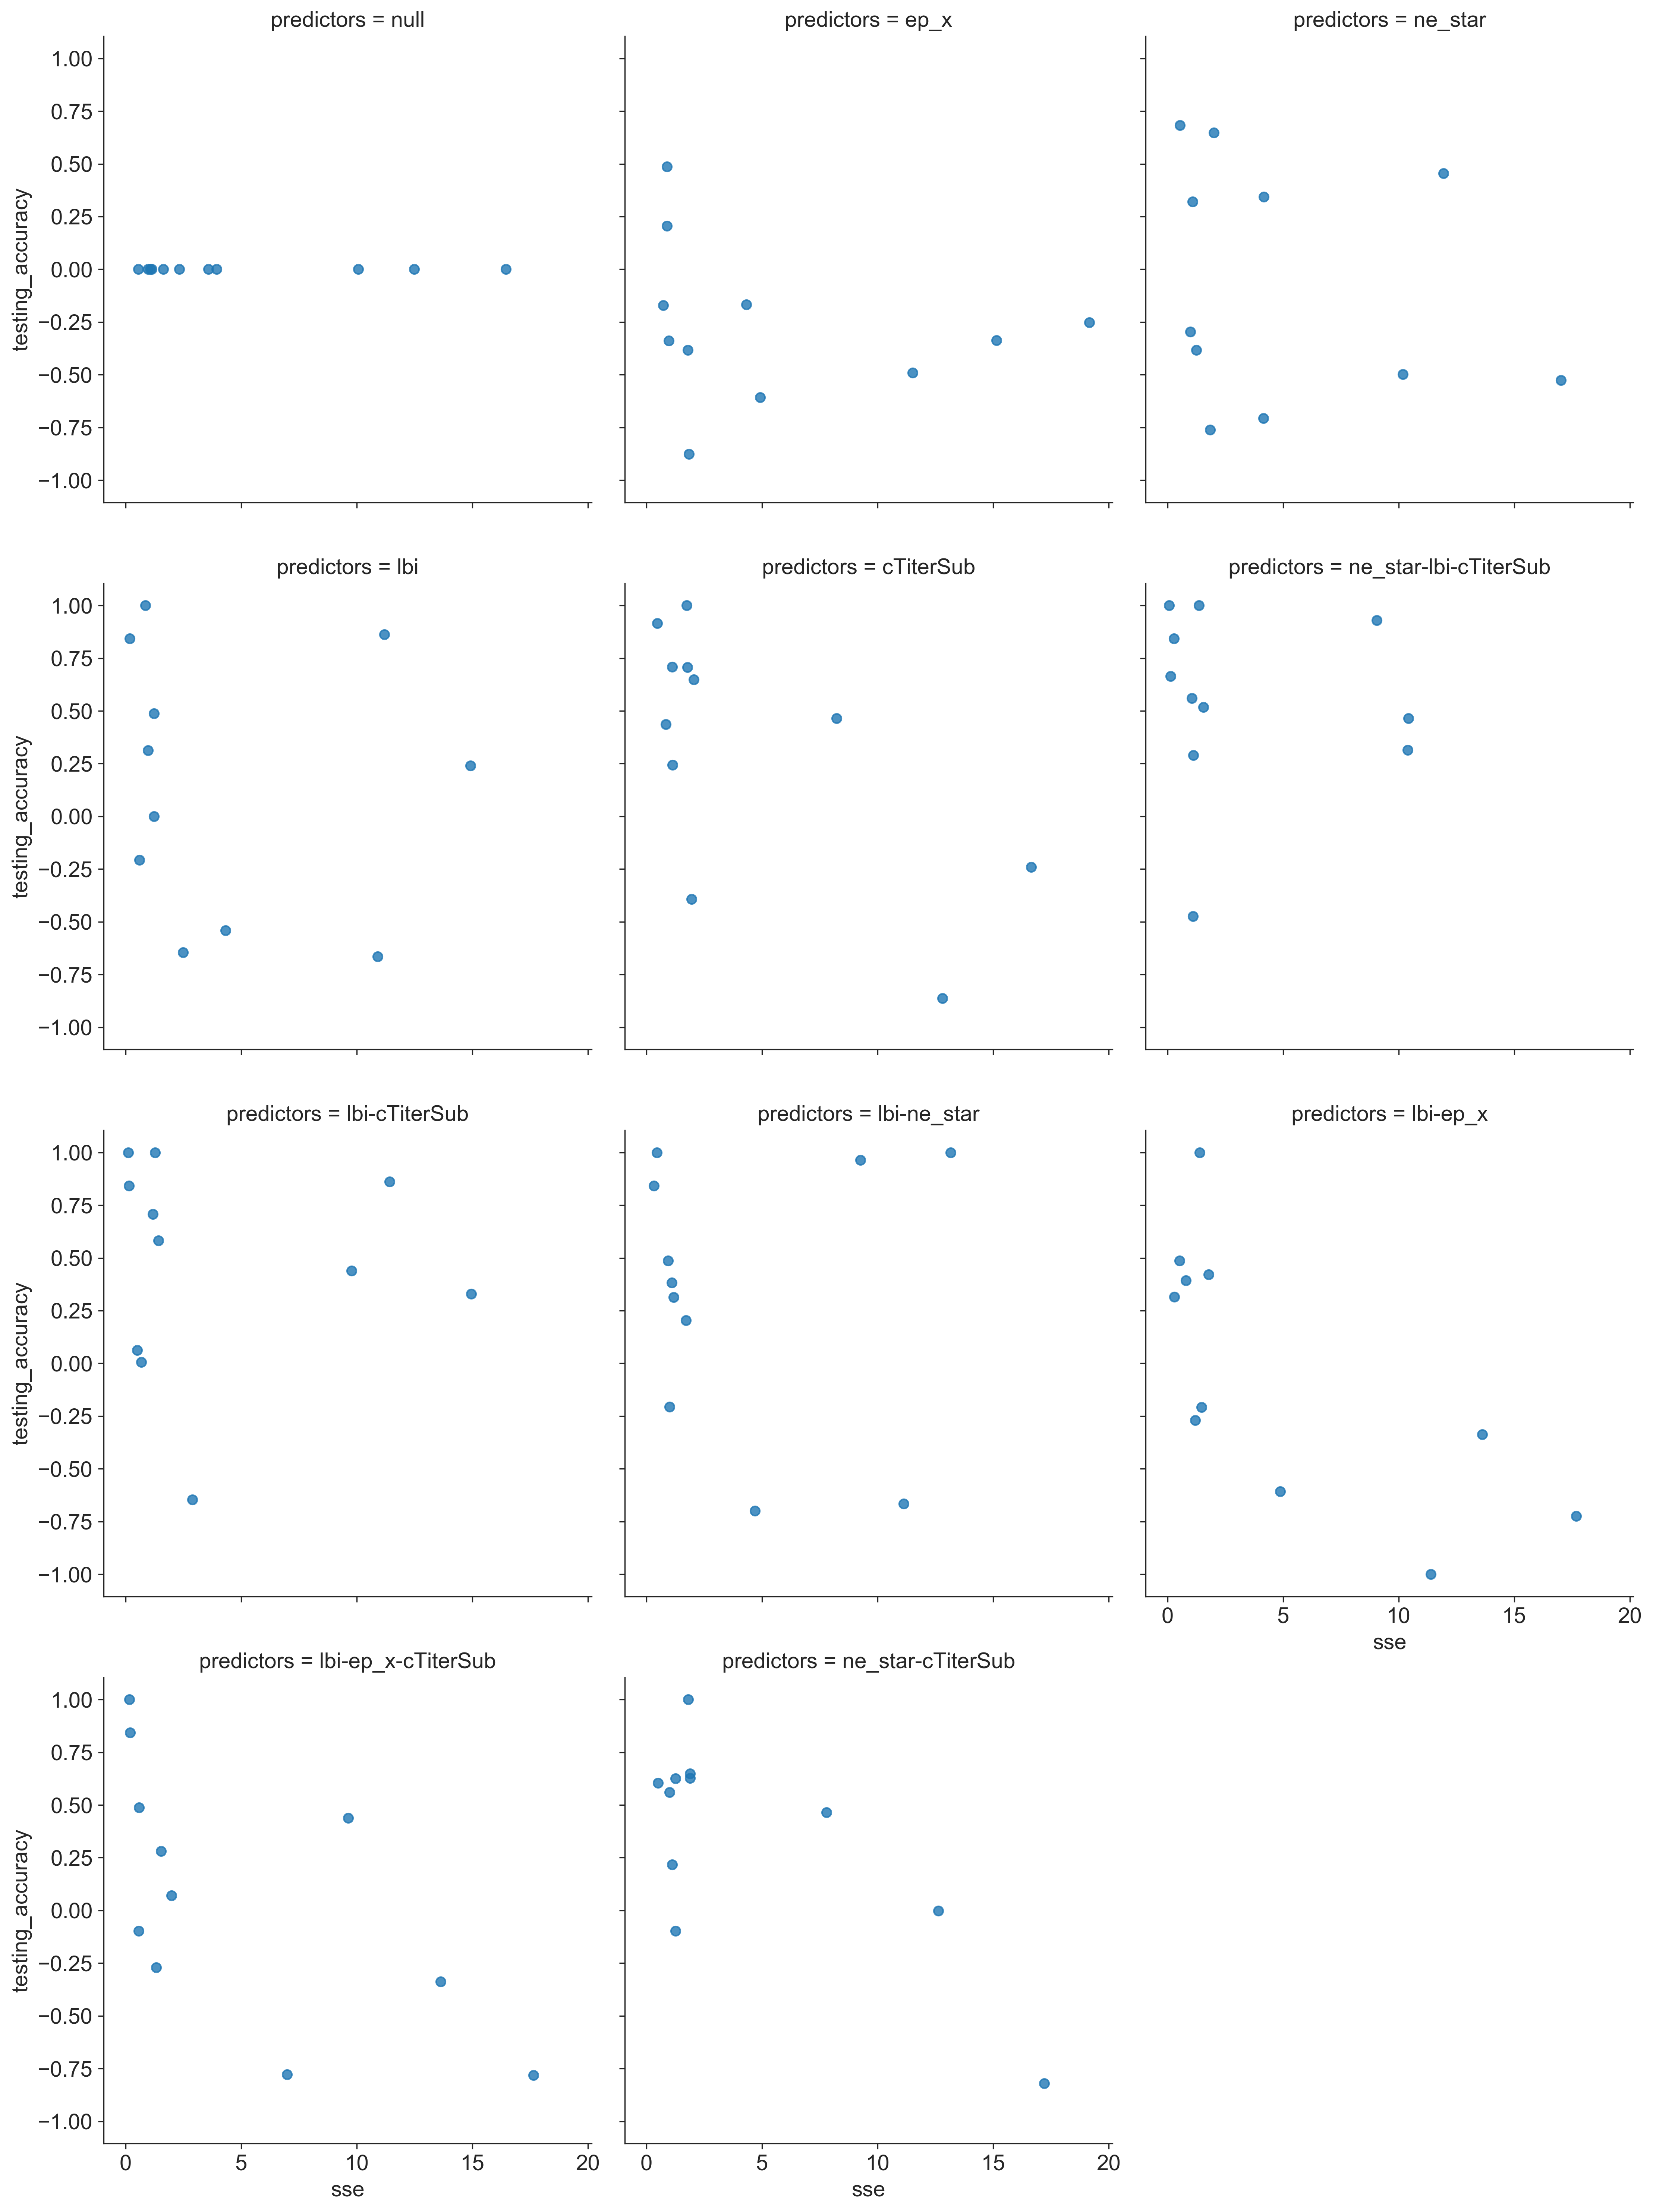

In [176]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="sse",
    y="testing_accuracy",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

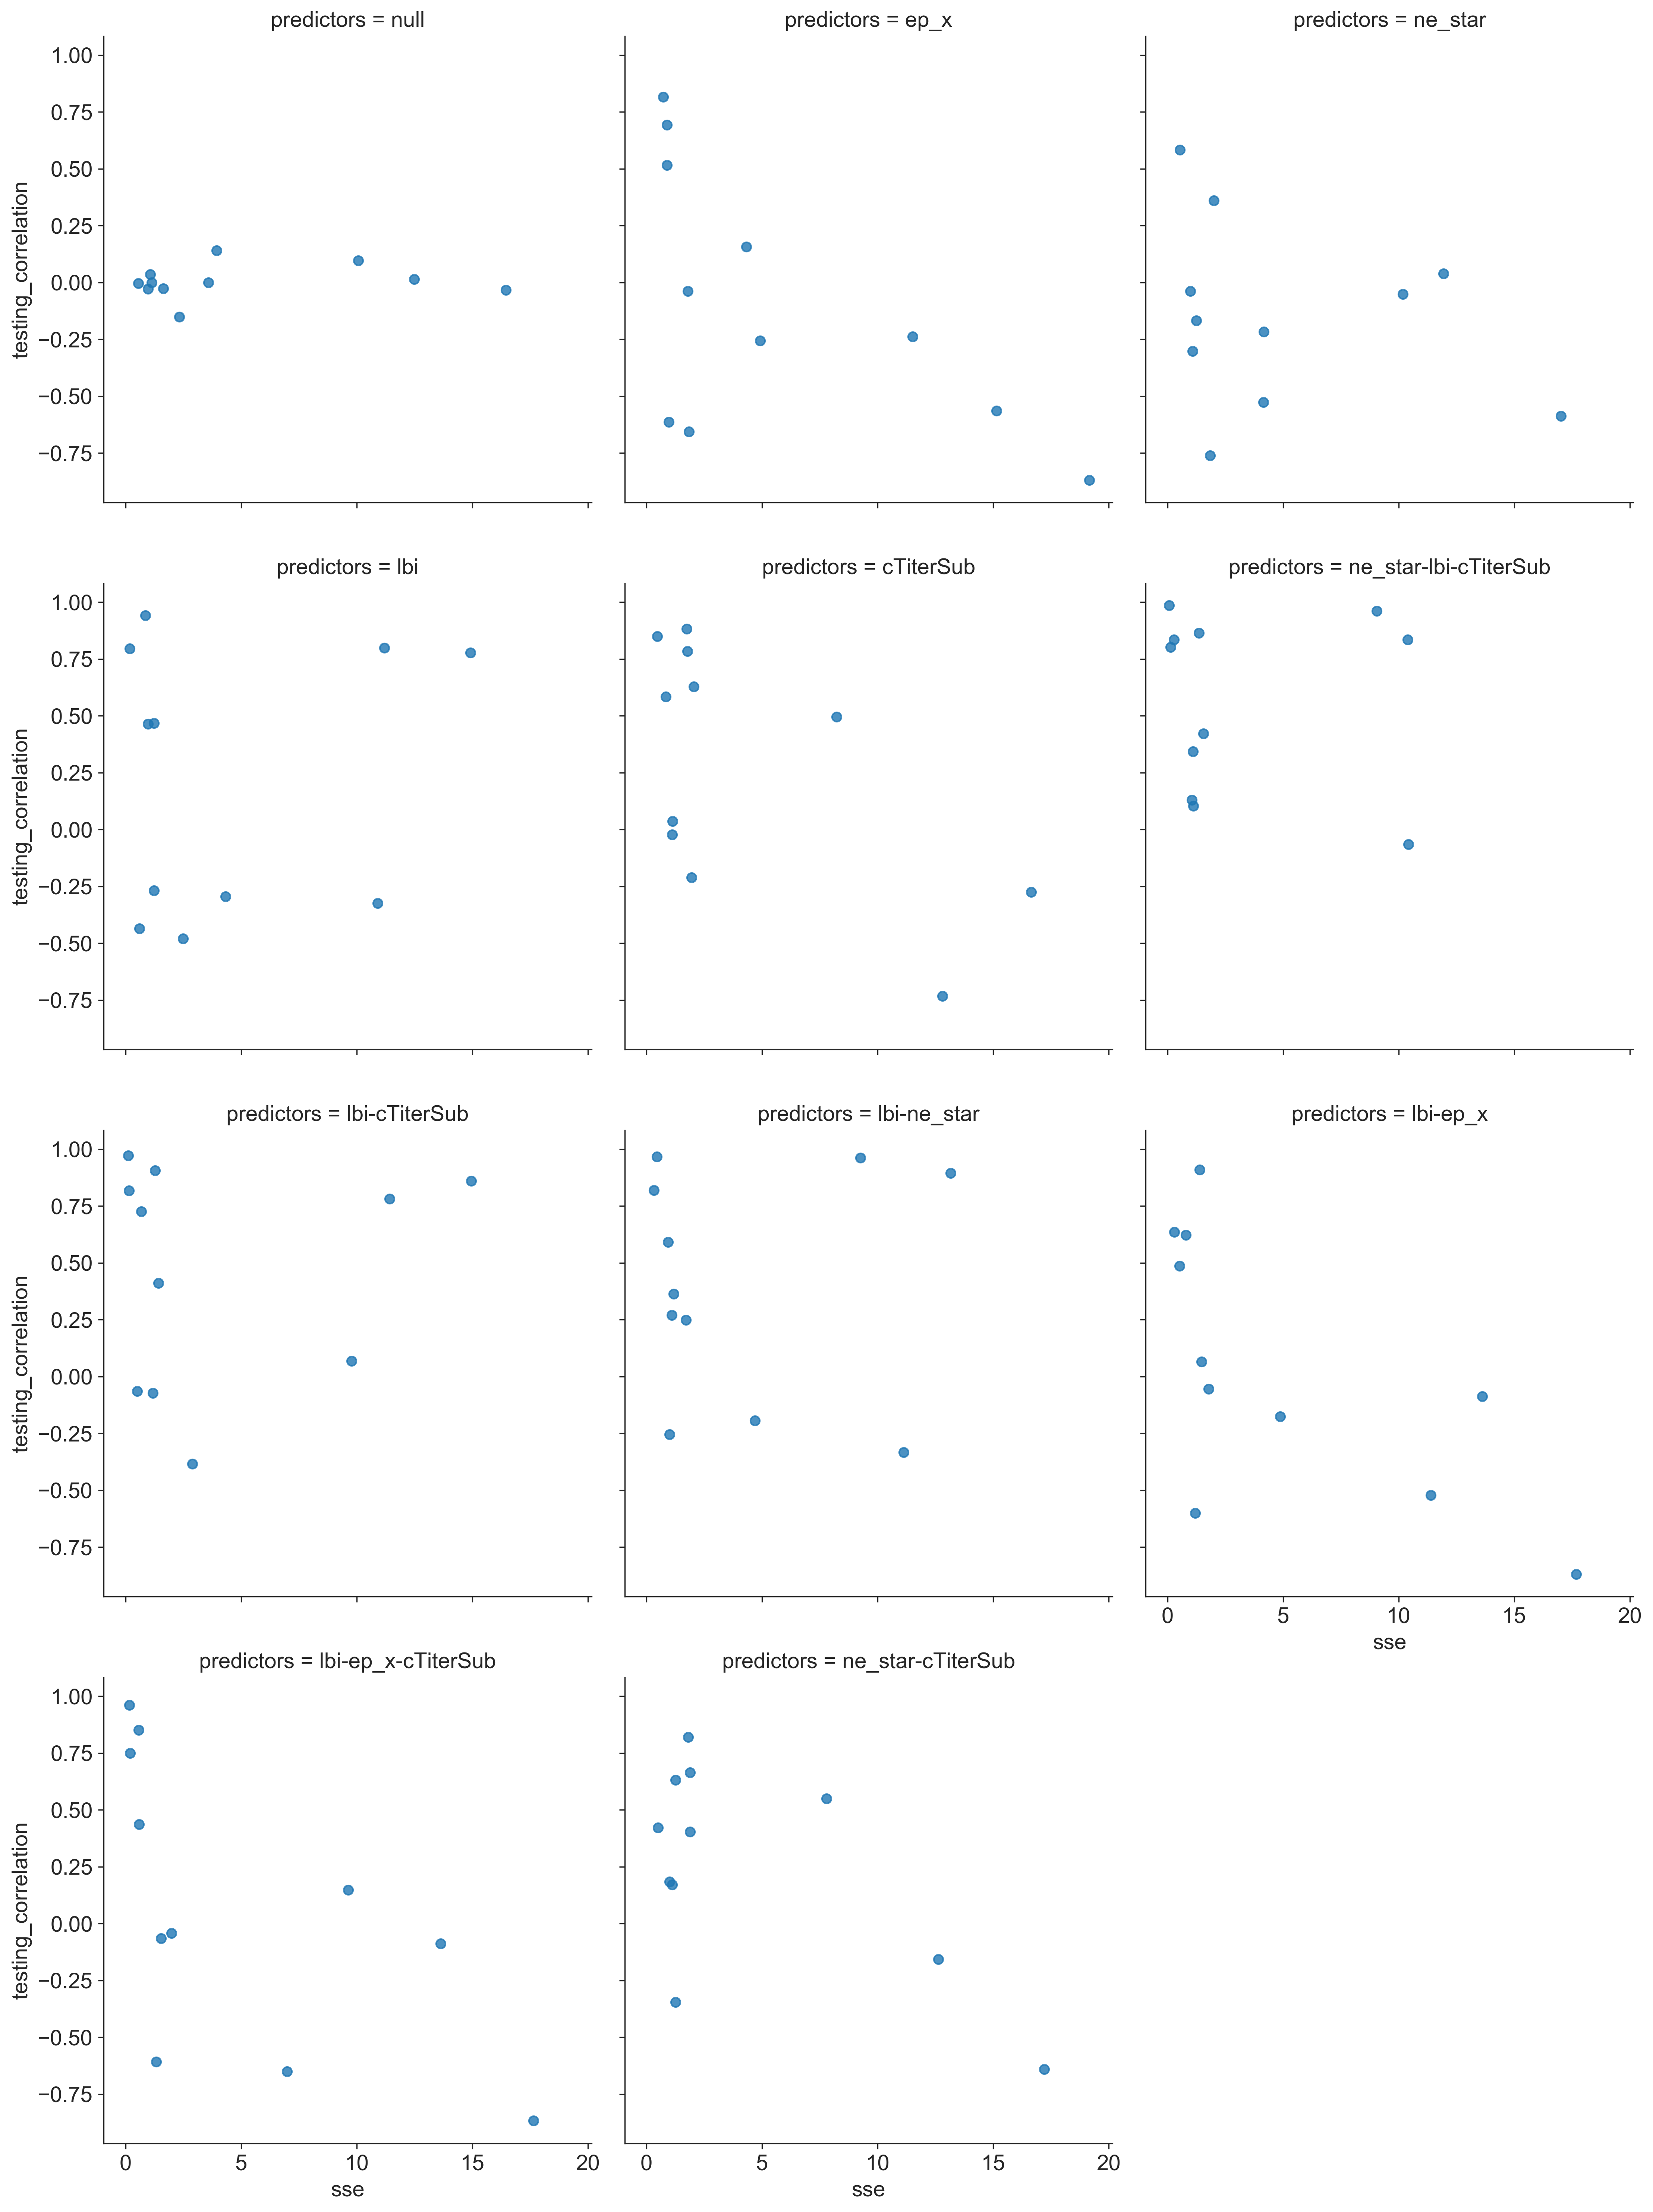

In [177]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="sse",
    y="testing_correlation",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

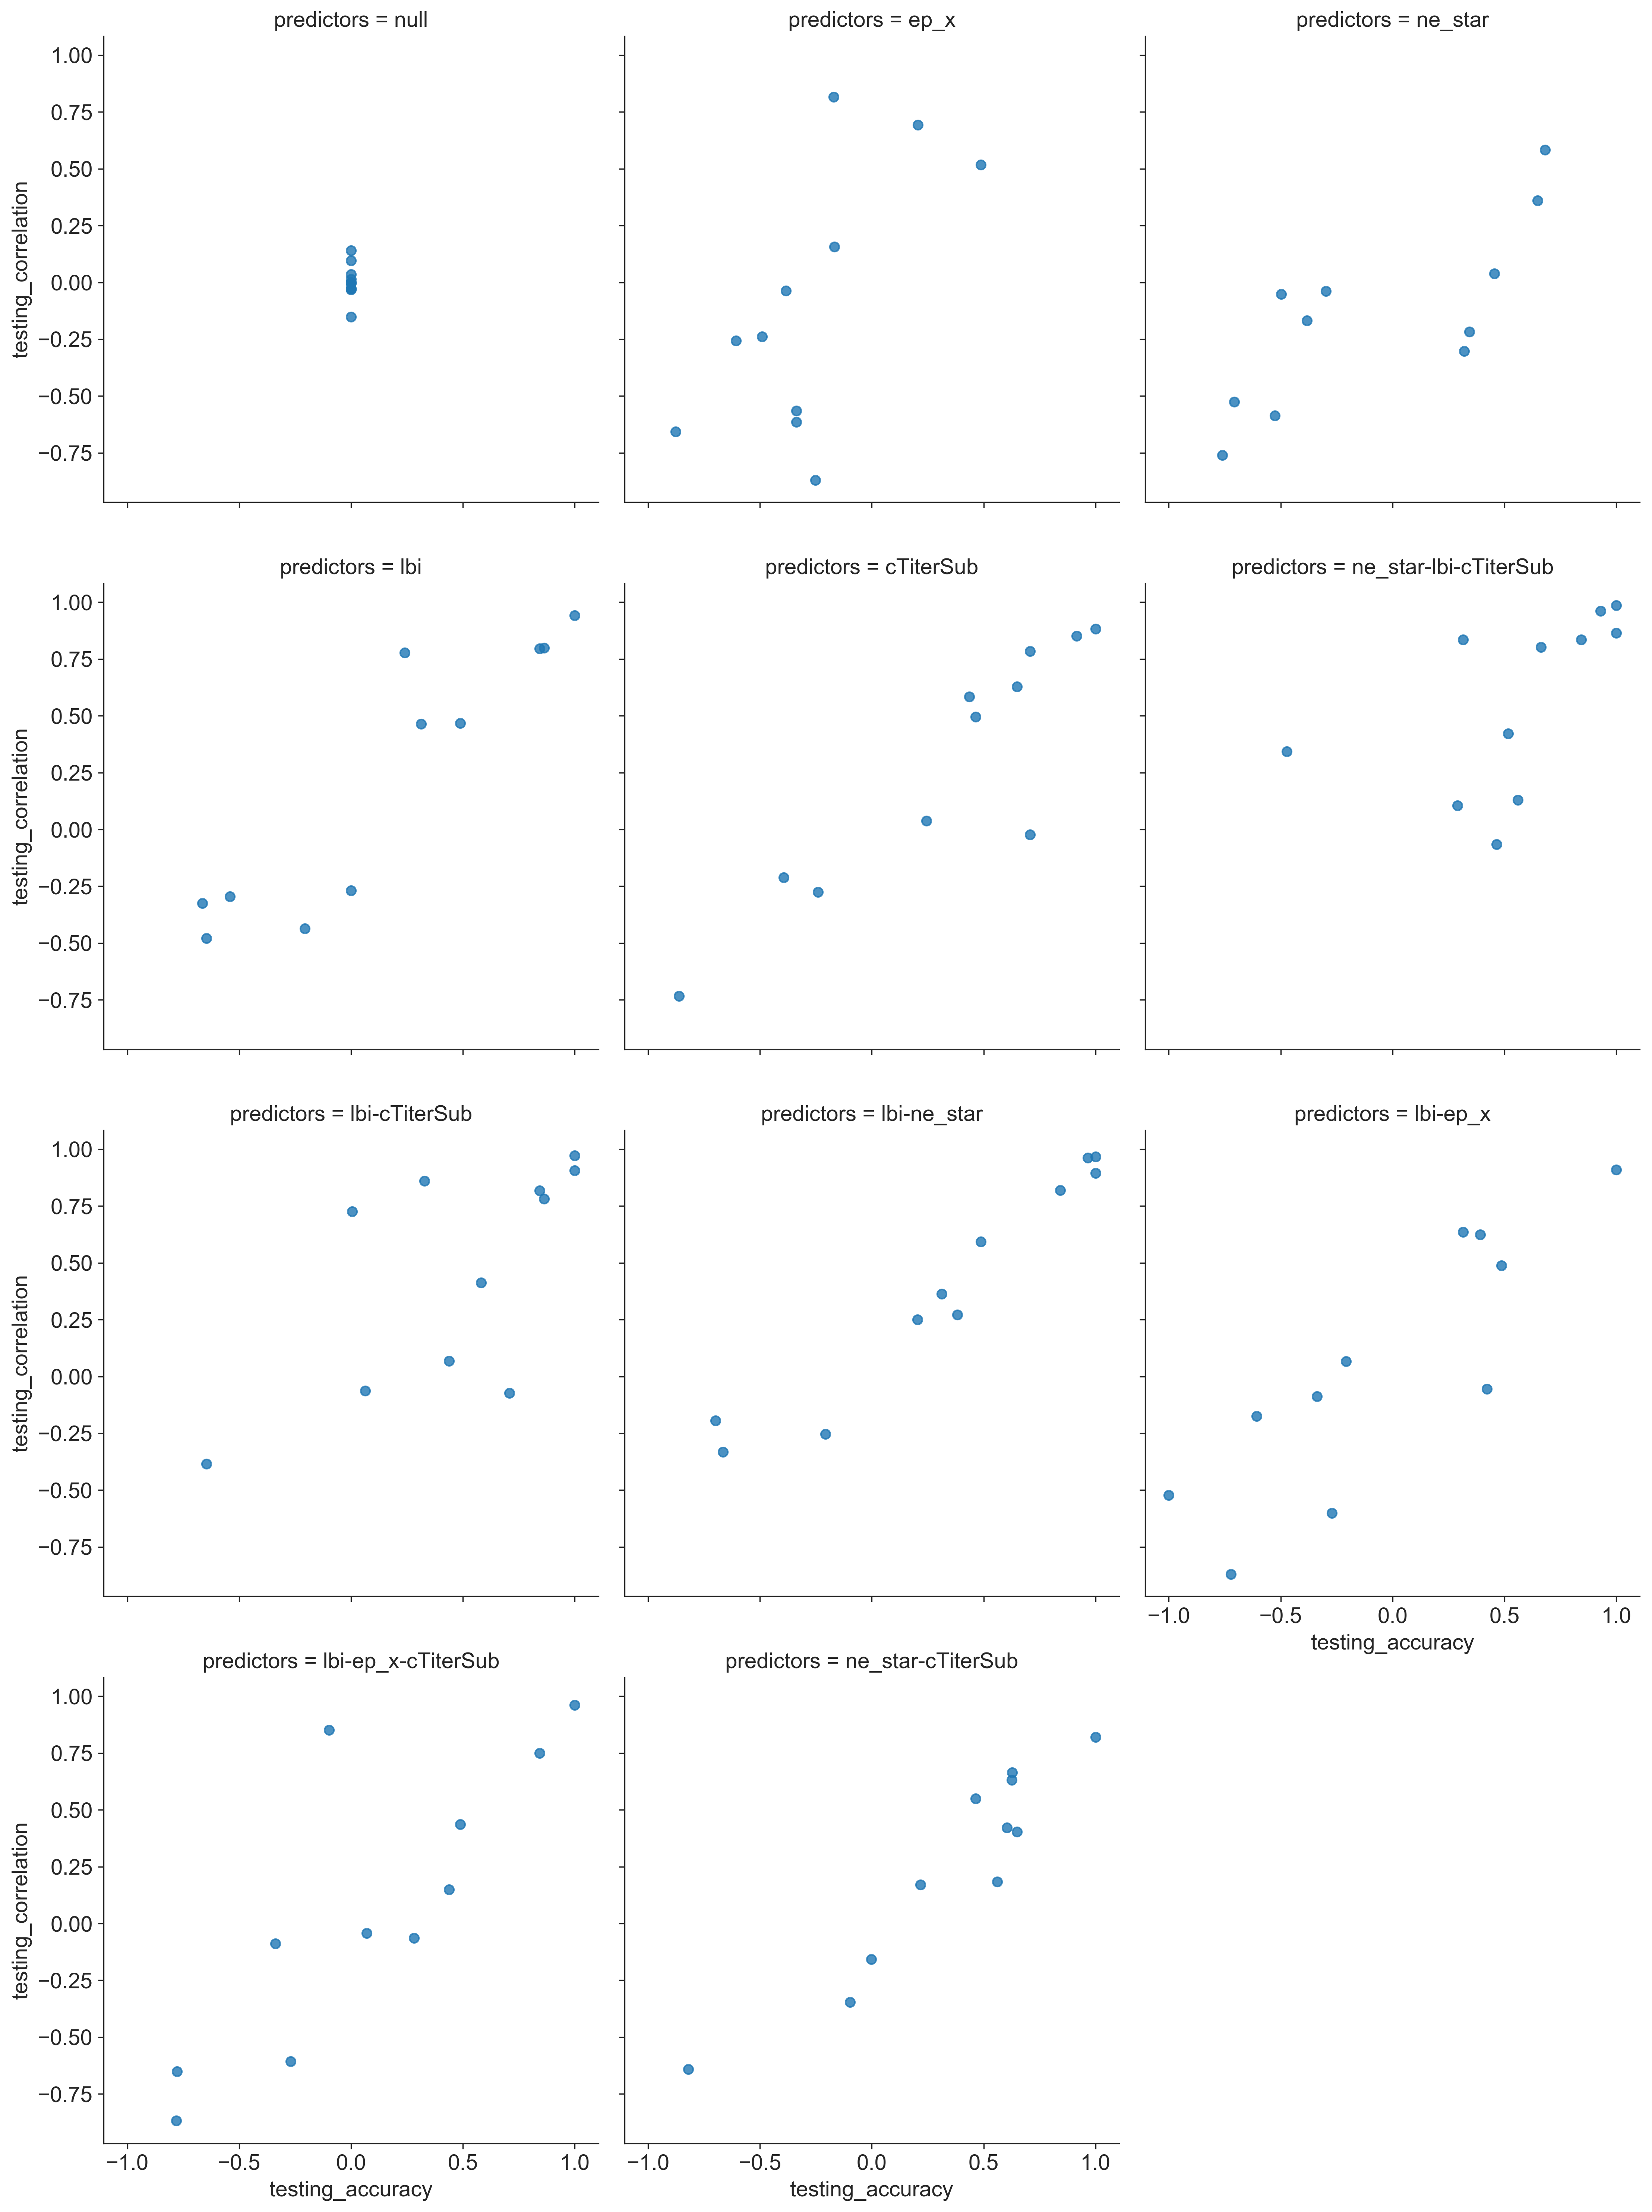

In [178]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="testing_accuracy",
    y="testing_correlation",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

In [179]:
df.head()

fn  fp  global_sd-cTiterSub  global_sd-ep_x  global_sd-lbi  \
0  53   0                  NaN             NaN            NaN   
1  36   0                  NaN             NaN            NaN   
2   0  14                  NaN             NaN            NaN   
3   0  18                  NaN             NaN            NaN   
4   0  23                  NaN             NaN            NaN   

   global_sd-ne_star  global_sd-null  last_training_timepoint  n_samples  \
0                NaN             0.0                  2011.25        101   
1                NaN             0.0                  2011.75         59   
2                NaN             0.0                  2012.25         51   
3                NaN             0.0                  2012.75         51   
4                NaN             0.0                  2013.25         34   

   parameter-cTiterSub  ...  testing_correlation  tn  tp  training_accuracy  \
0                  NaN  ...            -0.032544  48   0           0.066827   
1                  NaN  ...             0.014051  23   0           0.071165   
2                  NaN  ...            -0.151211   0  37          -0.016591   
3                  NaN  ...            -0.004386   0  33          -0.054463   
4                  NaN  ...             0.139972   0  11           0.029775   

  training_correlation  training_windows  viruses  year_range  predictor_name  \
0             0.007788                 9       92   2006-2018            null   
1            -0.002537                10       92   2006-2018            null   
2            -0.136689                11       92   2006-2018            null   
3            -0.139167                12       92   2006-2018            null   
4            -0.138286                13       92   2006-2018            null   

        mse  
0  0.162928  
1  0.211803  
2  0.045557  
3  0.010750  
4  0.115989  

[5 rows x 30 columns]

In [180]:
df["predictors"].unique()

array(['null', 'ep_x', 'ne_star', 'lbi', 'cTiterSub',
       'ne_star-lbi-cTiterSub', 'lbi-cTiterSub', 'lbi-ne_star', 'lbi-ep_x',
       'lbi-ep_x-cTiterSub', 'ne_star-cTiterSub'], dtype=object)

In [181]:
df.columns

Index([u'fn', u'fp', u'global_sd-cTiterSub', u'global_sd-ep_x',
       u'global_sd-lbi', u'global_sd-ne_star', u'global_sd-null',
       u'last_training_timepoint', u'n_samples', u'parameter-cTiterSub',
       u'parameter-ep_x', u'parameter-lbi', u'parameter-ne_star',
       u'parameter-null', u'predictors', u'sae', u'sample', u'sse',
       u'test_timepoint', u'testing_accuracy', u'testing_correlation', u'tn',
       u'tp', u'training_accuracy', u'training_correlation',
       u'training_windows', u'viruses', u'year_range', u'predictor_name',
       u'mse'],
      dtype='object')

In [41]:
parameter_columns = [column for column in df.columns
                     if column.startswith("parameter-")]
df.loc[:, ["predictors"] + parameter_columns].groupby("predictors").mean()

parameter-cTiterSub  parameter-ep_x  \
predictors                                                        
cTiterSub                              0.568716             NaN   
ep_x                                        NaN        1.159161   
lbi                                         NaN             NaN   
lbi-cTiterSub                          0.629910             NaN   
lbi-ep_x                                    NaN        0.968165   
lbi-ep_x-cTiterSub                     0.334060        0.915657   
lbi-ne_star                                 NaN             NaN   
ne_star                                     NaN             NaN   
ne_star-cTiterSub                      0.559358             NaN   
ne_star-ep_x-lbi-cTiterSub             0.759988        2.214639   
ne_star-lbi-cTiterSub                  0.750829             NaN   
null                                        NaN             NaN   

                            parameter-lbi  parameter-ne_star  parameter-null  
predictors                                                                    
cTiterSub                             NaN                NaN             NaN  
ep_x                                  NaN                NaN             NaN  
lbi                              0.424158                NaN             NaN  
lbi-cTiterSub                    0.470712                NaN             NaN  
lbi-ep_x                         0.360503                NaN             NaN  
lbi-ep_x-cTiterSub               0.451842                NaN             NaN  
lbi-ne_star                      0.591150           0.560007             NaN  
ne_star                               NaN          -1.286326             NaN  
ne_star-cTiterSub                     NaN          -0.283478             NaN  
ne_star-ep_x-lbi-cTiterSub       1.027049           0.852086             NaN  
ne_star-lbi-cTiterSub            0.678890           0.614639             NaN  
null                                  NaN                NaN             0.0

In [42]:
sd_columns = [column for column in df.columns if column.startswith("global_sd-")]
df.loc[:, sd_columns].melt().dropna().reset_index().drop_duplicates(subset=["variable", "value"])

index             variable     value
0       44  global_sd-cTiterSub  0.435965
11      55  global_sd-cTiterSub  0.435965
66     143       global_sd-ep_x  0.816410
110    297        global_sd-lbi  0.175800
187    418    global_sd-ne_star  0.761671
198    451    global_sd-ne_star  0.761671
242    528       global_sd-null  0.000000

In [43]:
parameters_df = df.loc[:, ["predictor_name"] + parameter_columns].melt(
    "predictor_name",
    parameter_columns,
    var_name="predictor",
    value_name="parameter"
).dropna().copy()

In [44]:
parameters_df["predictor"] = parameters_df["predictor"].str.replace("parameter-", "")

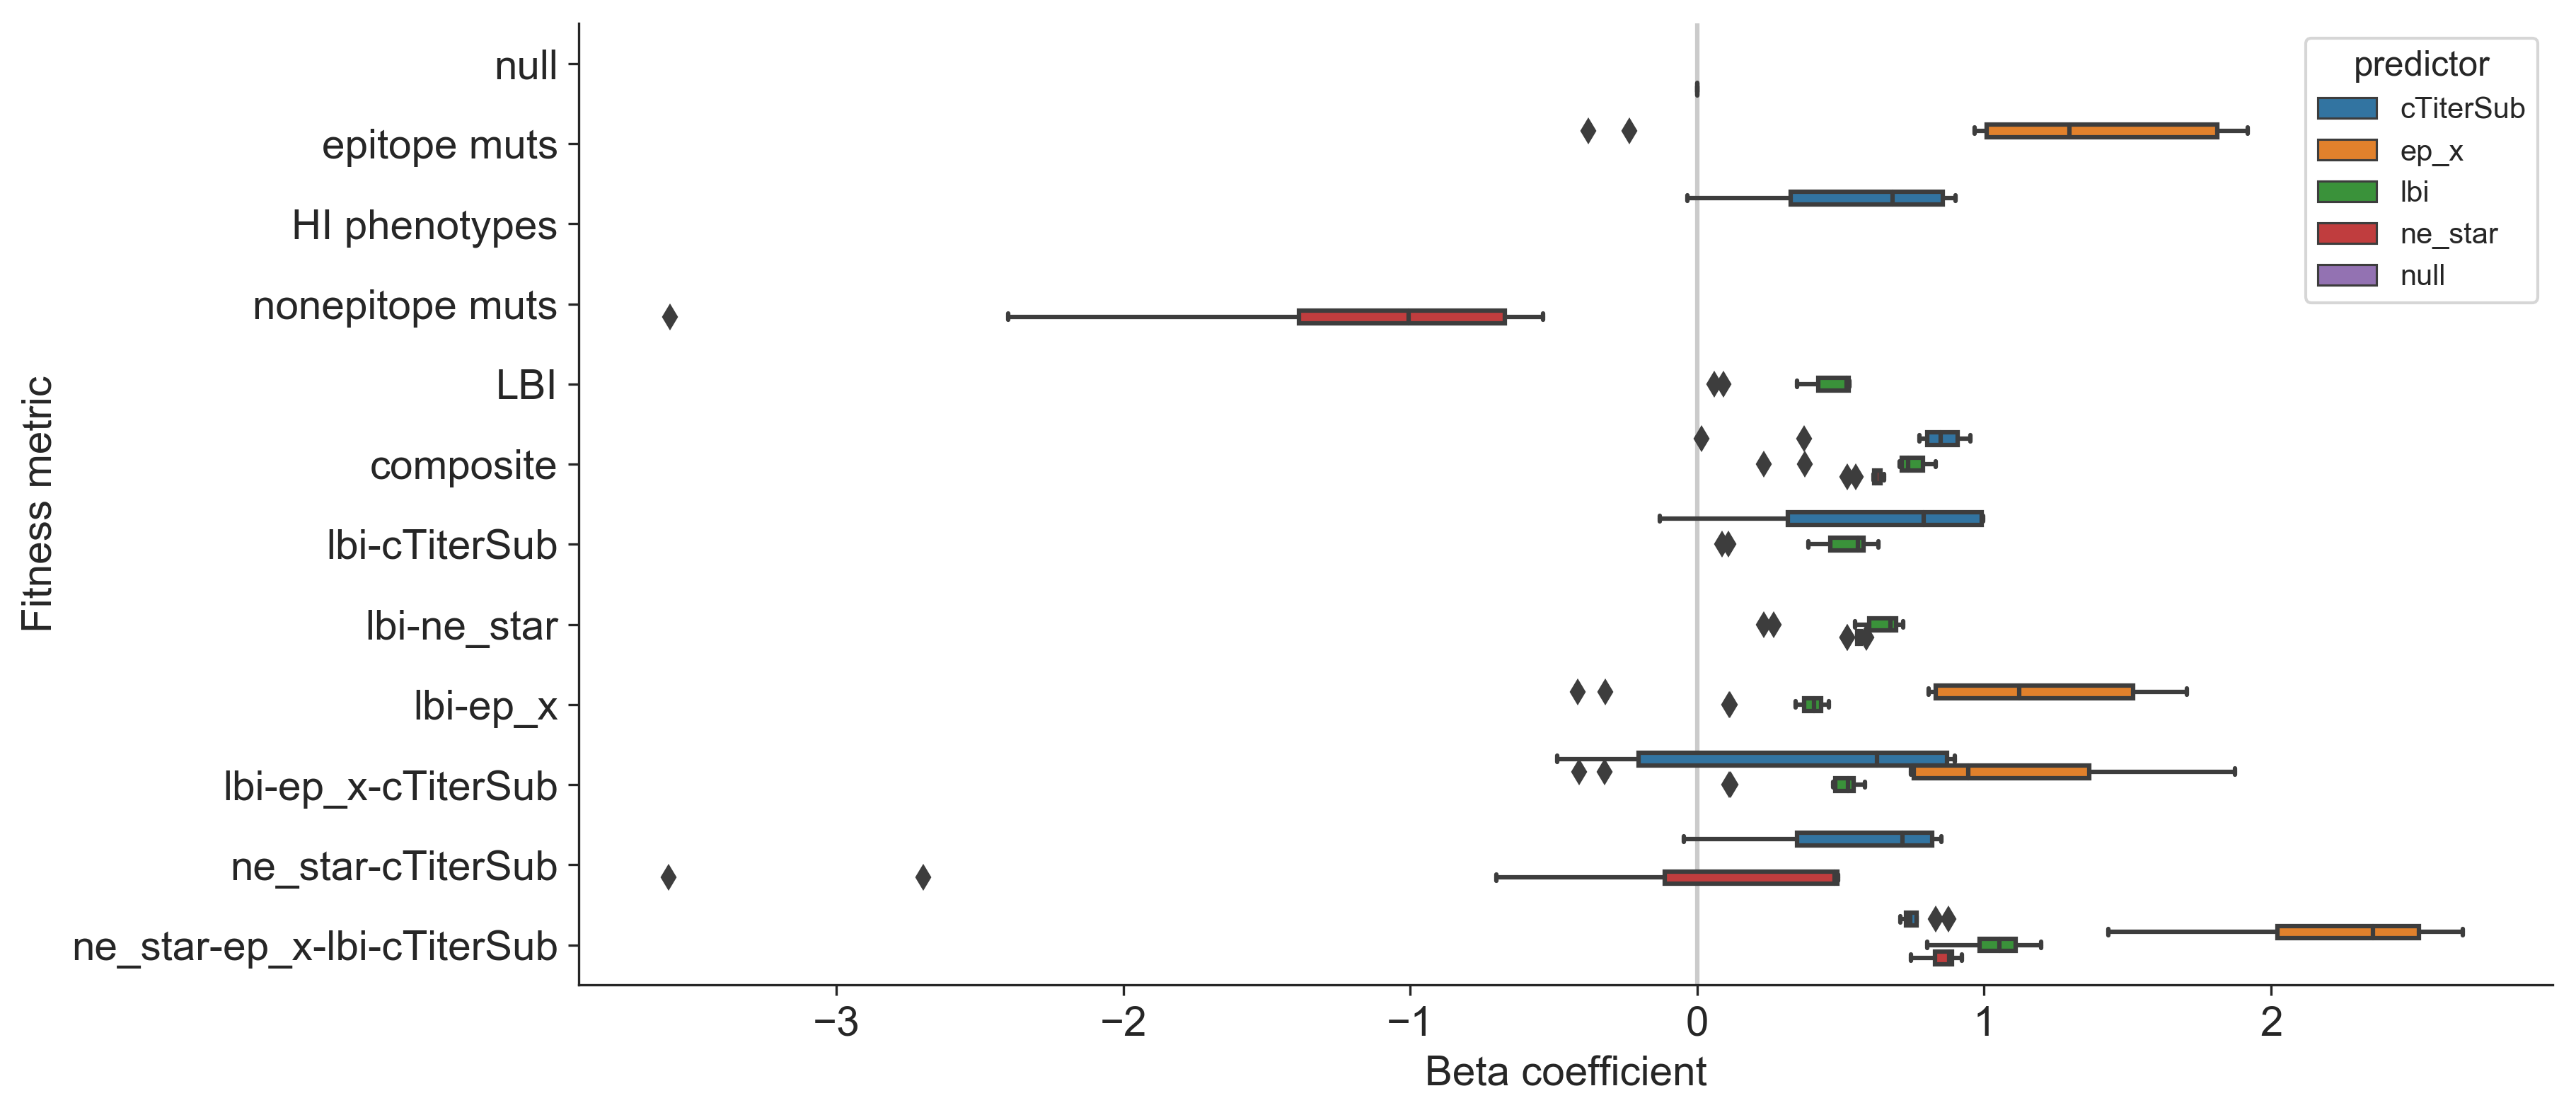

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(
    y="predictor_name",
    x="parameter",
    hue="predictor",
    data=parameters_df,
    ax=ax,
    dodge=True,
    order=predictor_names_order
)

ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
ax.set_xlabel("Beta coefficient")
ax.set_ylabel("Fitness metric")

sns.despine()

In [204]:
parameters_df.head()

predictor_name  predictor  parameter
44  HI phenotypes  cTiterSub  -0.033295
45  HI phenotypes  cTiterSub  -0.021806
46  HI phenotypes  cTiterSub   0.068473
47  HI phenotypes  cTiterSub   0.584187
48  HI phenotypes  cTiterSub   0.672897

In [205]:
parameters_df["predictor_name"].unique()

array(['HI phenotypes', 'composite', 'lbi-cTiterSub', 'lbi-ep_x-cTiterSub',
       'ne_star-cTiterSub', 'epitope muts', 'lbi-ep_x', 'LBI',
       'lbi-ne_star', 'nonepitope muts', 'null'], dtype=object)

In [206]:
parameters_df_to_plot = parameters_df[~parameters_df["predictor_name"].str.contains("-")].copy()

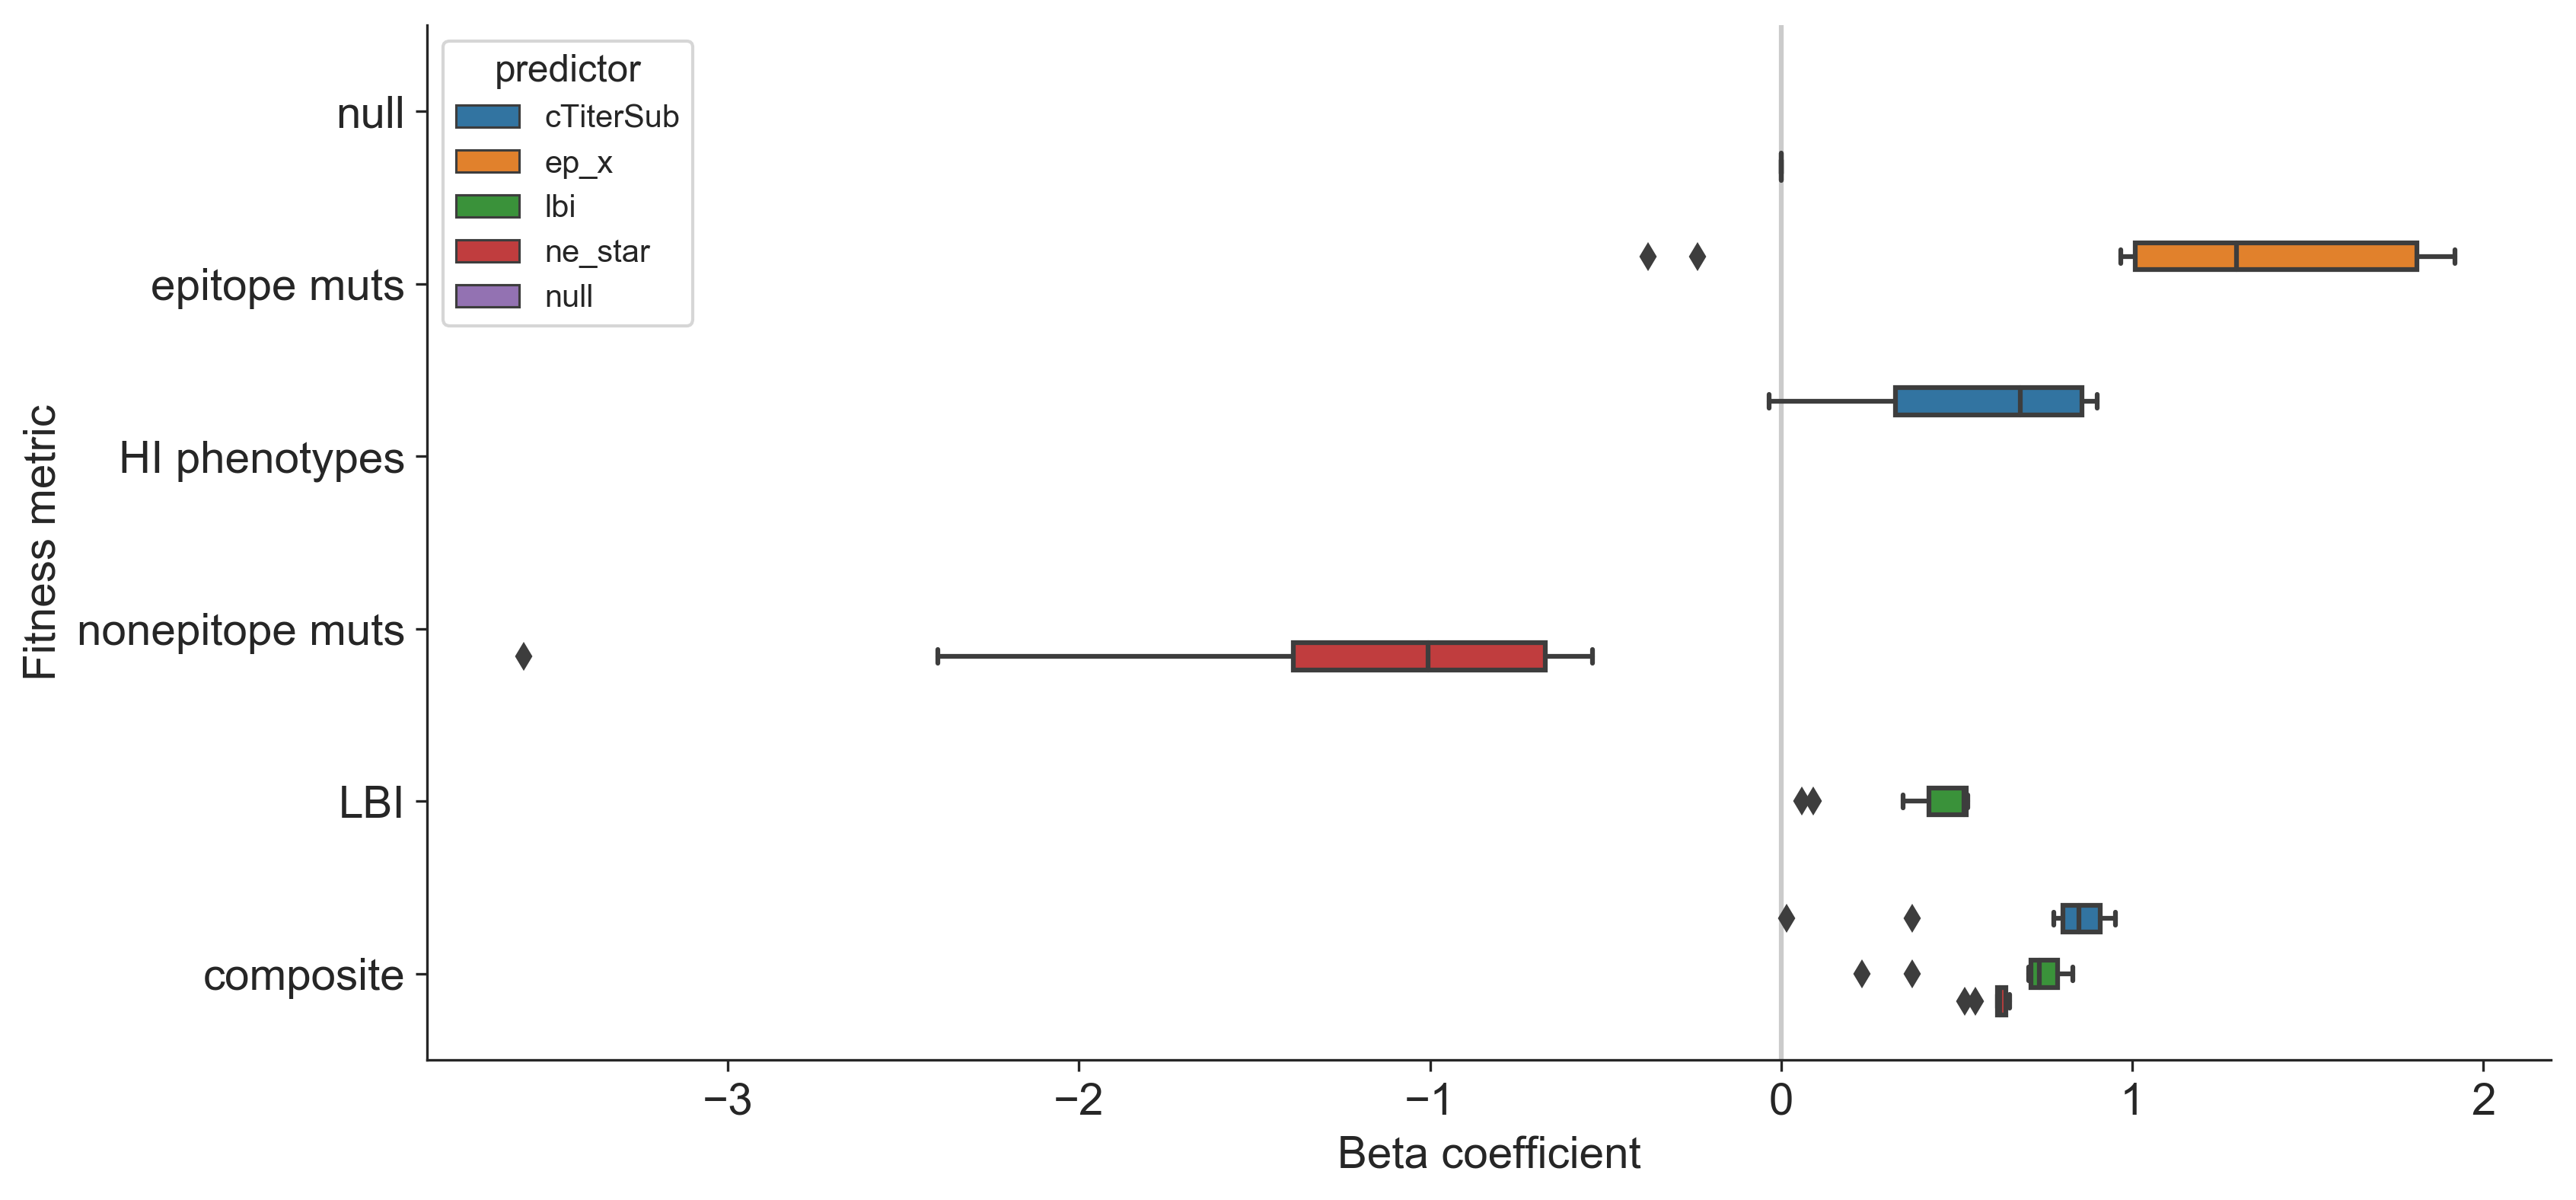

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(
    y="predictor_name",
    x="parameter",
    hue="predictor",
    data=parameters_df_to_plot,
    ax=ax,
    dodge=True,
    order=[name for name in predictor_names_order if not "-" in name]
)

ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
ax.set_xlabel("Beta coefficient")
ax.set_ylabel("Fitness metric")

sns.despine()

In [31]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum()

fn     8
fp    32
tn    82
tp    11
dtype: int64

In [32]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum().sum()

133

In [33]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum(axis=1)

66     3
67    17
68    12
69     3
70    24
71    17
72    17
73     9
74     7
75     9
76    15
dtype: int64

In [66]:
df.head()

fn  fp  last_training_timepoint  n_samples  parameter-cTiterSub  \
0  53   0                  2011.25        101                  NaN   
1  36   0                  2011.75         59                  NaN   
2   0  14                  2012.25         51                  NaN   
3   0  18                  2012.75         51                  NaN   
4   0  23                  2013.25         34                  NaN   

   parameter-ep_x  parameter-lbi  parameter-ne_star  parameter-null  \
0             NaN            NaN                NaN             0.0   
1             NaN            NaN                NaN             0.0   
2             NaN            NaN                NaN             0.0   
3             NaN            NaN                NaN             0.0   
4             NaN            NaN                NaN             0.0   

  predictors    ...     testing_correlation  tn  tp  training_accuracy  \
0       null    ...               -0.032544  48   0           0.066827   
1       null    ...                0.014051  23   0           0.071165   
2       null    ...               -0.151211   0  37          -0.016591   
3       null    ...               -0.004386   0  33          -0.054463   
4       null    ...                0.139972   0  11           0.029775   

   training_correlation  training_windows  viruses  year_range  \
0              0.007788                 9       92   2006-2018   
1             -0.002537                10       92   2006-2018   
2             -0.136689                11       92   2006-2018   
3             -0.139167                12       92   2006-2018   
4             -0.138286                13       92   2006-2018   

   predictor_name       mse  
0            null  0.162928  
1            null  0.211803  
2            null  0.045557  
3            null  0.010750  
4            null  0.115989  

[5 rows x 25 columns]

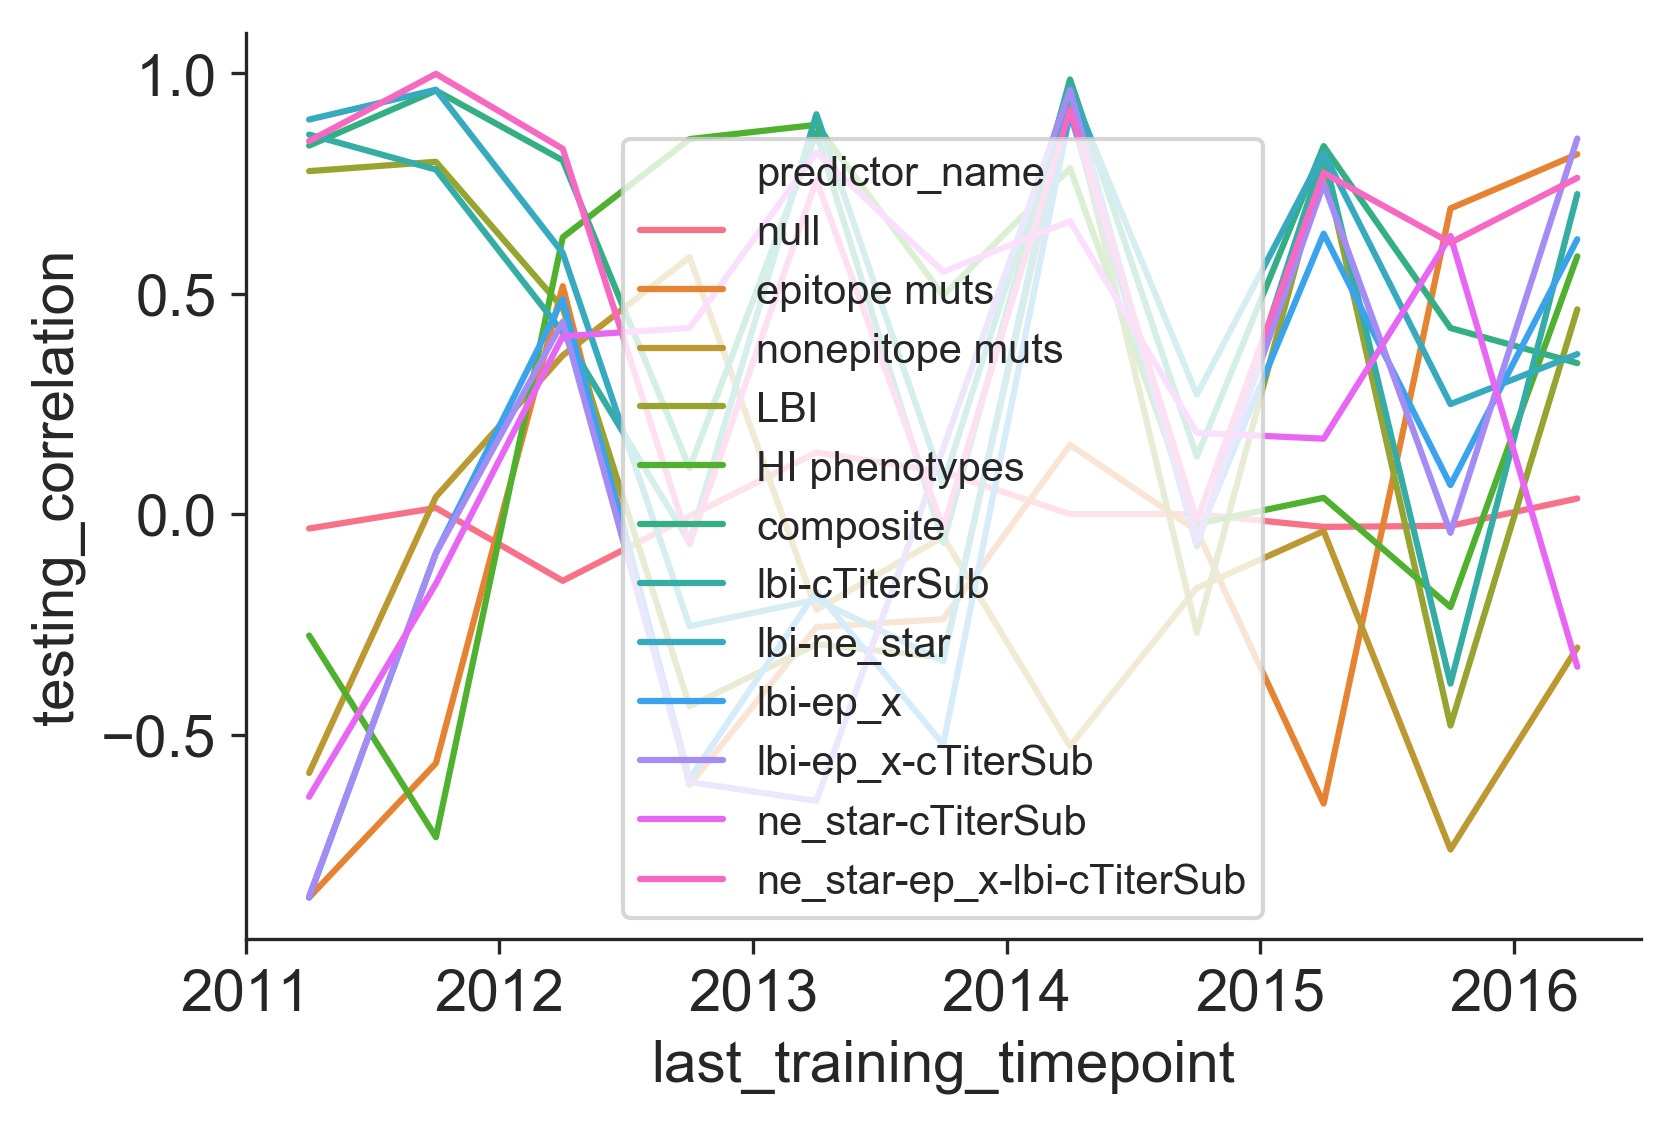

In [46]:
sns.lineplot("last_training_timepoint", "testing_correlation", "predictor_name", data=df)

In [ ]:
sns.tsplot("last_training_timepoint", "testing_correlation", "predictor_name", data=df)

In [82]:
df.head()

fn  fp  last_training_timepoint  n_samples  parameter-cTiterSub  \
0  53   0                  2011.25        101                  NaN   
1  36   0                  2011.75         59                  NaN   
2   0  14                  2012.25         51                  NaN   
3   0  18                  2012.75         51                  NaN   
4   0  23                  2013.25         34                  NaN   

   parameter-ep_x  parameter-lbi  parameter-ne_star  parameter-null  \
0             NaN            NaN                NaN             0.0   
1             NaN            NaN                NaN             0.0   
2             NaN            NaN                NaN             0.0   
3             NaN            NaN                NaN             0.0   
4             NaN            NaN                NaN             0.0   

  predictors    ...     testing_correlation  tn  tp  training_accuracy  \
0       null    ...               -0.032544  48   0           0.066827   
1       null    ...                0.014051  23   0           0.071165   
2       null    ...               -0.151211   0  37          -0.016591   
3       null    ...               -0.004386   0  33          -0.054463   
4       null    ...                0.139972   0  11           0.029775   

   training_correlation  training_windows  viruses  year_range  \
0              0.007788                 9       92   2006-2018   
1             -0.002537                10       92   2006-2018   
2             -0.136689                11       92   2006-2018   
3             -0.139167                12       92   2006-2018   
4             -0.138286                13       92   2006-2018   

   predictor_name       mse  
0            null  0.162928  
1            null  0.211803  
2            null  0.045557  
3            null  0.010750  
4            null  0.115989  

[5 rows x 25 columns]

In [80]:
df["last_training_timepoint"].describe()

count      66.000000
mean     2013.750000
std         1.593255
min      2011.250000
25%      2012.250000
50%      2013.750000
75%      2015.250000
max      2016.250000
Name: last_training_timepoint, dtype: float64

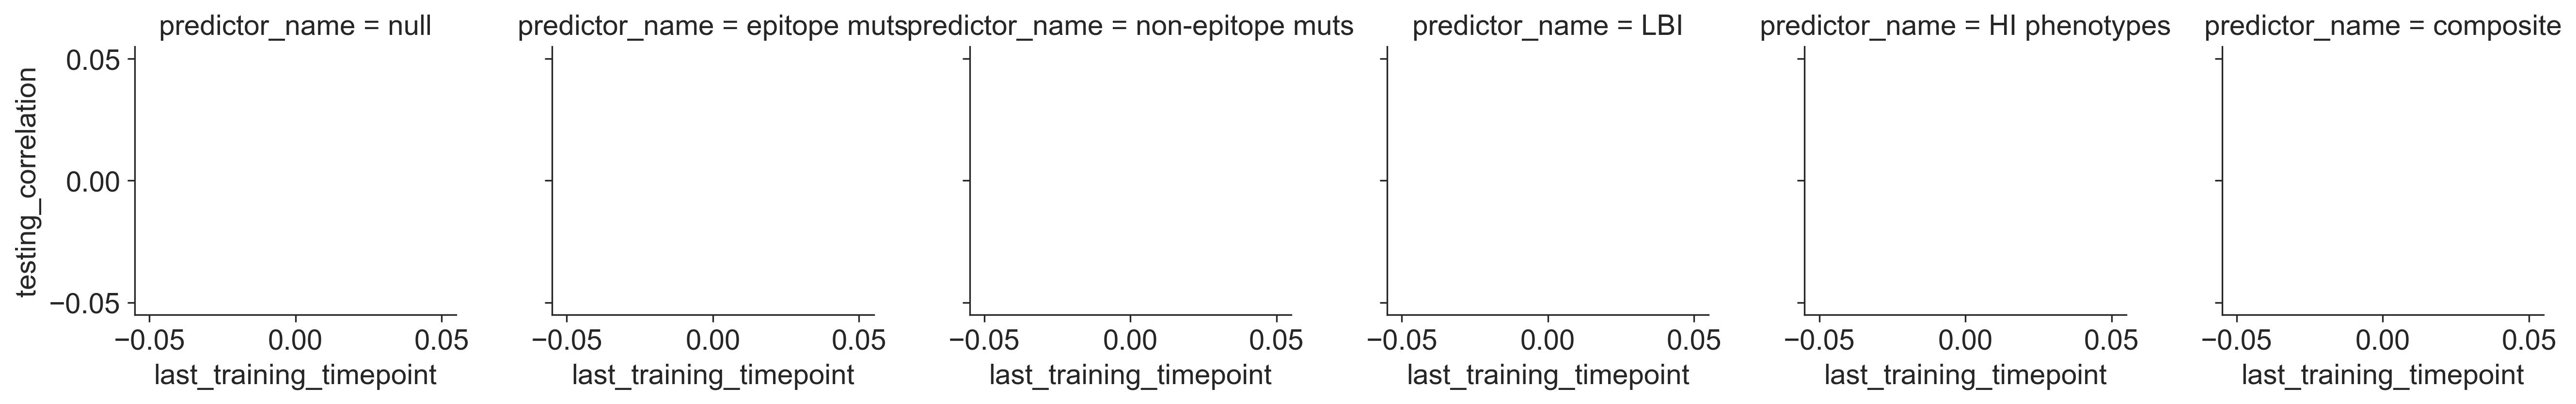

In [93]:
#def facet_time_plot(data, value, value_label, timepoint_column="timepoint", predictors_column="predictors"):
g = sns.FacetGrid(df, col="predictor_name")
g.map_dataframe(sns.lineplot, "last_training_timepoint", "testing_correlation", markers=True, dashes=False)
#g.set_axis_labels("Date", "Pearson's $r$")

In [ ]:
sns.lineplot()

In [ ]:
g = sns.FacetGrid(data, col="predictor_name", col_wrap=3, height=4)
g.map(sns.lineplot, x=timepoint_column, y=value, estimator="mean", ci="sd", markers=True, dashes=False,
               style=predictors_column)
g.set_axis_labels("Date", value_label)


In [ ]:
sns.lineplot()

In [ ]:
for ax in g.axes.flatten():
    ax.axhline(y=0, color="#cccccc")

    start, end = [int(value) for value in ax.get_xlim()]
    end = end + 1
    stepsize = 2.0
    ax.xaxis.set_ticks(np.arange(start, end, stepsize))

    labels = ax.get_xticklabels()
    output = plt.setp(labels, rotation=30)

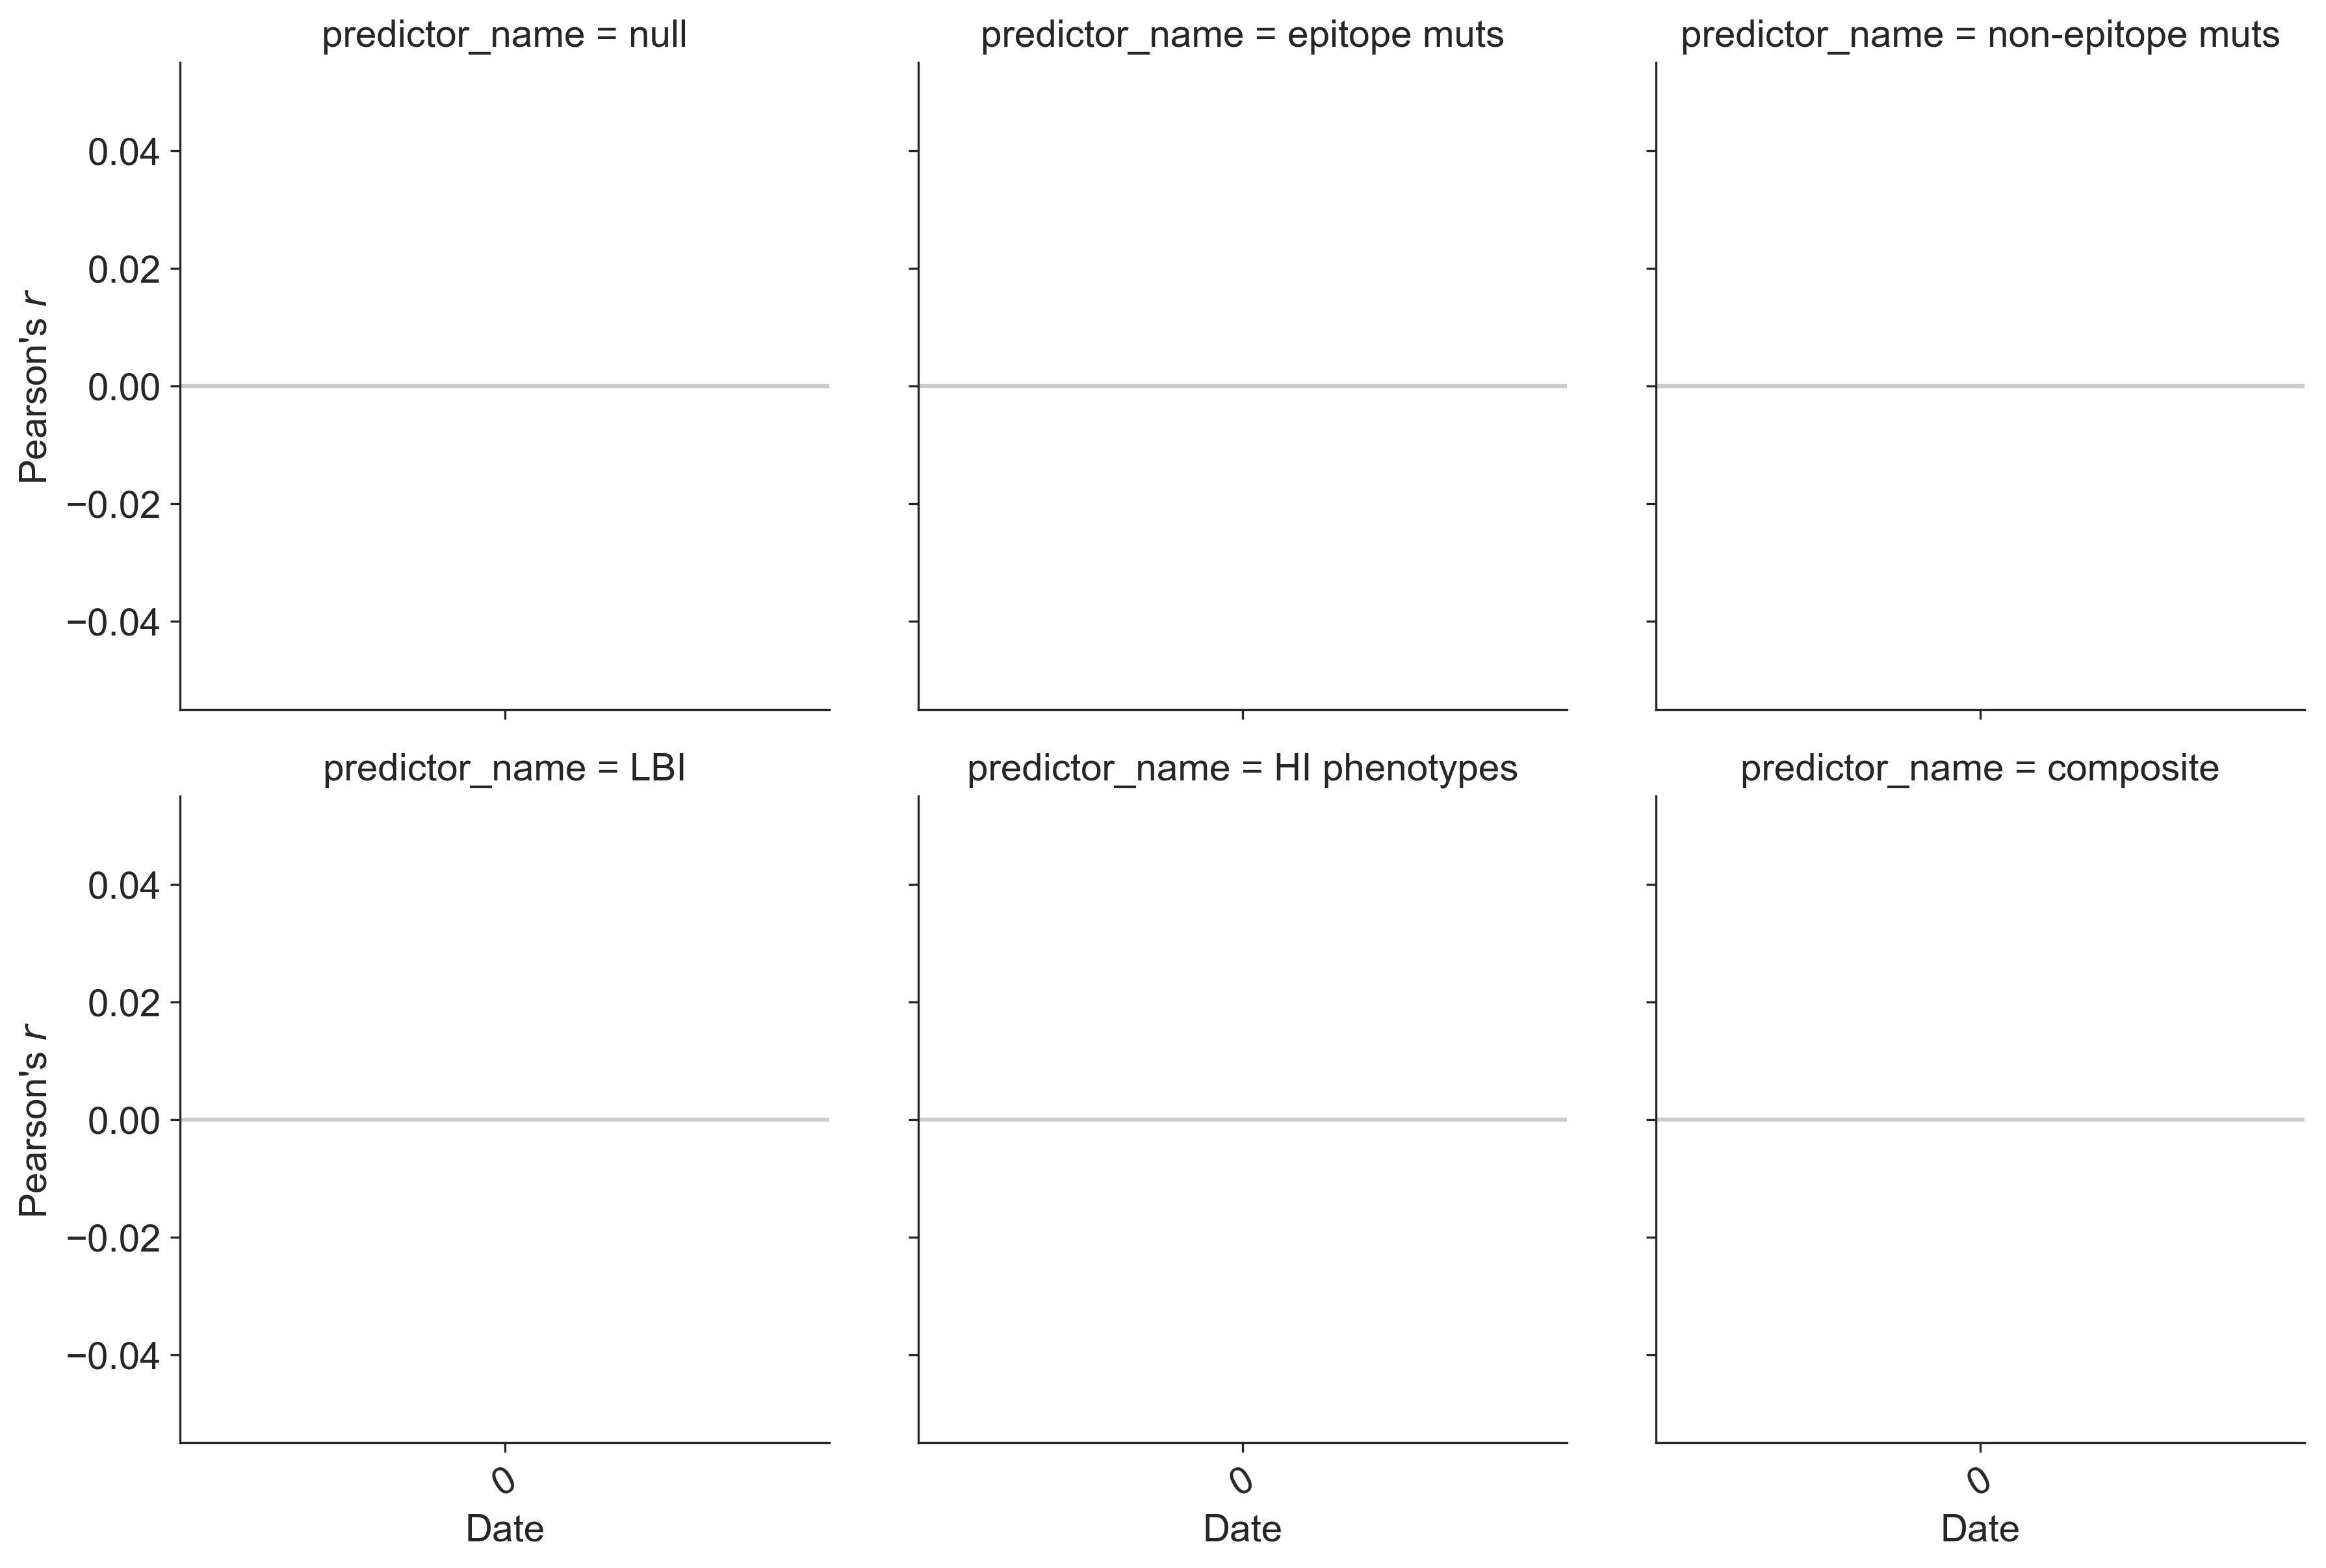

In [64]:
g = facet_time_plot(df, "testing_correlation", "Pearson's $r$", timepoint_column="last_training_timepoint",
                   predictors_column="predictor_name")

## Load raw model data

These data include observed and predicted clade frequencies for all clades across all timepoints in the cross-validation test data.

In [187]:
model_df = pd.read_table("models.tab", keep_default_na=False, na_values="N/A")

In [188]:
model_df.head()

clade  clade_size  initial_freq  observed_freq  predicted_freq  \
0  NODE_0000810         819      0.218169       0.054913        0.218174   
1  NODE_0011971          17      0.011282       0.001450        0.011282   
2  NODE_0003569        6609      0.694538       0.917818        0.694555   
3  NODE_0000811          18      0.021869       0.000144        0.021870   
4  NODE_0000809         801      0.154742       0.007328        0.154746   

   projected_timepoint  timepoint year_range  viruses predictors  sample  
0              2013.25    2012.25  2006-2018       92       null       0  
1              2013.25    2012.25  2006-2018       92       null       0  
2              2013.25    2012.25  2006-2018       92       null       0  
3              2013.75    2012.75  2006-2018       92       null       0  
4              2013.75    2012.75  2006-2018       92       null       0

In [189]:
model_df["observed_growth_rate"] = model_df["observed_freq"] / model_df["initial_freq"]
model_df["predicted_growth_rate"] = model_df["predicted_freq"] / model_df["initial_freq"]

In [190]:
test_df = model_df[model_df["predictors"] == "lbi"].copy()

In [191]:
correlation = pearsonr(test_df["observed_growth_rate"], test_df["predicted_growth_rate"])[0]
mcc, confusion_matrix = get_matthews_correlation_coefficient_for_data_frame(test_df, return_confusion_matrix=True)
accuracy = (confusion_matrix["tp"] + confusion_matrix["tn"]) / float(sum(confusion_matrix.values()))

(0, 5)

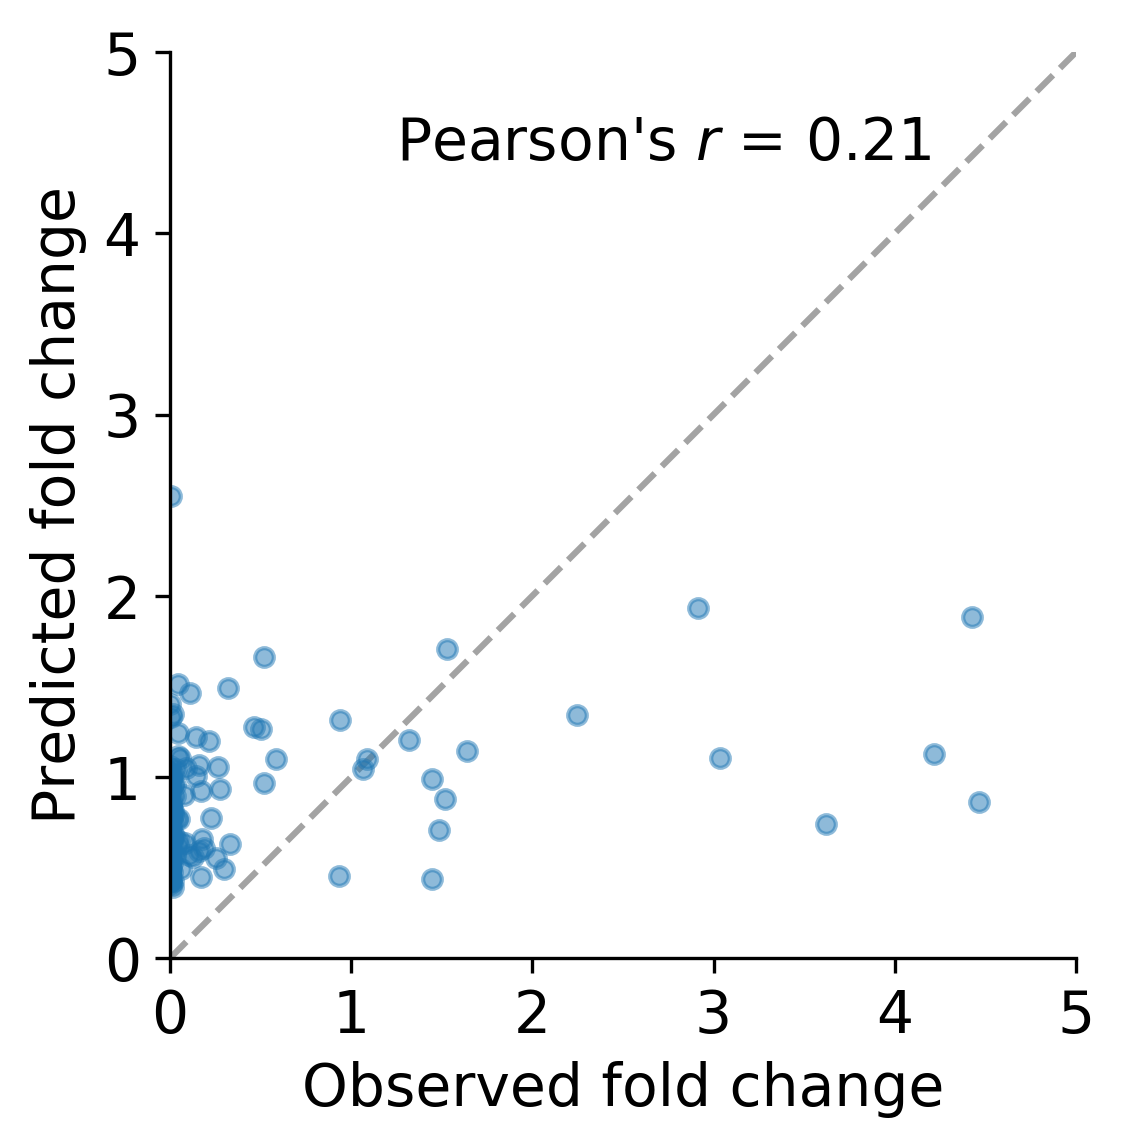

In [192]:
min_rate = 0
max_rate = 5
x = y = np.linspace(min_rate, max_rate, 100)
ax = test_df.plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax.plot(x, y, "--", color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Pearson's $r$ = %.2f" % correlation,
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [193]:
accurate_clades = (
    ((test_df["observed_growth_rate"] > 1) & (test_df["predicted_growth_rate"] > 1)) |
    ((test_df["observed_growth_rate"] < 1) & (test_df["predicted_growth_rate"] < 1))
)

(0, 5)

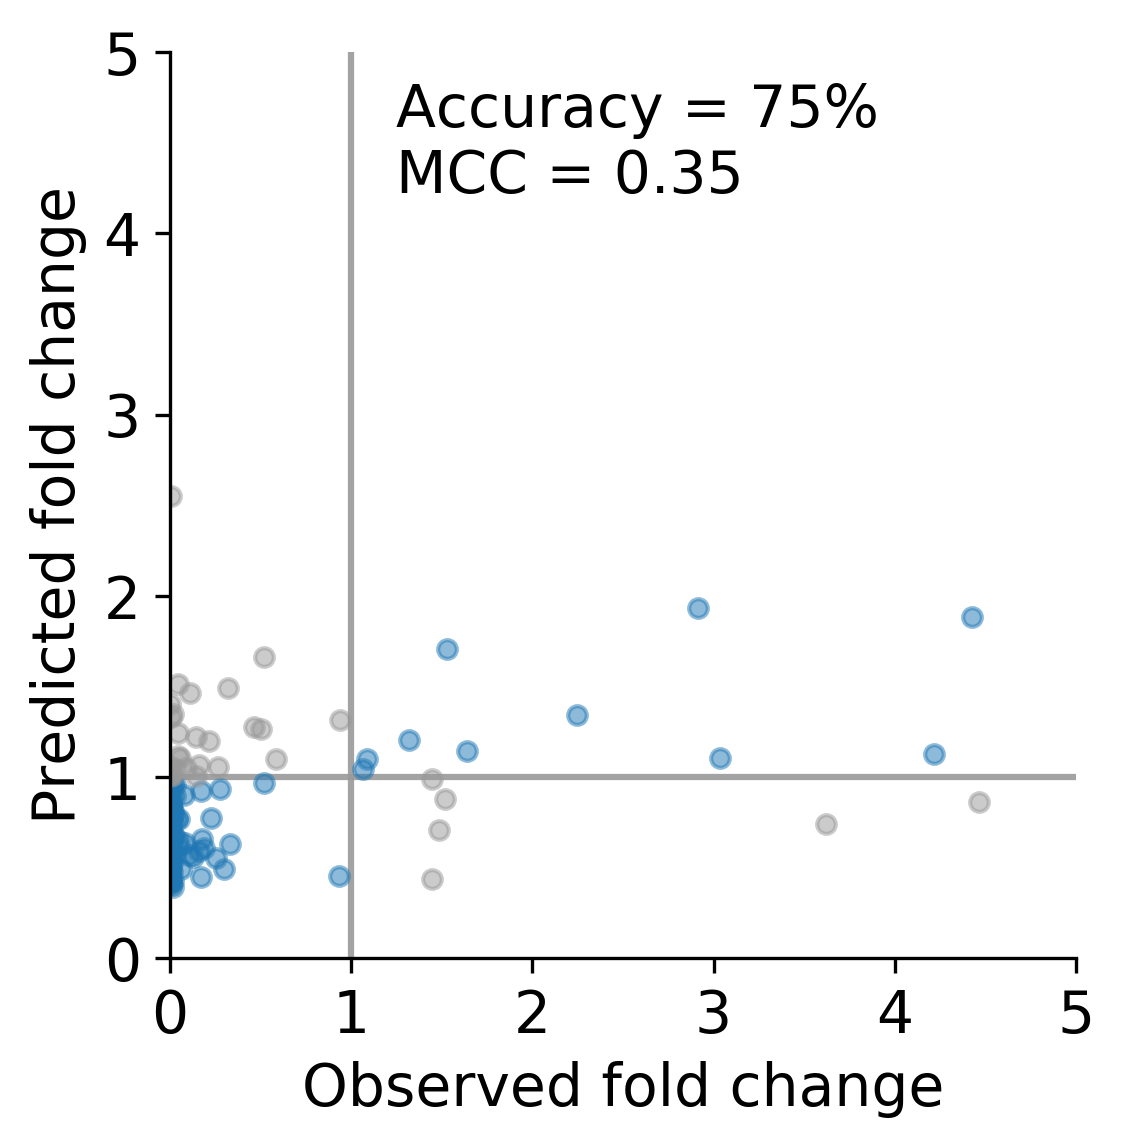

In [194]:
min_rate = 0
max_rate = 5
ax = test_df[accurate_clades].plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax = test_df[~accurate_clades].plot(
    ax=ax,
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    color="#999999"
)

ax.axhline(1, color="#999999", alpha=0.9, zorder=-10)
ax.axvline(1, color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Accuracy = %i%%\nMCC = %.2f" % (accuracy * 100, mcc),
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [195]:
df_by_timepoint = model_df.groupby(["predictors", "timepoint", "sample"])

In [196]:
model_correlation_by_time = df_by_timepoint.apply(
    calculate_correlation_for_df
).reset_index(name="correlation")

In [197]:
test = model_correlation_by_time[model_correlation_by_time["predictors"].isin(["null", "lbi", "cTiterSub"])].dropna()

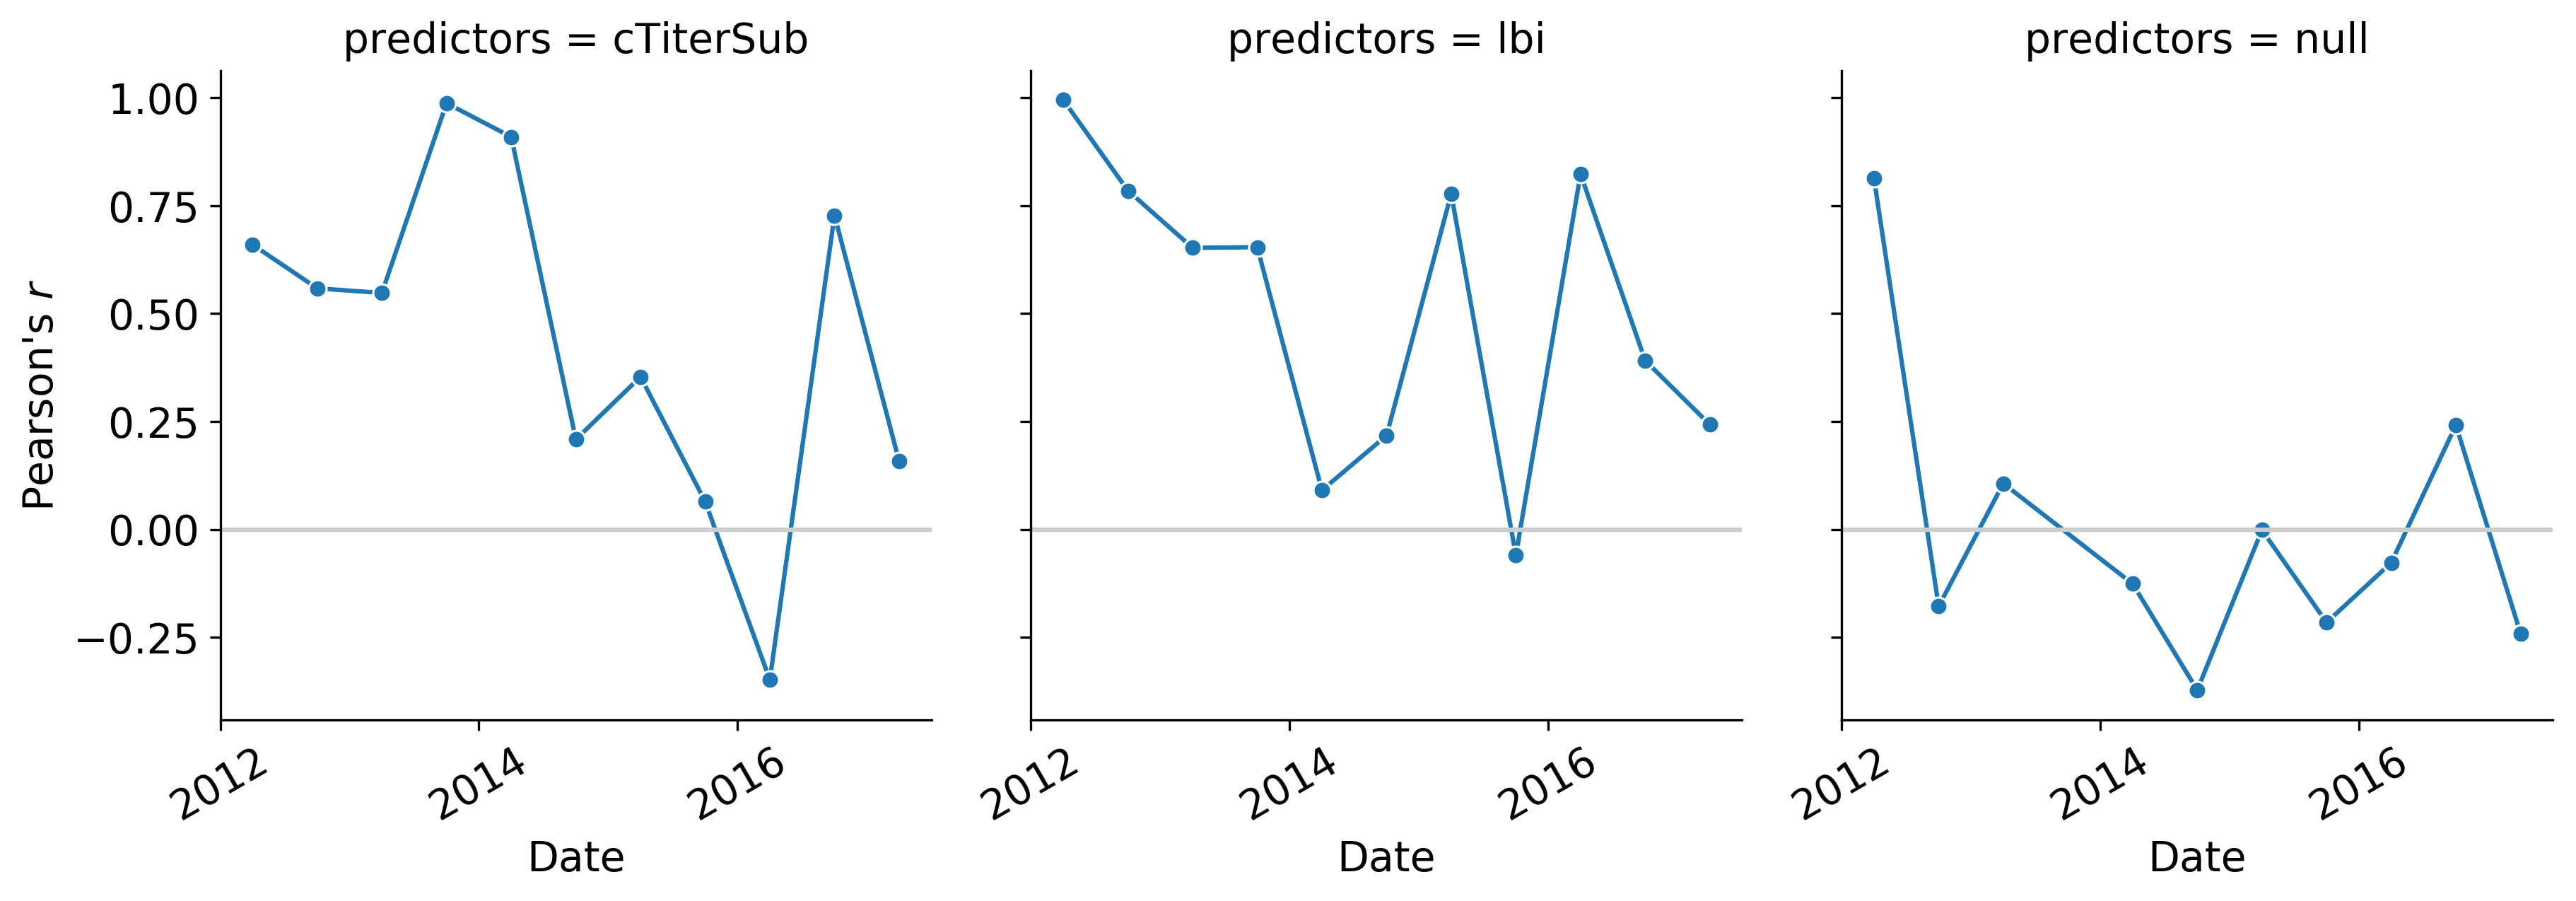

In [198]:
g = facet_time_plot(test, "correlation", "Pearson's $r$")

In [199]:
model_mcc_by_time = df_by_timepoint.apply(
    get_matthews_correlation_coefficient_for_data_frame
).reset_index(name="mcc")

In [200]:
mcc_test = model_mcc_by_time[model_mcc_by_time["predictors"].isin(["null", "lbi", "cTiterSub"])].dropna()

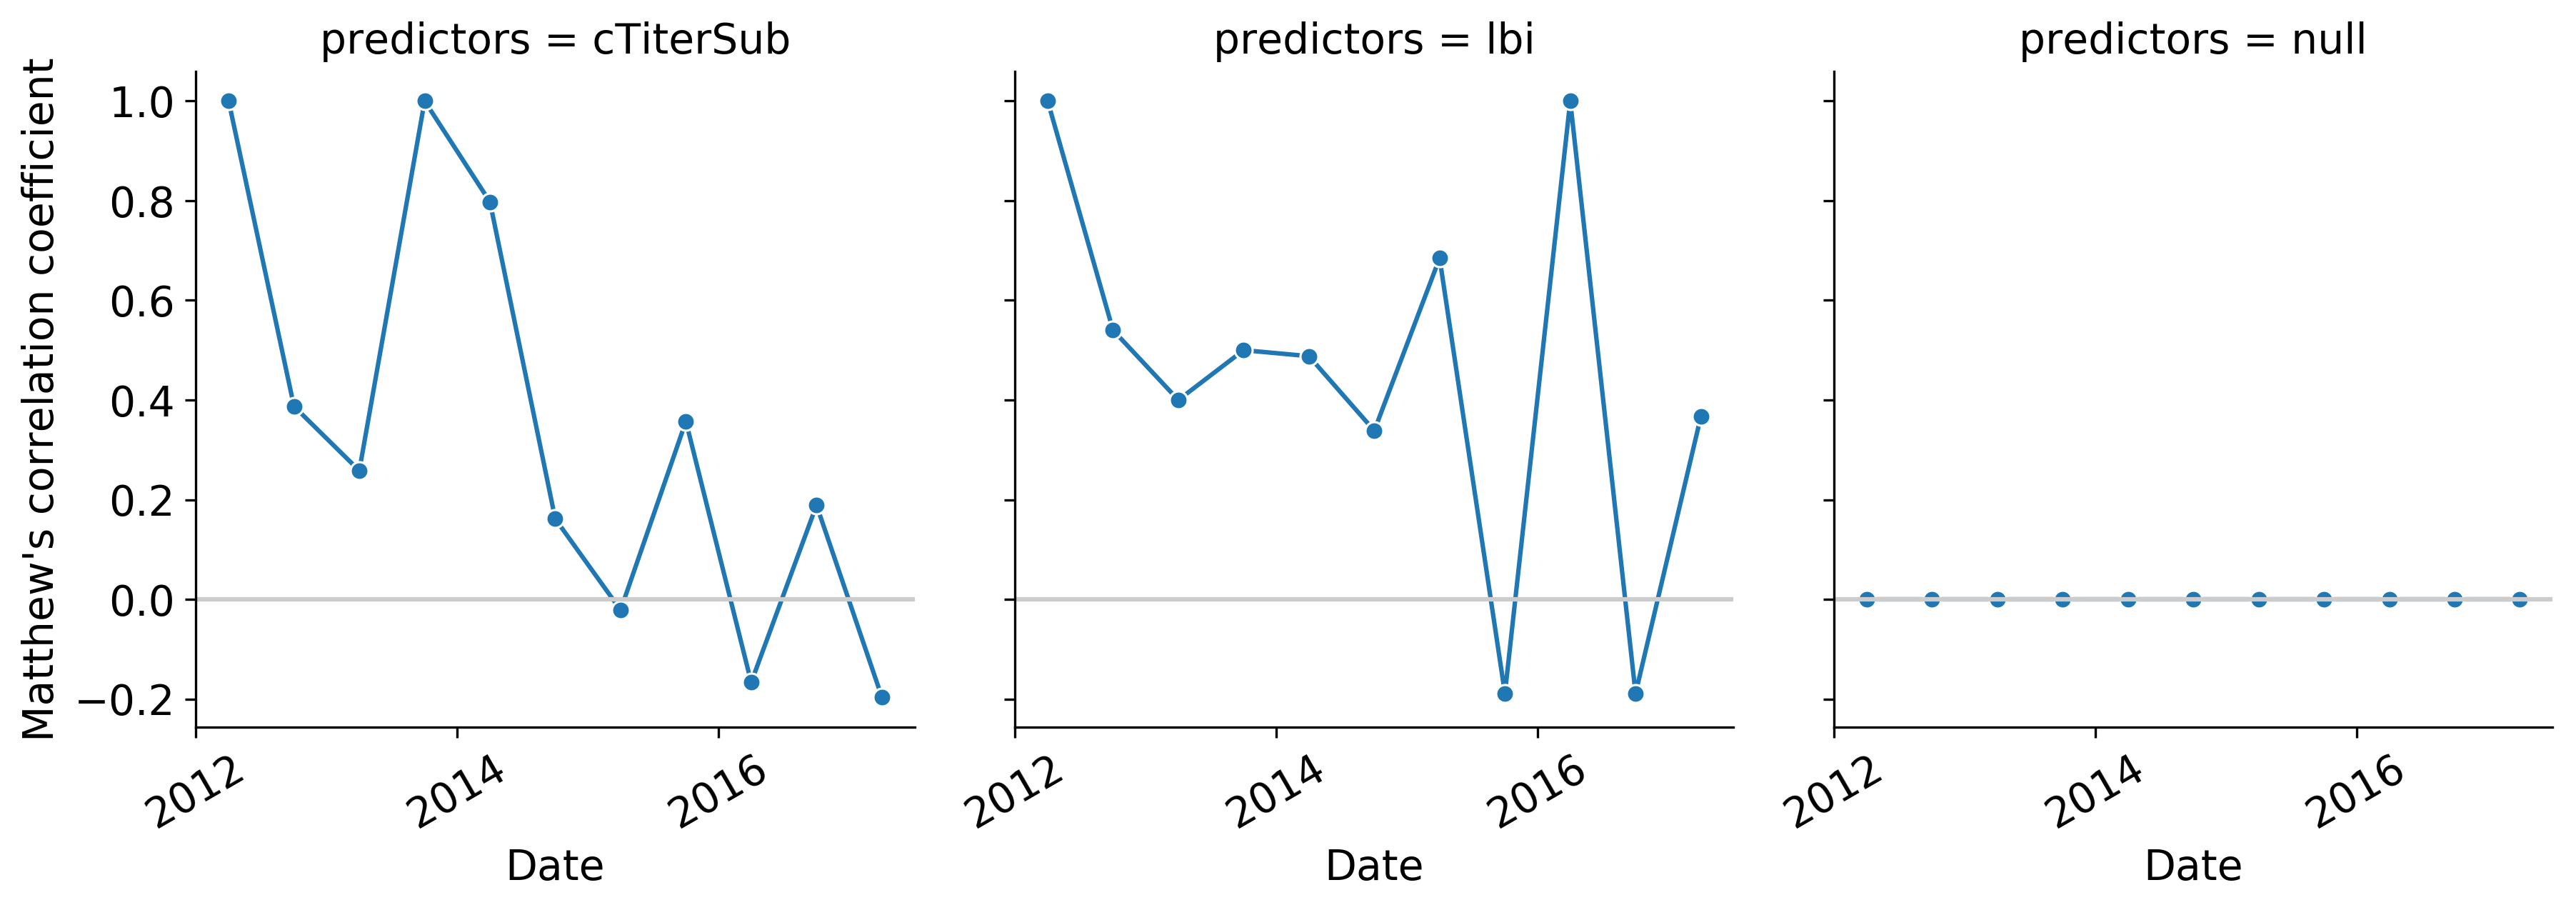

In [201]:
g = facet_time_plot(mcc_test, "mcc", "Matthew's correlation coefficient")

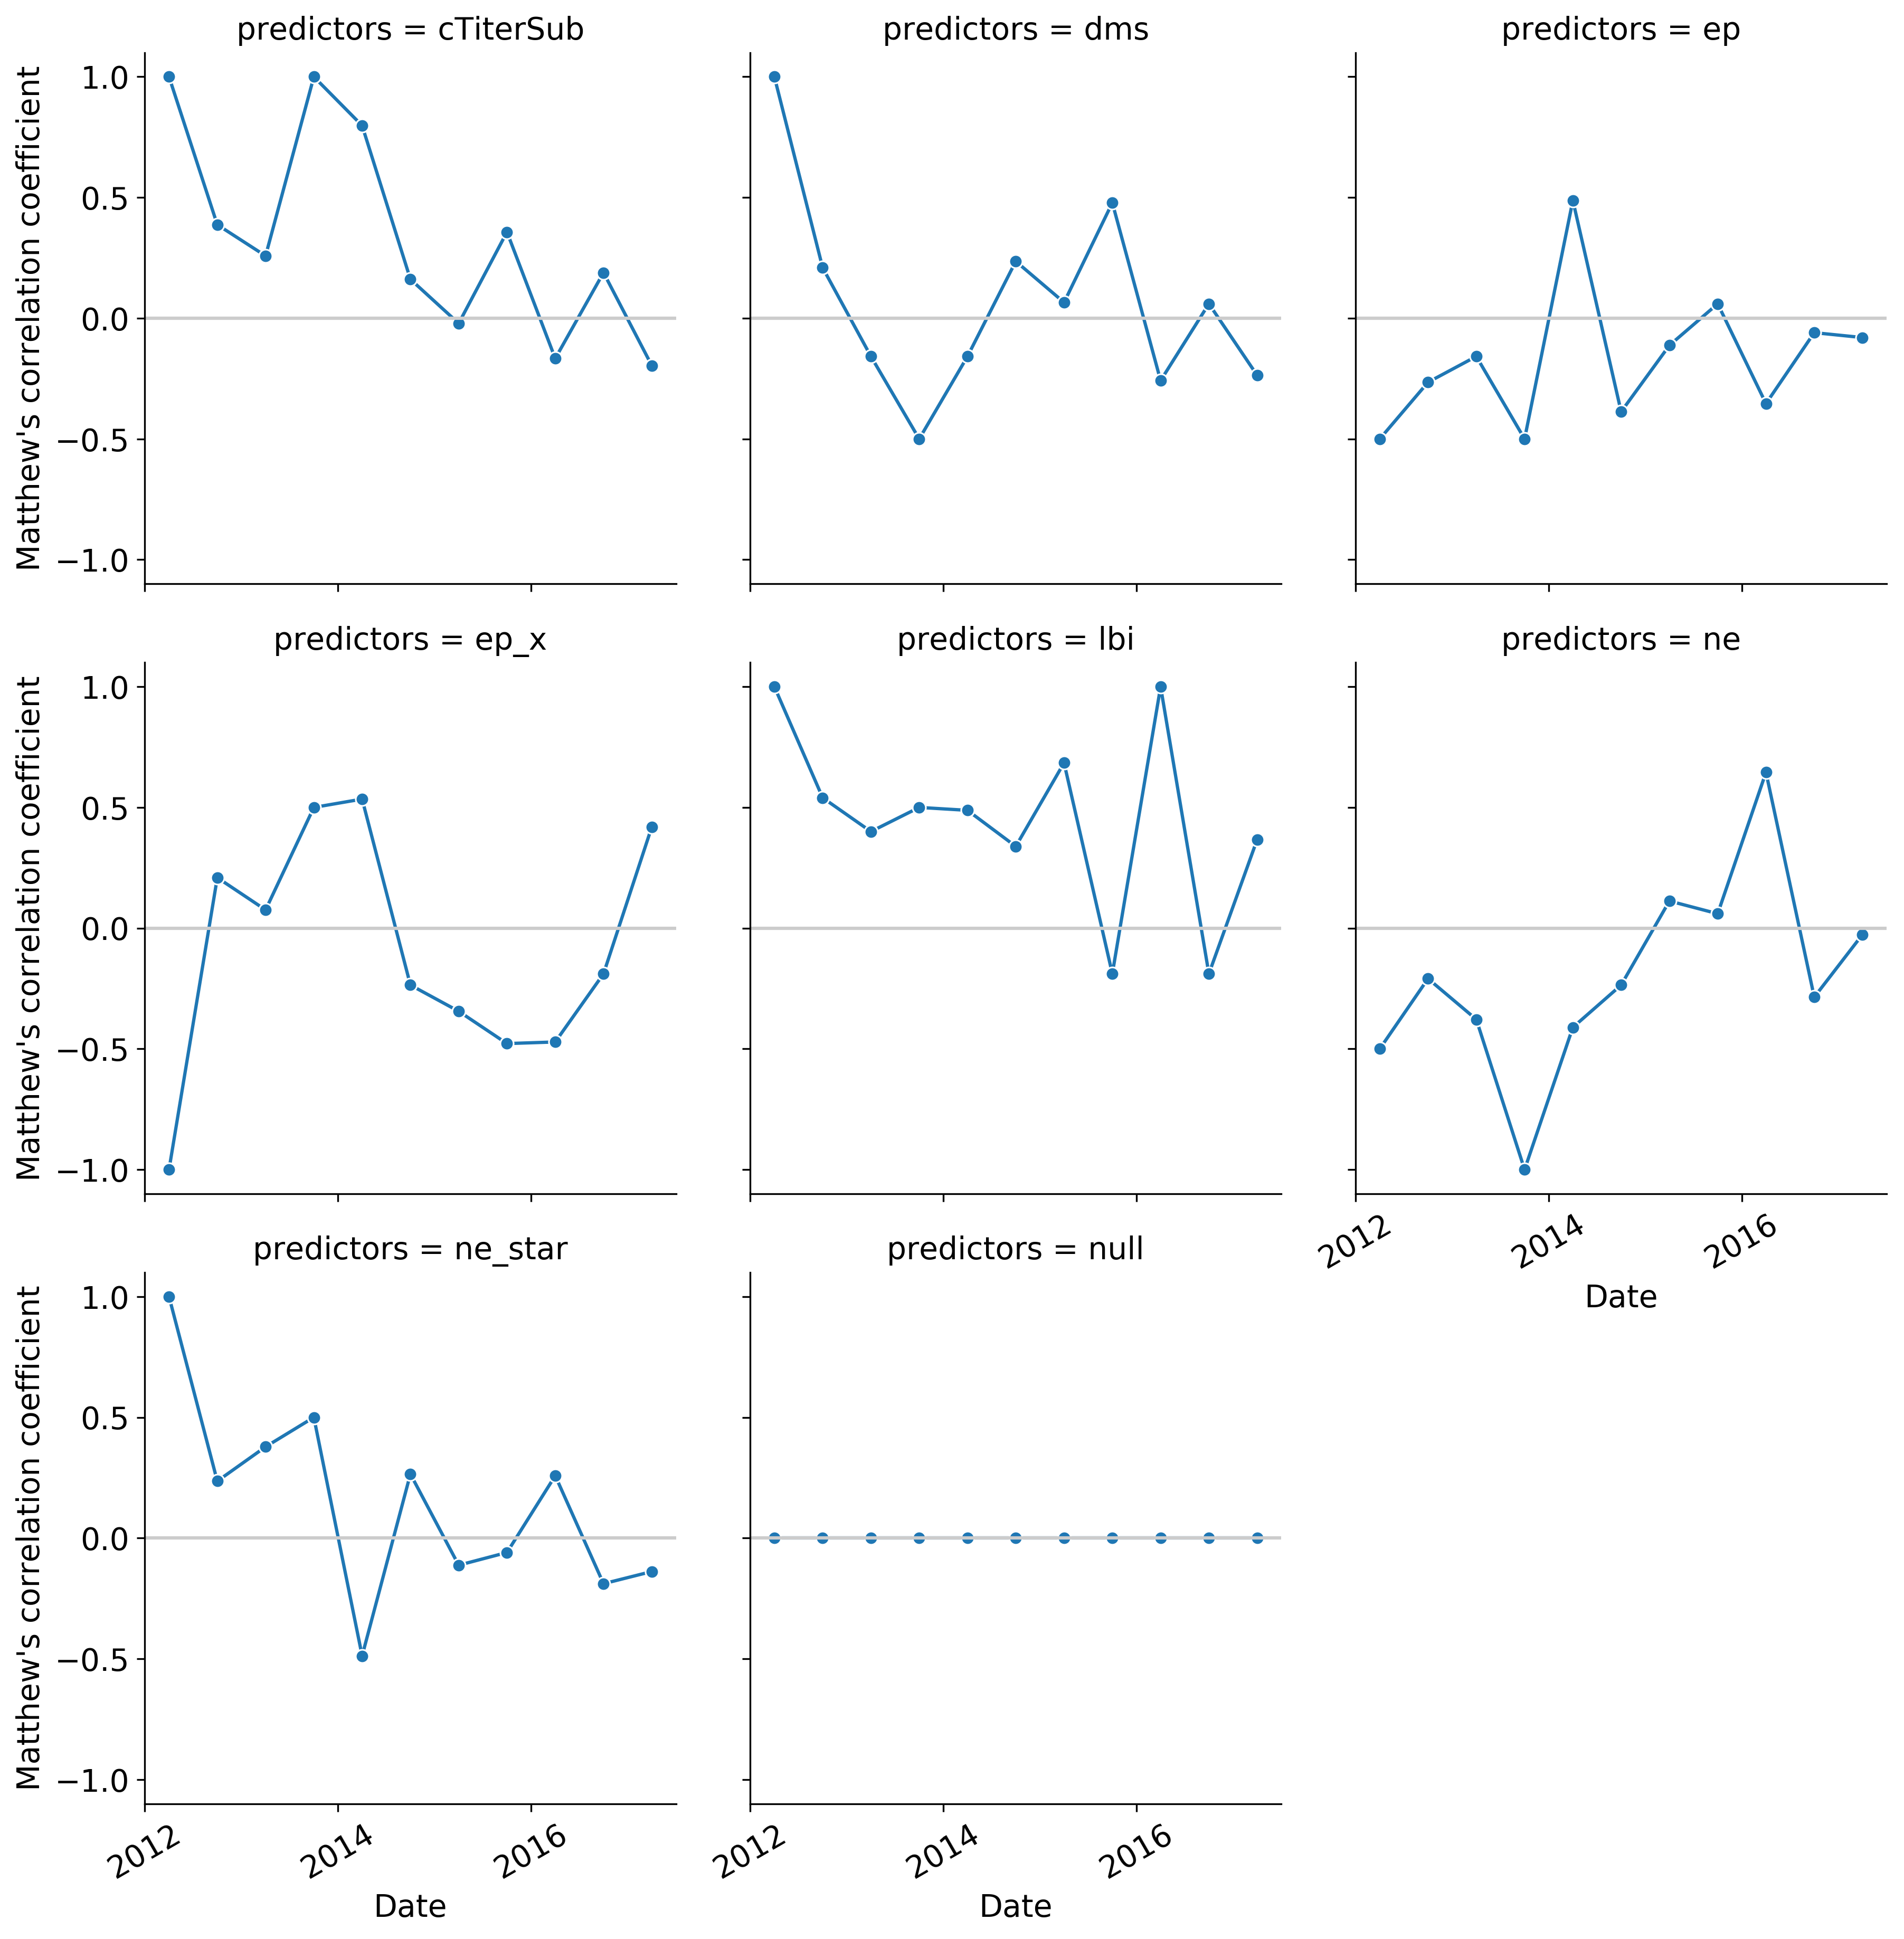

In [202]:
g = facet_time_plot(model_mcc_by_time, "mcc", "Matthew's correlation coefficient")

In [203]:
model_mse_by_time = df_by_timepoint.apply(
    mse_for_df
).reset_index(name="mse")

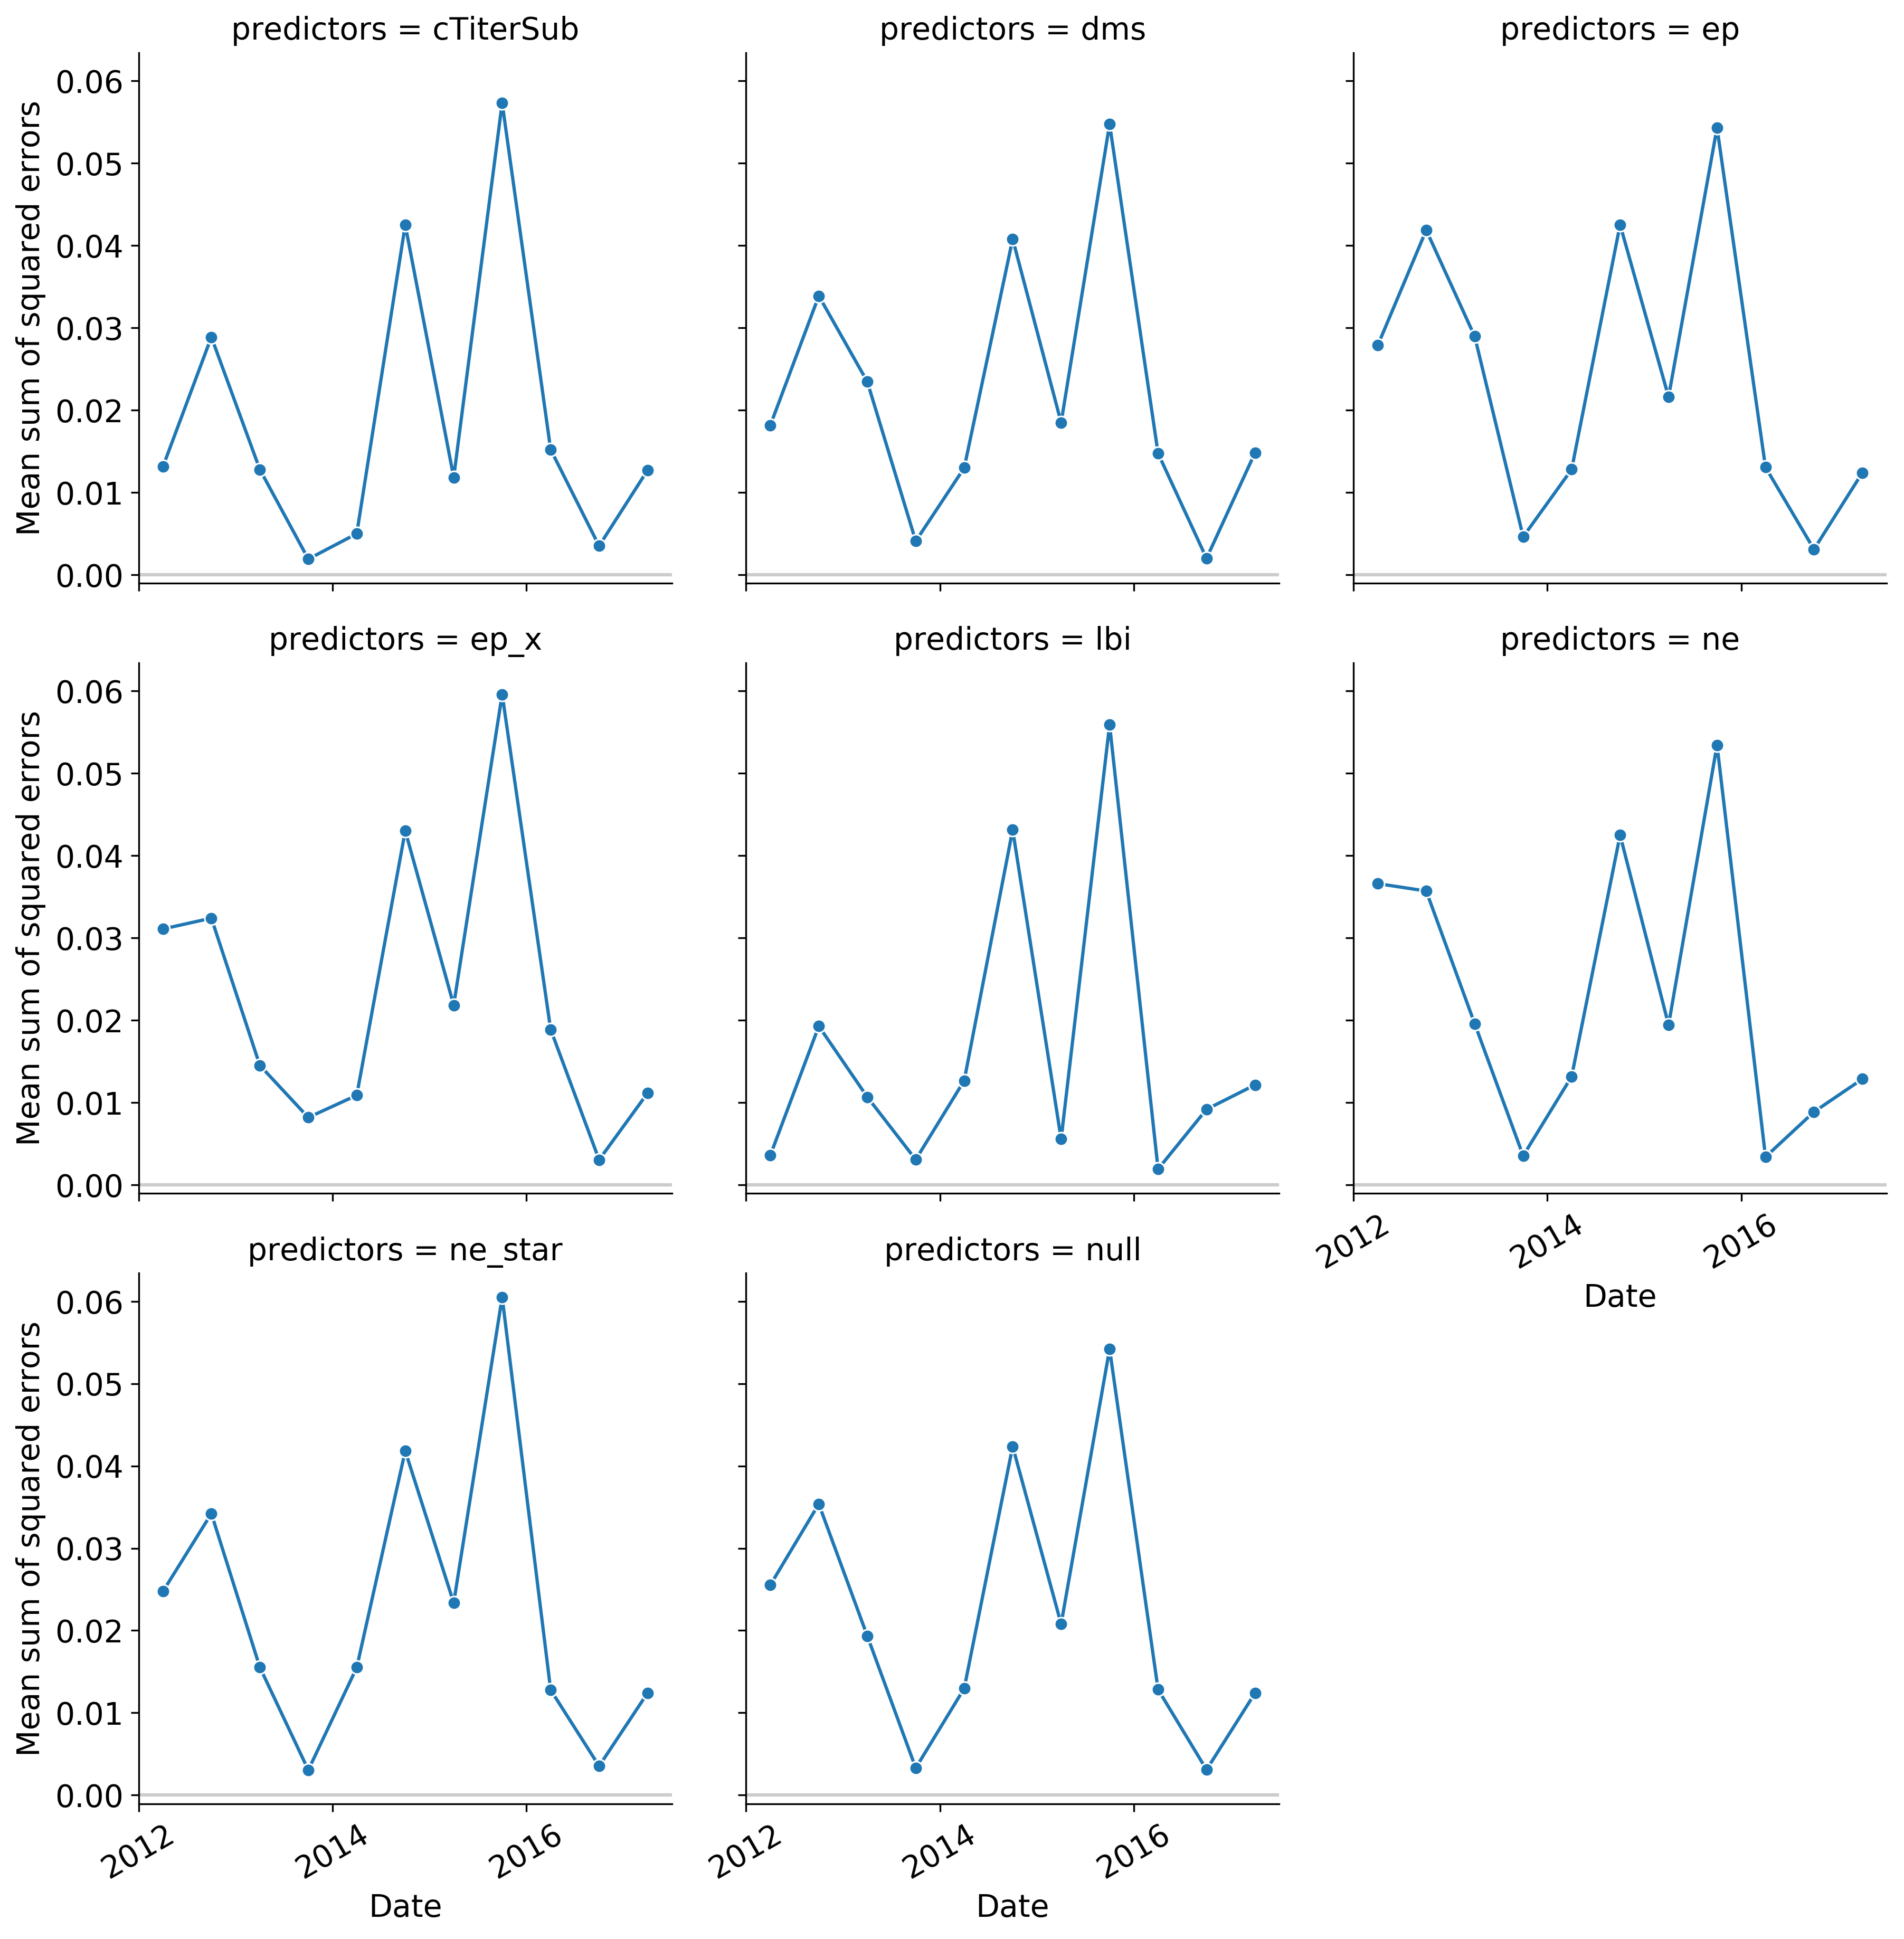

In [204]:
g = facet_time_plot(model_mse_by_time, "mse", "Mean sum of squared errors")